IMPORTANT NOTE: The model creation stage at the start of the Model Creation section has a cell that takes a long time to execute, creating many models for multiple target variables. For this reason, if possible, for the sake of saving time I would advise executing all cells (in Runtime, run all) and then go through the cells sequentially while it is running, opposed to running each cell as you go through them. This will prevent having to wait 10 minutes or longer on the training cell with being unable to look at the future cells due to variable dependencies with results from the long executing cell.

# Notes on the Data and Objectives

The data set analyzed in this assignment is from https://archive.ics.uci.edu/ml/datasets/Air+quality, from the source: Vito S. (2016). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 
The data set is measurements of the concentration of pollutants taken in an Italian field over the course of a year from 2004 to 2005. The data also includes the times and dates of the pollutant concentrations, as well as the temperature, relative humidity and absolute humidity. The measurements were taken at road level, making them indictive to the exposure of pollutants that a person might have while walking outside in a polluted city.

The motivation for the analysis of this dataset is the detremental health impacts that air pollutants can have on people, particularly in relation to respiratory disease. In areas with large manufacturing/refinement industries or high population densities the air quality can become very poor and lead to chronic respiratory conditions or the exacerbation of already existent respiratory disease. When the air quality is especially poor, people might be encouraged to wear masks outdoors or try to limit their time spend outdoors. This can be espicially important for people with underlying respiratory conditions, as they are more vulnerable to the polluted air (Jian et al., 2016). By studying the correlations that might occurr between the time of year/day, the temperature, and the humidity with the concentrations of various different air pollutants we might be able to better predict what days might be hazardous for people with comporomised respiratory systems. This could be used to improve vulnerable people's ability to make plans based on likely future air qualities. Additionally, an effective predictive model for the concentrations of these pollutants might be used to guide the understanding of shorter term studies regarding pollutant concentration in regions, as being aware of how factors such as the time of year impact the expected pollutant concentration could explain discrepencies that might occurr amongst individual measurements.

Jiang, X. Q., Mei, X. D., & Feng, D. (2016). Air pollution and chronic airway diseases: what should people know and do?. Journal of thoracic disease, 8(1), E31–E40. https://doi.org/10.3978/j.issn.2072-1439.2015.11.50

The objective of this study is to attempt to use the time of year, the time of day, the temperature, and the humidity to predict the concentration of each of the pollutants recorded (provided they have sufficiently large data regarding the time of year). The thought is that the safe concentration range for each of the pollutants might vary, and the severity of the pollutants likely also vary, so one would most likely want to be able to predict each of the pollutant's concentrations.

---

Since the concentrations of the pollutants are continuous values, a regression algorithm will be employed to try to predict the values for an arbitrary time of year, time of day, temperature, and humidity. The thought is that the time of day will encapsulate short term variations in the concentrations caused due to reactions provoked by energy from the sun and emissions based on human travel, the time of year will encapsulate long term variation in the concentrations due to the seasonal weather conditions, and temperature and humidity both likely influence the reactions and atmospheric altitude of these pollutants. The approach used will be to first visualize and understand the data, then transform the date and time into numerical values that are easy to deal with, the normalize the feature vectors (date, time, temperature, humidity). At this point we will be ready to learn models and measure their accuracy. We will start by running polynomial regression on all of the target attributes, using k-fold cross validation to make optimal use of our training data and to determine the ideal degree for our polynomial fit, so as to avoid overfitting of our models. After that, we can test the models' accuracies, compare them, and make concluding remarks regarding their effectiveness. 

One last note is that the units for the concentration will be dropped for this study. This is because the exact concentrations is not of interest for this study, though the units can be checked at the source of the dataset. The most important factors of the units is that they are increasing, so larger numbers of concentration equates to more pollutant per unit volume. This simplification is done because the various pollutants were measured in different units. Besides concentrations, the only relevant units to note are that temperature is measured in degrees celsius, and the relative humidity is given as a percent.

The following information is from the data set regarding what the chemical compounds are, and the measurement units. For this study, the chemicals will be strictly referred to as they are from the dataset, that is to say by their chemical formulas.

2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)

---


3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

---

4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

---


5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

---


6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

---


7 True hourly averaged NOx concentration in ppb (reference analyzer)

---


8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

---


9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

---


10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

---


11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 

# Data Pre-processing to prepare for visualization

## Pre-processing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We begin by preprocessing the data, putting it into a format that is easier to deal with and resaving the csv file in this form.

In [ ]:
import csv

#Read in the data
data = []
with open('AirQualityUCI.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile, delimiter=';')
    for row in csvReader:
        data.append(row)


row_1_flag = False

#Reformat the csv file strings
for row in data:
    row_size = len(row)
    index = 0

    while(index < row_size):
        if row[index] == '':
            row.remove(row[index])
            row_size -= 1
            continue
        if(row_1_flag):
            row[index] = row[index].replace(".", ":")
            row[index] = row[index].replace(',', '.')
        index += 1
    row_1_flag = True


index = 0
row_num = len(data)
while(index < row_num):
    if not data[index]:
        data.pop(index)
        row_num -= 1
        continue
    index += 1

print(data[0])
print(data[1])

f = open("AirQuality.csv", "w")

#Rewrite the csv file in new format
for row in data:
    for index in range(len(row)):
        f.write(row[index])
        if index < len(row) - 1:
            f.write(",")

    f.write('\n')

f.close()

['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
['10/03/2004', '18:00:00', '2.6', '1360', '150', '11.9', '1046', '166', '1056', '113', '1692', '1268', '13.6', '48.9', '0.7578']


In [ ]:
plt.style.use('seaborn-whitegrid')

# Note that missing values are tagged with -200 value
#Read in csv file as dataframe
data = pd.read_csv('AirQuality.csv')

#Initial look at the data and its columns indexes
#Note that indexes will be typically used over heading names
# This is because I remember the indexes for the labels better than the labels exact names
print(data.head())

headings = data.columns
#Replace values that lack a recording with the np.nan type
#Note that only values that lack recordings are numeric, as date and time are always labelled
data.replace(to_replace=-200, value=np.nan, inplace=True)

         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18:00:00     2.6         1360       150      11.9   
1  10/03/2004  19:00:00     2.0         1292       112       9.4   
2  10/03/2004  20:00:00     2.2         1402        88       9.0   
3  10/03/2004  21:00:00     2.2         1376        80       9.2   
4  10/03/2004  22:00:00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836      131          1205      116          1490         1110   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.786

In [ ]:
data.rename({'T':'Temperature', 'RH':'Relative Humidity', 'AH':'Absolute Humidity'}, axis=1, inplace = True)

In [ ]:
#Check the data types read in by the dataframe to make sure they're correct
data.dtypes

Date                  object
Time                  object
CO(GT)               float64
PT08.S1(CO)          float64
NMHC(GT)             float64
C6H6(GT)             float64
PT08.S2(NMHC)        float64
NOx(GT)              float64
PT08.S3(NOx)         float64
NO2(GT)              float64
PT08.S4(NO2)         float64
PT08.S5(O3)          float64
Temperature          float64
Relative Humidity    float64
Absolute Humidity    float64
dtype: object

In [ ]:
#Change date to a datetime object for easier handling
#Also change time to a datetime.time object, for later use
import datetime as dt
data[headings[0]] = pd.to_datetime(data[headings[0]], format='%d/%m/%Y')
if type(data[headings[1]][0]) is not dt.time:
  data[headings[1]] = pd.to_datetime(data[headings[1]])
  data[headings[1]] = data[headings[1]].dt.time
print(data.dtypes)
print("Data type for time of day: ", type(data[headings[1]][0]))

Date                 datetime64[ns]
Time                         object
CO(GT)                      float64
PT08.S1(CO)                 float64
NMHC(GT)                    float64
C6H6(GT)                    float64
PT08.S2(NMHC)               float64
NOx(GT)                     float64
PT08.S3(NOx)                float64
NO2(GT)                     float64
PT08.S4(NO2)                float64
PT08.S5(O3)                 float64
Temperature                 float64
Relative Humidity           float64
Absolute Humidity           float64
dtype: object
Data type for time of day:  <class 'datetime.time'>


In [ ]:
#A look at the data, now with np.NaN as values that weren't recorded instead of -200
# This will be useful for discounting those values properly, instead of treating it as if
# The value was -200
data

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0    2004-03-10  18:00:00     2.6       1360.0     150.0      11.9   
1    2004-03-10  19:00:00     2.0       1292.0     112.0       9.4   
2    2004-03-10  20:00:00     2.2       1402.0      88.0       9.0   
3    2004-03-10  21:00:00     2.2       1376.0      80.0       9.2   
4    2004-03-10  22:00:00     1.6       1272.0      51.0       6.5   
...         ...       ...     ...          ...       ...       ...   
9352 2005-04-04  10:00:00     3.1       1314.0       NaN      13.5   
9353 2005-04-04  11:00:00     2.4       1163.0       NaN      11.4   
9354 2005-04-04  12:00:00     2.4       1142.0       NaN      12.4   
9355 2005-04-04  13:00:00     2.1       1003.0       NaN       9.5   
9356 2005-04-04  14:00:00     2.2       1071.0       NaN      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)  Temperature  Relative Humidity  Absolute Humidity  
0          1268.0         13.6               48.9             0.7578  
1           972.0         13.3               47.7             0.7255  
2          1074.0         11.9               54.0             0.7502  
3          1203.0         11.0               60.0             0.7867  
4          1110.0         11.2               59.6             0.7888  
...           ...          ...                ...                ...  
9352       1729.0         21.9               29.3             0.7568  
9353       1269.0         24.3               23.7             0.7119  
9354       1092.0         26.9               18.3             0.6406  
9355        770.0         28.3               13.5             0.5139  
9356        816.0         28.5               13.1             0.5028  

[9357 rows x 15 columns]

## Descriptive Statistics

In [ ]:
#We now isolate the columns that hold our target values for our models/visulatizations
cols = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
targets = data[data.columns[cols]]
print(targets.columns)
print()
targets.describe()

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'],
      dtype='object')



CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  7674.000000  8991.000000   914.000000  8991.000000    8991.000000   
mean      2.152750  1099.833166   218.811816    10.083105     939.153376   
std       1.453252   217.080037   204.459921     7.449820     266.831429   
min       0.100000   647.000000     7.000000     0.100000     383.000000   
25%       1.100000   937.000000    67.000000     4.400000     734.500000   
50%       1.800000  1063.000000   150.000000     8.200000     909.000000   
75%       2.900000  1231.000000   297.000000    14.000000    1116.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  
count  7718.000000   8991.000000  7715.000000   8991.000000  8991.000000  
mean    246.896735    835.493605   113.091251   1456.264598  1022.906128  
std     212.979168    256.817320    48.370108    346.206794   398.484288  
min       2.000000    322.000000     2.000000    551.000000   221.000000  
25%      98.000000    658.000000    78.000000   1227.000000   731.500000  
50%     180.000000    806.000000   109.000000   1463.000000   963.000000  
75%     326.000000    969.500000   142.000000   1674.000000  1273.500000  
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000

The first thing we can see is the variability in the counts of the different pollutants, so for some of them we have less data. Since time of year will be used as a predictor, due to its significantly lower counts of data we may not consider NMHC in the prediction models made. The other targets seem to have most of the data accounted for, so they will have models created for them. Besides that we can see that the quantities of the various pollutants vary significantly, which is to be expected, especially since the units of the various concentrations aren't consistent.

In [ ]:
# Here we isolate the feature variables for our models/visulatizations
cols = [0, 1, 12, 13, 14]
features = data[data.columns[cols]]
print(features.columns)
print()
features.describe()

Index(['Date', 'Time', 'Temperature', 'Relative Humidity',
       'Absolute Humidity'],
      dtype='object')



Temperature  Relative Humidity  Absolute Humidity
count  8991.000000        8991.000000        8991.000000
mean     18.317829          49.234201           1.025530
std       8.832116          17.316892           0.403813
min      -1.900000           9.200000           0.184700
25%      11.800000          35.800000           0.736800
50%      17.800000          49.600000           0.995400
75%      24.400000          62.500000           1.313700
max      44.600000          88.700000           2.231000

Above is some summary statistics for the quantitative values in the features vector.

---

The first thing we can see is that the counts of the three quantities is equal, meaning that if any measurements are missing it's likely that they are the same measurements. We can also see that the range of both relative humidity and temperature are significant, so we will definitely want to normalize those quanitites before the regression process.

## Visualizations of the Data

### Graphs With Respect to Time of Day

<Figure size 432x288 with 0 Axes>

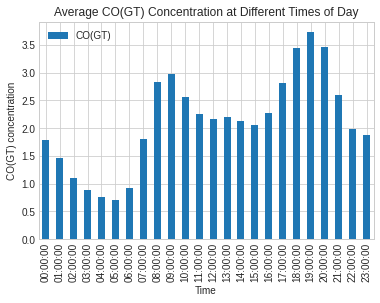

<Figure size 432x288 with 0 Axes>

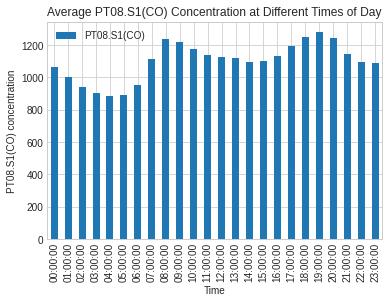

<Figure size 432x288 with 0 Axes>

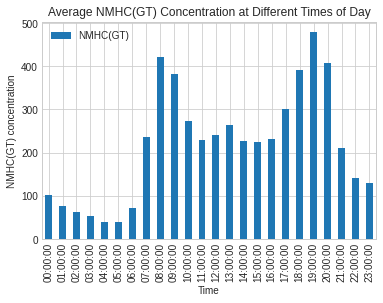

<Figure size 432x288 with 0 Axes>

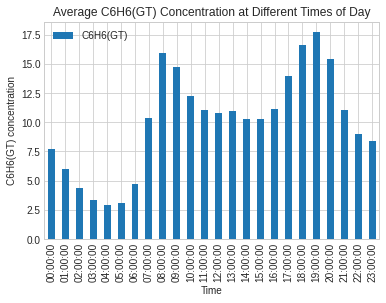

<Figure size 432x288 with 0 Axes>

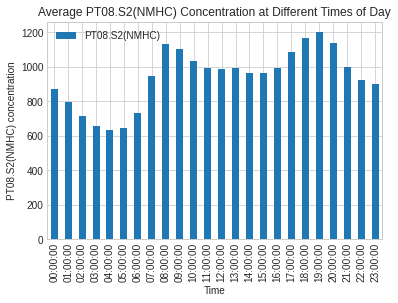

<Figure size 432x288 with 0 Axes>

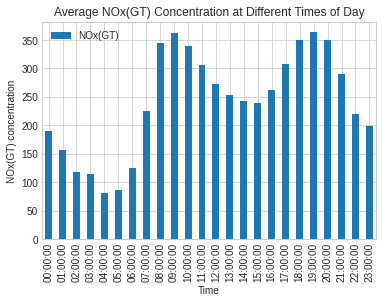

<Figure size 432x288 with 0 Axes>

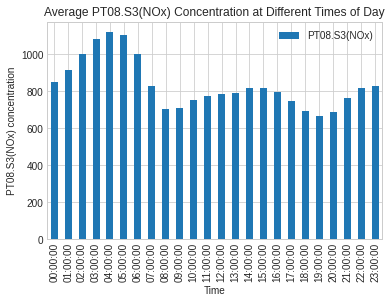

<Figure size 432x288 with 0 Axes>

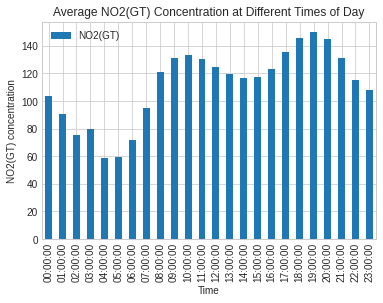

<Figure size 432x288 with 0 Axes>

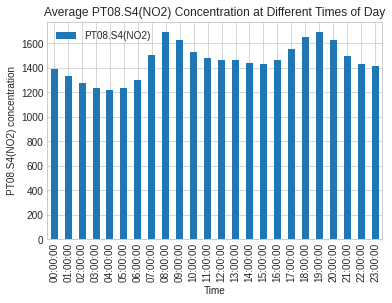

<Figure size 432x288 with 0 Axes>

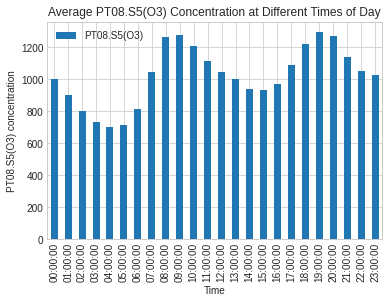

In [ ]:
for target in targets:
  plt.figure()
  data.pivot_table(target, index=features.columns[1], aggfunc='mean').plot.bar()
  plt.title("Average " + target + " Concentration at Different Times of Day")
  plt.ylabel(target + " concentration")
plt.show()

As predicted earlier, the concentrations of most of the pollutants seems to be around 8 or 9 in the morning, and around 7 in the evening. The concentrations of most of the pollants seems to typically decrease into the morning until around 5 or 6, which could have to do with the sun rising, the mobilization of people causing emissions from motorized vehicles, or some other unknown factor. Almost all of the pollutants follow this bimodal trend, with varying degrees of accentuation of it, for example NMHC is one of the most exaggerated pollutants in regards to this, with its average concentration approximately increasing by a factor of 8 from 5 in the morning to 8 in the morning. That's over the course of just 3 hours. Something of great note is that while all of the other pollutants seem to follow this trend, PT08.S3 dips to its lowest concentrations at these times of day. I am not familiar enough with atmospheric chemistry to know why this would be, but it is interesting that it is the only pollutant that doesn't follow the previously mentioned trend, and instead in fact follows an inverse trend. One possibility is that it might be a reactant in the reactions that are fueled by the sunlight, but that is only speculation.

### Graphs With Respect to Time of Year

<Figure size 432x288 with 0 Axes>

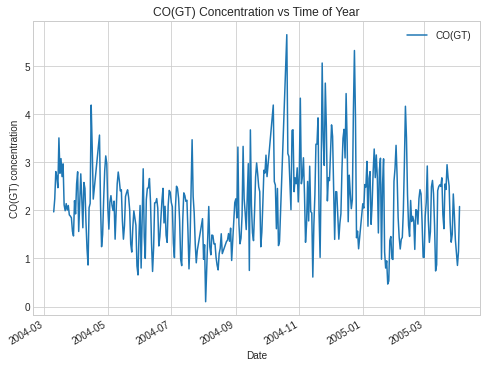

<Figure size 432x288 with 0 Axes>

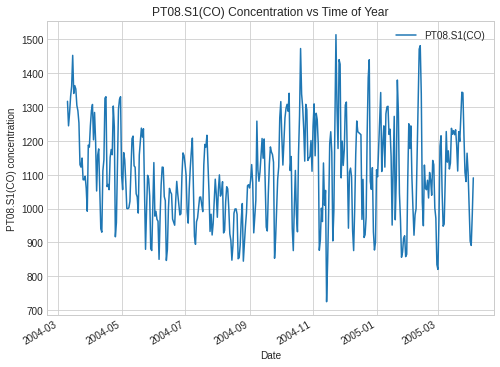

<Figure size 432x288 with 0 Axes>

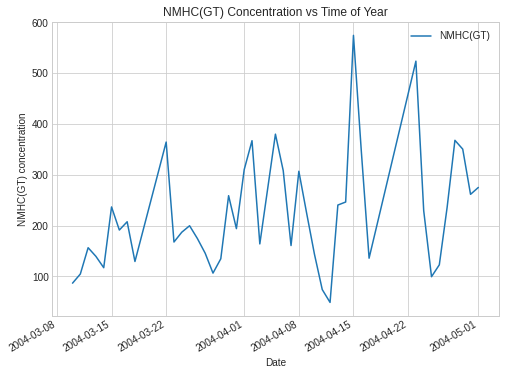

<Figure size 432x288 with 0 Axes>

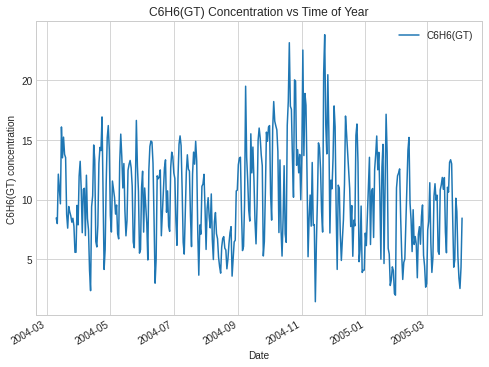

<Figure size 432x288 with 0 Axes>

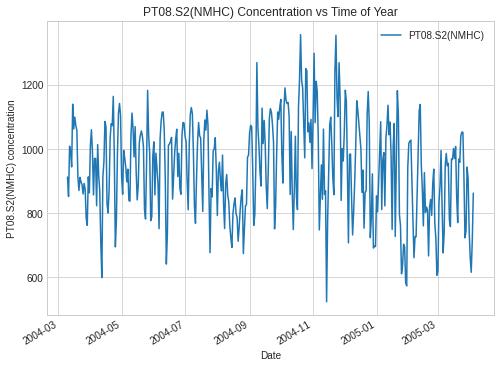

<Figure size 432x288 with 0 Axes>

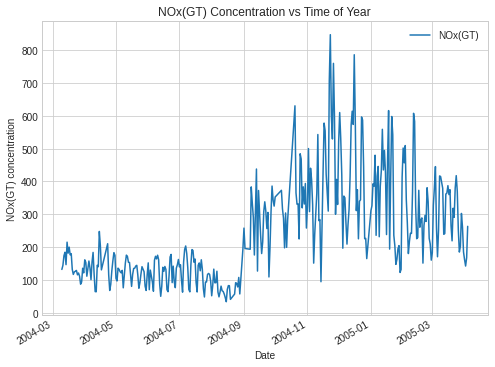

<Figure size 432x288 with 0 Axes>

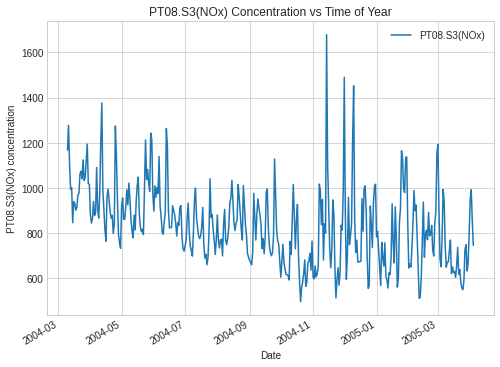

<Figure size 432x288 with 0 Axes>

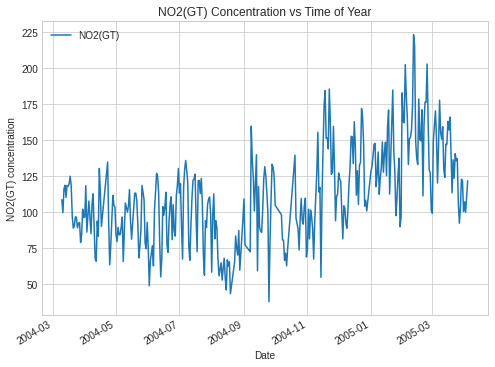

<Figure size 432x288 with 0 Axes>

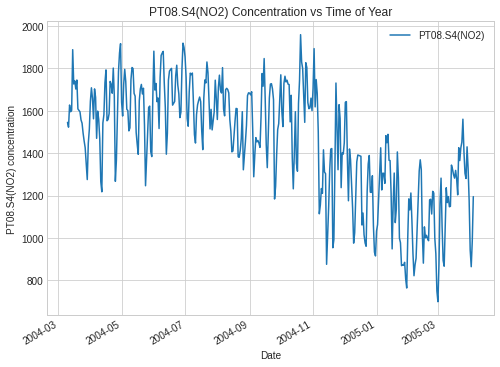

<Figure size 432x288 with 0 Axes>

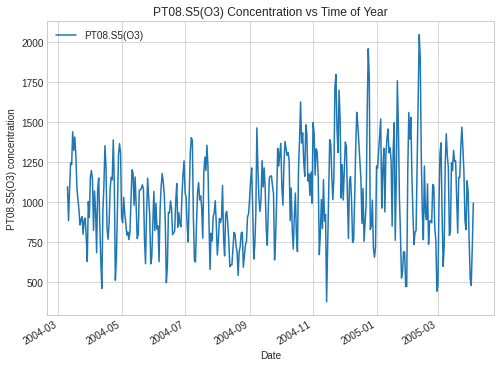

In [ ]:
#Note that long straight lines indicate periods of null values, where the graphs
#Automatically interpolated the values as a straight line
for target in targets:
  plt.figure()
  data.pivot_table(target, index=features.columns[0], aggfunc='mean').plot(figsize=(8,6))
  plt.title(target + " Concentration vs Time of Year")
  plt.ylabel(target + " concentration")
plt.show()

I was surprised to see how erratic the concentrations of the pollutants were over the course of the data collection, with what seems like minimal seasonal trends due to the large short term variability of the data. It appears that some of the concentrations increase in the winter and decrease into the fall, with NOx being the greatest example of this. Of course, it is important to realize that the data was unfortunately recorded over the course of only 1 year, so we cannot take averages of seasonal concentrations over the course of many years. This of course makes these visualizations vulnerable to the erratic behavior of the weather, with atypical seasonal conditions affecting the data and understanding of the trends. This makes the time of year in many ways the least useful feature vector.

### Graphs With Respect to Temperature

<Figure size 432x288 with 0 Axes>

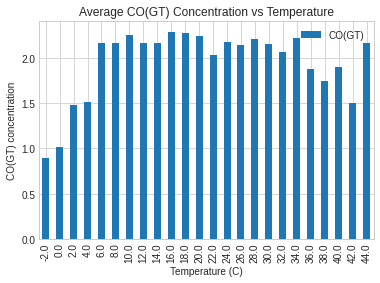

<Figure size 432x288 with 0 Axes>

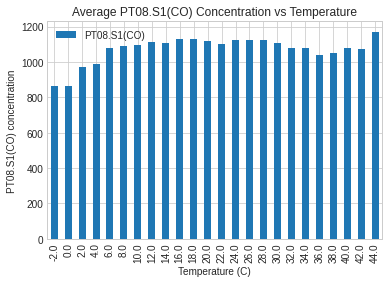

<Figure size 432x288 with 0 Axes>

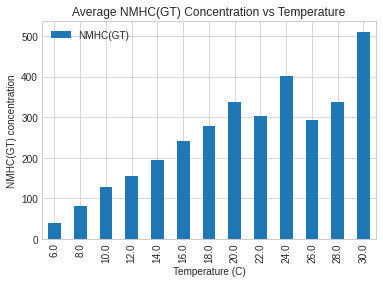

<Figure size 432x288 with 0 Axes>

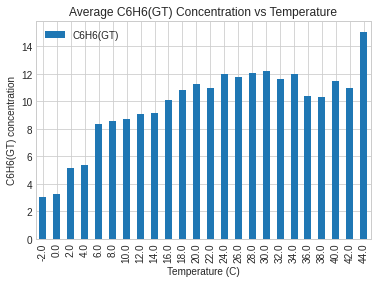

<Figure size 432x288 with 0 Axes>

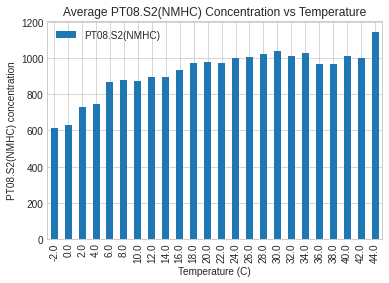

<Figure size 432x288 with 0 Axes>

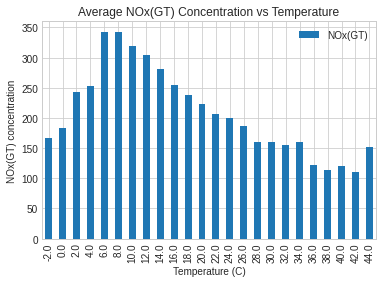

<Figure size 432x288 with 0 Axes>

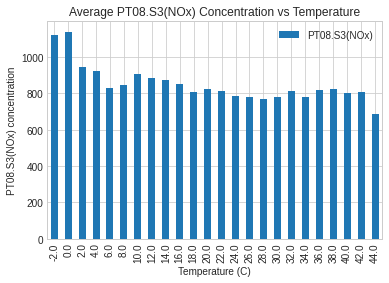

<Figure size 432x288 with 0 Axes>

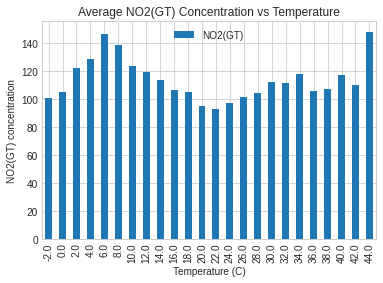

<Figure size 432x288 with 0 Axes>

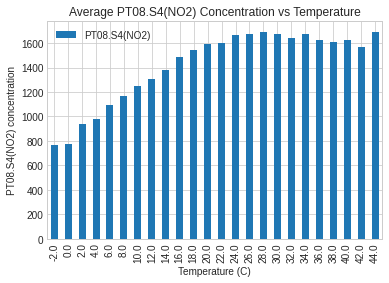

<Figure size 432x288 with 0 Axes>

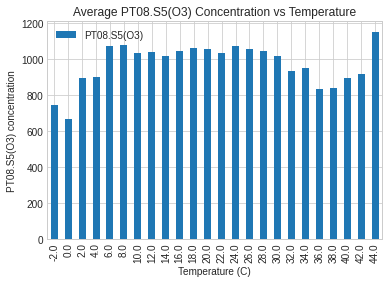

In [ ]:
#Here we round temperatures to the nearest multiple of 2 for easier visualization
dataCopy = data.copy()
roundingMultiple = 2
dataCopy[features.columns[2]] = roundingMultiple * (dataCopy[features.columns[2]] / roundingMultiple).round()
for target in targets:
  plt.figure()
  dataCopy.pivot_table(target, index=features.columns[2], aggfunc='mean').plot.bar()
  plt.title("Average " + target + " Concentration vs " + features.columns[2])
  plt.xlabel(features.columns[2] + " (C)")
  plt.ylabel(target + " concentration")
plt.show()

When it comes to temperature we see large variability in the behaviour of the pollutant concentrations. Some pollutants, such as PT08.S4, PT08.S2, C6H6, and NMHC seem to increase in concentration as temperature increases. Other pollutants, such as NOx and PT08.S3, seem to decrease in concentration as temperature increases. Then there are many pollutants' whose concentrations seem seem relatively unaffected by the variability in temperatures of the Italian city. Overall, the effects of temperature on the concentration of the pollutant seems highly pollutant dependent.

### Graphs With Respect to Relative Humidity

<Figure size 432x288 with 0 Axes>

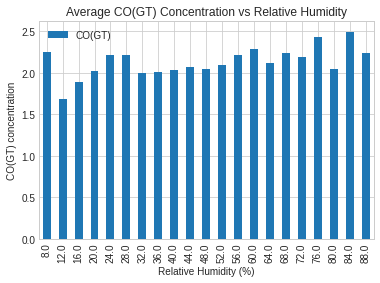

<Figure size 432x288 with 0 Axes>

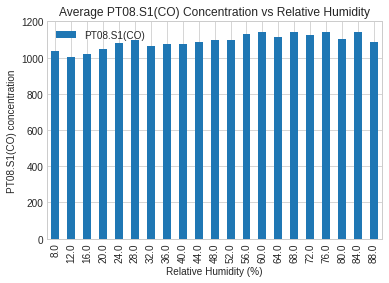

<Figure size 432x288 with 0 Axes>

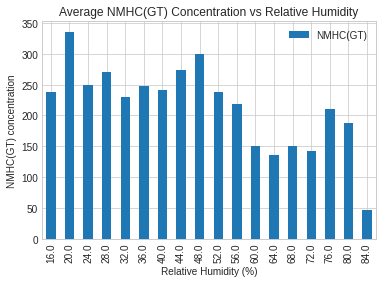

<Figure size 432x288 with 0 Axes>

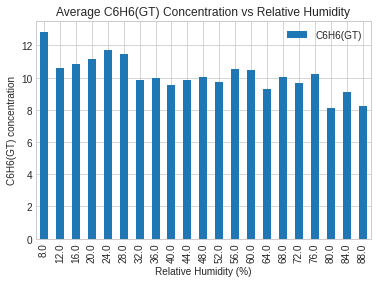

<Figure size 432x288 with 0 Axes>

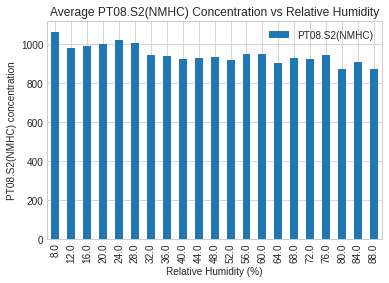

<Figure size 432x288 with 0 Axes>

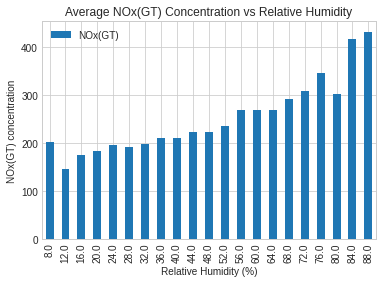

<Figure size 432x288 with 0 Axes>

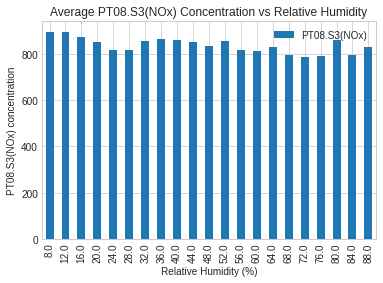

<Figure size 432x288 with 0 Axes>

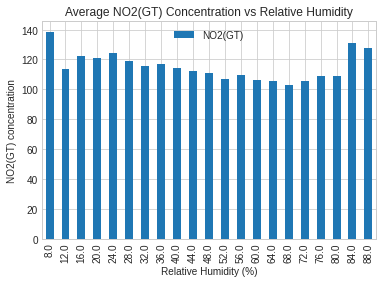

<Figure size 432x288 with 0 Axes>

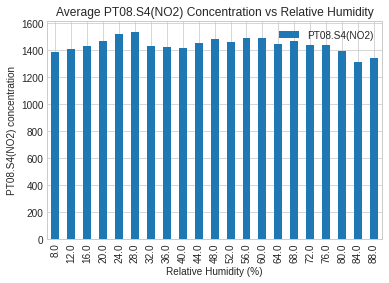

<Figure size 432x288 with 0 Axes>

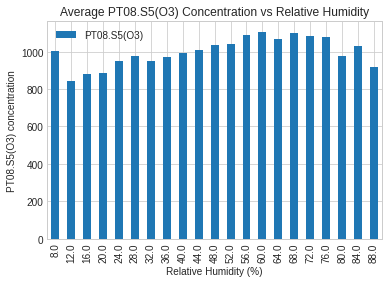

In [ ]:
#Round relative humidity to nearest percent that's a multiple of 4
dataCopy = data.copy()
roundingMultiple = 4
dataCopy[features.columns[3]] = roundingMultiple * (dataCopy[features.columns[3]] / roundingMultiple).round()
for target in targets:
  plt.figure()
  dataCopy.pivot_table(target, index=dataCopy[features.columns[3]], aggfunc='mean').plot.bar()
  plt.title("Average " + target + " Concentration vs " + features.columns[3])
  plt.xlabel(features.columns[3] + " (%)")
  plt.ylabel(target + " concentration")
plt.show()

In terms of relative humidity it seems that the concentrations of the pollutants are typically fairly stable. Some of the pollutants appear to increase or decrease in concentration with increasing relative humidity, but that change seems to be typically quite mild. The exception to this is NOx, which can be seen to clearly increase in concentration dramatically with increasing relative humidity.

### Graphs With Respect to Absolute Humidity

<Figure size 432x288 with 0 Axes>

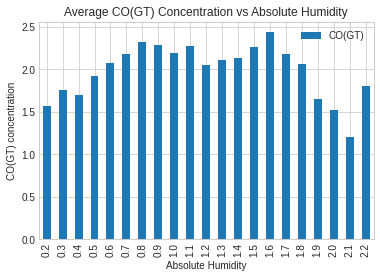

<Figure size 432x288 with 0 Axes>

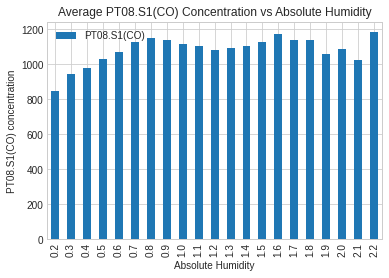

<Figure size 432x288 with 0 Axes>

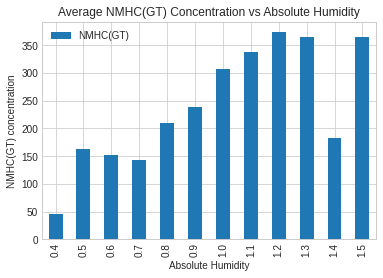

<Figure size 432x288 with 0 Axes>

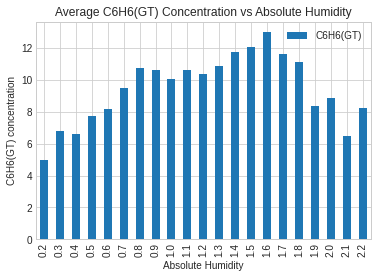

<Figure size 432x288 with 0 Axes>

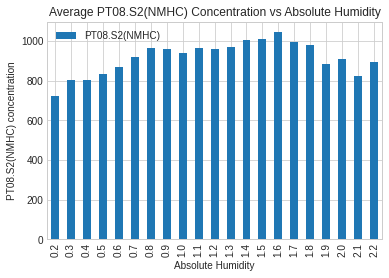

<Figure size 432x288 with 0 Axes>

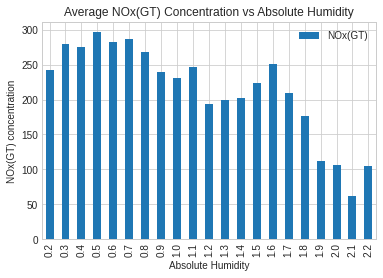

<Figure size 432x288 with 0 Axes>

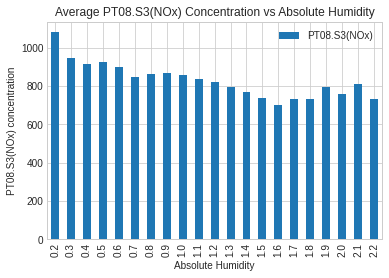

<Figure size 432x288 with 0 Axes>

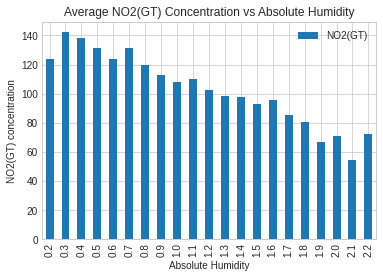

<Figure size 432x288 with 0 Axes>

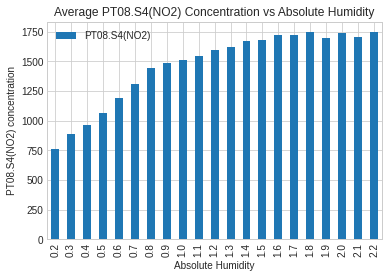

<Figure size 432x288 with 0 Axes>

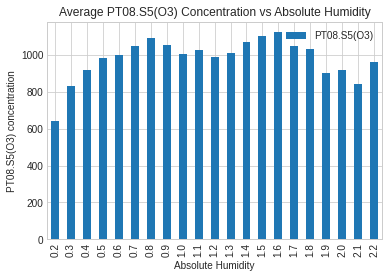

In [ ]:
#Round absolute humidity to the nearest 0.1
dataCopy = data.copy()
roundingMultiple = 0.1
dataCopy[features.columns[4]] = (roundingMultiple * (dataCopy[features.columns[4]] / roundingMultiple).round(1)).round(1)
for target in targets:
  plt.figure()
  dataCopy.pivot_table(target, index=features.columns[4], aggfunc='mean').plot.bar()
  plt.title("Average " + target + " Concentration vs " + features.columns[4])
  plt.ylabel(target + " concentration")
plt.show()

Unlike relative humidity, it appears that significantly more information about the concentrations of the pollutants is present from knowing the absolute humidity. There are of course still some of the pollutants that vary minimally with changing absolute humidity, but there are also several that either tends to increase in concentration with increased absolute humidity (like PT08.S4), tends to decrease in concentration with increased absolute humidity (like NOx, PT08.S3, and NO2), or have some other non-monotonic distribution (like CO, C6H6, and PT08.S5). Interestingly, though NOx increased in concentration with increasing relative humidity, NOx decreases with increased absolute humidity.

# Last Preparations for Model Creation

To be usable in predicting we will convert the dates and times to numerical values. Since the time is just recorded to the nearest hour this is an easy conversion, and we simply just take the hour value of every hour measurement. For the dates, since we simply want to capture the seasonal change by the date within the given year, we use an array with the cumulative number of days by the given month, and add on the months. Effectively we are losing the year information (since the data is measured just over 1 year it doesn't mean much), and having the date be represented by the number of days into the year the measurements were made on.

In [ ]:
cumulative_days_in_months=[0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]

data[data.columns[1]] = data[data.columns[1]].apply(lambda x: x.hour)
data[data.columns[0]] = data[data.columns[0]].apply(
    lambda x: x.day + cumulative_days_in_months[x.month-1]
)

data[data.columns[0]] = data[data.columns[0]].astype(int)
print(data.dtypes)

#Check out the number of null measurements, since we will drop the null
#data rows for the training of our models
data.isnull().sum()
dataRefined = data.copy()

Date                   int64
Time                   int64
CO(GT)               float64
PT08.S1(CO)          float64
NMHC(GT)             float64
C6H6(GT)             float64
PT08.S2(NMHC)        float64
NOx(GT)              float64
PT08.S3(NOx)         float64
NO2(GT)              float64
PT08.S4(NO2)         float64
PT08.S5(O3)          float64
Temperature          float64
Relative Humidity    float64
Absolute Humidity    float64
dtype: object


In [ ]:
#Here we normalize the feature data, giving all of the features a mean of 0
# and a range of [-1, 1]
print(dataRefined)
dataRefined[features.columns] = (dataRefined[features.columns] - dataRefined[features.columns].mean()) / (dataRefined[features.columns].max() - dataRefined[features.columns].min())
print(dataRefined)

      Date  Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0       69    18     2.6       1360.0     150.0      11.9         1046.0   
1       69    19     2.0       1292.0     112.0       9.4          955.0   
2       69    20     2.2       1402.0      88.0       9.0          939.0   
3       69    21     2.2       1376.0      80.0       9.2          948.0   
4       69    22     1.6       1272.0      51.0       6.5          836.0   
...    ...   ...     ...          ...       ...       ...            ...   
9352    94    10     3.1       1314.0       NaN      13.5         1101.0   
9353    94    11     2.4       1163.0       NaN      11.4         1027.0   
9354    94    12     2.4       1142.0       NaN      12.4         1063.0   
9355    94    13     2.1       1003.0       NaN       9.5          961.0   
9356    94    14     2.2       1071.0       NaN      11.9         1047.0   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  Temperature  \
0      

In [ ]:
#Remove rows where the feature variables are null since we need our measurements

dataRefined1 = dataRefined.dropna(subset=[dataRefined.columns[-1]])
#dataRefined = dataRefined.reset_index(drop=True)
dataRefined1.isnull().sum()

Date                    0
Time                    0
CO(GT)               1647
PT08.S1(CO)             0
NMHC(GT)             8104
C6H6(GT)                0
PT08.S2(NMHC)           0
NOx(GT)              1595
PT08.S3(NOx)            0
NO2(GT)              1598
PT08.S4(NO2)            0
PT08.S5(O3)             0
Temperature             0
Relative Humidity       0
Absolute Humidity       0
dtype: int64

In [ ]:
#Create second dataset refinement where all but NMHC's null rows are removed

dataRefined2 = dataRefined1.dropna(subset=[dataRefined.columns[7], dataRefined.columns[2], dataRefined.columns[9]])
dataRefined2.isnull().sum()

Date                    0
Time                    0
CO(GT)                  0
PT08.S1(CO)             0
NMHC(GT)             6114
C6H6(GT)                0
PT08.S2(NMHC)           0
NOx(GT)                 0
PT08.S3(NOx)            0
NO2(GT)                 0
PT08.S4(NO2)            0
PT08.S5(O3)             0
Temperature             0
Relative Humidity       0
Absolute Humidity       0
dtype: int64

In [ ]:
#Create third dataset with NMHC's null rows removed
#Probably won't use this since it removes a significant amount of the data,
# but it was created just in case

dataRefined3 = dataRefined1.dropna(subset=[dataRefined.columns[4], dataRefined.columns[7], dataRefined.columns[2]])
#dataRefined3 = dataRefined3.reset_index(drop=True)
dataRefined3.isnull().sum()

Date                 0
Time                 0
CO(GT)               0
PT08.S1(CO)          0
NMHC(GT)             0
C6H6(GT)             0
PT08.S2(NMHC)        0
NOx(GT)              0
PT08.S3(NOx)         0
NO2(GT)              0
PT08.S4(NO2)         0
PT08.S5(O3)          0
Temperature          0
Relative Humidity    0
Absolute Humidity    0
dtype: int64

In [ ]:
#Separate out the feature variables of the given data sets into feature vectors
features1 = dataRefined1[features.columns]
features2 = dataRefined2[features.columns]
features3 = dataRefined3[features.columns]
print(features1.head())
print(features2.head())
print(features3.head())

       Date      Time  Temperature  Relative Humidity  Absolute Humidity
0 -0.295429  0.282671    -0.101459          -0.004204          -0.130836
1 -0.295429  0.326150    -0.107910          -0.019298          -0.146621
2 -0.295429  0.369628    -0.138018           0.059947          -0.134550
3 -0.295429  0.413106    -0.157373           0.135419          -0.116713
4 -0.295429  0.456584    -0.153072           0.130387          -0.115687
       Date      Time  Temperature  Relative Humidity  Absolute Humidity
0 -0.295429  0.282671    -0.101459          -0.004204          -0.130836
1 -0.295429  0.326150    -0.107910          -0.019298          -0.146621
2 -0.295429  0.369628    -0.138018           0.059947          -0.134550
3 -0.295429  0.413106    -0.157373           0.135419          -0.116713
4 -0.295429  0.456584    -0.153072           0.130387          -0.115687
       Date      Time  Temperature  Relative Humidity  Absolute Humidity
0 -0.295429  0.282671    -0.101459          -0.0042

In [ ]:
#Separate out the target vectors for each dataset
# Here we remove the pollutants with more data recorded on them from the dataframes
# with more rows removed (as seen below)
# The indexes of each dataframe shows how the information/row number on the 
# pollutants decrease

targets1 = dataRefined1[targets.columns]
targets1 = targets1.dropna(axis=1)
targets2 = dataRefined2[targets.columns]
targets2 = targets2.dropna(axis=1)
targets2 = targets2.drop(axis=1, columns=targets1.columns)
targets3 = dataRefined3[targets.columns]
targets3 = targets3.drop(axis=1, columns=targets1.columns)
targets3 = targets3.drop(axis=1, columns=targets2.columns)
print(targets1.head())
print(targets2.head())
print(targets3.head())
print(targets1.index)
print(targets2.index)
print(targets3.index)

   PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  \
0       1360.0      11.9         1046.0        1056.0        1692.0   
1       1292.0       9.4          955.0        1174.0        1559.0   
2       1402.0       9.0          939.0        1140.0        1555.0   
3       1376.0       9.2          948.0        1092.0        1584.0   
4       1272.0       6.5          836.0        1205.0        1490.0   

   PT08.S5(O3)  
0       1268.0  
1        972.0  
2       1074.0  
3       1203.0  
4       1110.0  
   CO(GT)  NOx(GT)  NO2(GT)
0     2.6    166.0    113.0
1     2.0    103.0     92.0
2     2.2    131.0    114.0
3     2.2    172.0    122.0
4     1.6    131.0    116.0
   NMHC(GT)
0     150.0
1     112.0
2      88.0
3      80.0
4      51.0
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9347, 9348, 9349, 9350, 9351, 9352, 9353, 9354, 9355, 9356],
           dtype='int64', length=8991)
Int64Index([   0,    1,    2,  

In [ ]:
#Create a covariance matrix... more just for show than anything else

from sklearn.covariance import EmpiricalCovariance
cov = EmpiricalCovariance().fit(features1.join(targets1))
print("%-15s" % " ", end="")
for name in features1.join(targets1).columns:
  print("%-15s" % name, end="")
print()
for i in range(len(cov.covariance_)):
  print("%-15s" % features1.join(targets1).columns[i], end="")
  for j in range(len(cov.covariance_[0])):
    print("%-15.2e" % cov.covariance_[i][j], end="")
  print()

               Date           Time           Temperature    Relative HumidityAbsolute HumidityPT08.S1(CO)    C6H6(GT)       PT08.S2(NMHC)  PT08.S3(NOx)   PT08.S4(NO2)   PT08.S5(O3)    
Date           8.14e-02       3.22e-05       1.50e-02       5.11e-03       2.35e-02       -2.61e+00      2.70e-01       9.60e+00       -4.40e+00      1.68e+01       5.31e+00       
Time           3.22e-05       9.03e-02       1.18e-02       -1.94e-02      -1.10e-03      2.14e+01       7.71e-01       3.12e+01       -2.50e+01      2.30e+01       2.93e+01       
Temperature    1.50e-02       1.18e-02       3.61e-02       -2.39e-02      2.46e-02       2.00e+00       2.81e-01       1.22e+01       -7.08e+00      3.69e+01       -2.06e+00      
Relative Humidity5.11e-03       -1.94e-02      -2.39e-02      4.74e-02       7.22e-03       5.42e+00       -1.00e-01      -5.25e+00      -3.17e+00      -2.43e+00      1.08e+01       
Absolute Humidity2.35e-02       -1.10e-03      2.46e-02       7.22e-03       3.89e-02    

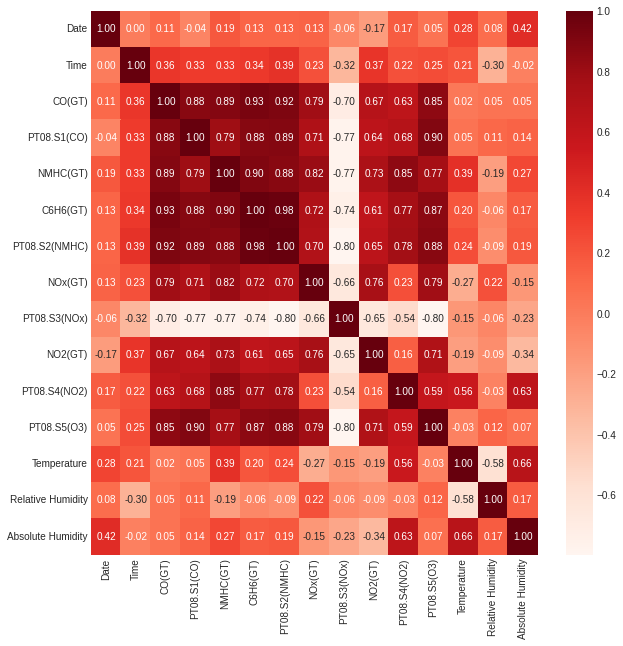

Date      Time    CO(GT)  PT08.S1(CO)  NMHC(GT)  \
Date               1.000000  0.000376  0.106835    -0.042183  0.191853   
Time               0.000376  1.000000  0.359728     0.328035  0.328662   
CO(GT)             0.106835  0.359728  1.000000     0.879288  0.889596   
PT08.S1(CO)       -0.042183  0.328035  0.879288     1.000000  0.790670   
NMHC(GT)           0.191853  0.328662  0.889596     0.790670  1.000000   
C6H6(GT)           0.127174  0.344169  0.931078     0.883795  0.902559   
PT08.S2(NMHC)      0.126115  0.389196  0.915514     0.892964  0.877696   
NOx(GT)            0.134142  0.225534  0.786401     0.713654  0.815522   
PT08.S3(NOx)      -0.060098 -0.323674 -0.703446    -0.771938 -0.771135   
NO2(GT)           -0.173301  0.369965  0.673840     0.641529  0.732864   
PT08.S4(NO2)       0.170405  0.221251  0.630703     0.682881  0.853267   
PT08.S5(O3)        0.046743  0.245063  0.854182     0.899324  0.766723   
Temperature        0.277291  0.206642  0.022109     0.048627  0.391587   
Relative Humidity  0.082202 -0.295799  0.048890     0.114606 -0.191454   
Absolute Humidity  0.417813 -0.018627  0.048556     0.135324  0.269738   

                   C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)   NO2(GT)  \
Date               0.127174       0.126115  0.134142     -0.060098 -0.173301   
Time               0.344169       0.389196  0.225534     -0.323674  0.369965   
CO(GT)             0.931078       0.915514  0.786401     -0.703446  0.673840   
PT08.S1(CO)        0.883795       0.892964  0.713654     -0.771938  0.641529   
NMHC(GT)           0.902559       0.877696  0.815522     -0.771135  0.732864   
C6H6(GT)           1.000000       0.981950  0.718839     -0.735744  0.614474   
PT08.S2(NMHC)      0.981950       1.000000  0.704435     -0.796703  0.646245   
NOx(GT)            0.718839       0.704435  1.000000     -0.655707  0.758083   
PT08.S3(NOx)      -0.735744      -0.796703 -0.655707      1.000000 -0.652083   
NO2(GT)            0.614474       0.646245  0.758083     -0.652083  1.000000   
PT08.S4(NO2)       0.765731       0.777254  0.233731     -0.538468  0.157360   
PT08.S5(O3)        0.865689       0.880578  0.787046     -0.796569  0.708128   
Temperature        0.198956       0.241373 -0.269683     -0.145112 -0.186533   
Relative Humidity -0.061681      -0.090380  0.221032     -0.056740 -0.091759   
Absolute Humidity  0.167972       0.186933 -0.149323     -0.232017 -0.335022   

                   PT08.S4(NO2)  PT08.S5(O3)  Temperature  Relative Humidity  \
Date                   0.170405     0.046743     0.277291           0.082202   
Time                   0.221251     0.245063     0.206642          -0.295799   
CO(GT)                 0.630703     0.854182     0.022109           0.048890   
PT08.S1(CO)            0.682881     0.899324     0.048627           0.114606   
NMHC(GT)               0.853267     0.766723     0.391587          -0.191454   
C6H6(GT)               0.765731     0.865689     0.198956          -0.061681   
PT08.S2(NMHC)          0.777254     0.880578     0.241373          -0.090380   
NOx(GT)                0.233731     0.787046    -0.269683           0.221032   
PT08.S3(NOx)          -0.538468    -0.796569    -0.145112          -0.056740   
NO2(GT)                0.157360     0.708128    -0.186533          -0.091759   
PT08.S4(NO2)           1.000000     0.591144     0.561270          -0.032188   
PT08.S5(O3)            0.591144     1.000000    -0.027172           0.124956   
Temperature            0.561270    -0.027172     1.000000          -0.578621   
Relative Humidity     -0.032188     0.124956    -0.578621           1.000000   
Absolute Humidity      0.629641     0.070751     0.656397           0.167971   

                   Absolute Humidity  
Date                        0.417813  
Time                       -0.018627  
CO(GT)                      0.048556  
PT08.S1(CO)                 0.135324  
NMHC(GT)                    0.269738  
C6H6(GT)                    0.167972  
PT0

In [ ]:
import seaborn as sns

# Creates heatmap of the correlation, can be easier visually to read than the table
plt.figure(figsize=(10,10))
sns.heatmap(dataRefined1.corr(), annot=True, cmap=plt.cm.Reds, fmt='0.2f')
plt.show()

#Output the correlation matrix for the data
dataRefined1.corr()

As can be seen in the correlation matrix, most of the pollutants have a low magnitude of correlation to the date, with NOx, NO2, and PT08.S4 having some of the higher magnitudes of correlations (I'm not considering NMHC for any of the observations made in this text, as it won't be analyzed). The time of day has a significantly higher degree of correlation with the pollutants than the time of year, with some as high as 0.35. This higher correlation with the time of day is consistent amongst the pollutants, as seen earlier in the graphs. The correlation with temperature seems highly variable, with some pollutants such as PT08.S4 having a correlation over 0.5, while other pollutants such as PT08.S5 having a correlation of less than 0.1. As seen with the graphs, relative humidity has relatively poor correlation with the concentrations of the pollutants, with only as few of them being greater than a magnitude of 0.1 correlation. Absolute humidity proves to have greater correlation with the concentration of the pollutants than relative humidity, though like temperature it also proves to be quite variable in the degree of correlation. It is also of note that many of the pollutants are highly correlated with one another, so if one were to know the concentration of one or more of the pollutants (i.e. one or more of the pollutants was easier to measure than the others) than one might be able to create more effective prediction models.

---

Ultimately, it can be seen that the various pollutants can have quite varying degrees of correlation to the various predicting variables, as expected for different chemicals. For this reason the inital plan of using all of the predicting features will be continued, to try to create as effective a model as possible. Since there are only 5 predicting variables the data isn't of very high dimensionality, and it is likely that the greatest cause of overfitting issues with the model will be taking polynomials of too high degrees, which would cause the 5 dimensional space to expand to a space of much larger dimensionality, particularly with all of the cross terms created by poly.fit_transform in sklearn.


# Model Creation: Polynomial Regression


### Degree Selection

Here we begin creating the models, creating a polynomial regression model for each target variable (pollutant)

In [ ]:
#Constants for training and testing
# Used for consistency of validation part and testing (don't want to test on data that was trained/validated on)
MAX_DEGREE = 8
SPLIT_NUMBER = 10
TEST_SIZE = 0.25
TEST_SPLIT_STATE = 0
K_FOLD_STATE = 0

# Will not be using targets3 and features 3 for this analysis
# because of low sampling
targets_list = [targets1, targets2]
features_list = [features1, features2]

(IMPORTANT!!) Run below cell to switch to mode where CO is used as a predicting feature.



In [ ]:
dataRefined2.isnull().sum()
coPredictorData = dataRefined2.copy()
coPredictorData = coPredictorData.dropna(axis=1)

targets1 = dataRefined1[targets.columns]
coName = coPredictorData.columns[2]
coPredictorData[coName] = (coPredictorData[coName] - coPredictorData[coName].mean()) / (coPredictorData[coName].max() - coPredictorData[coName].min())

coTargetColumns = [ 3, 4, 5, 6, 7, 8, 9, 10]
coFeatureColumns = [0, 1, 2, 11, 12, 13]

targetsCO = coPredictorData[coPredictorData.columns[coTargetColumns]]
featuresCO = coPredictorData[coPredictorData.columns[coFeatureColumns]]

targets_list = [targetsCO]
features_list = [featuresCO]

print(targets_list)
print(features_list)

[      PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
0          1360.0      11.9         1046.0    166.0        1056.0    113.0   
1          1292.0       9.4          955.0    103.0        1174.0     92.0   
2          1402.0       9.0          939.0    131.0        1140.0    114.0   
3          1376.0       9.2          948.0    172.0        1092.0    122.0   
4          1272.0       6.5          836.0    131.0        1205.0    116.0   
...           ...       ...            ...      ...           ...      ...   
9352       1314.0      13.5         1101.0    472.0         539.0    190.0   
9353       1163.0      11.4         1027.0    353.0         604.0    179.0   
9354       1142.0      12.4         1063.0    293.0         603.0    175.0   
9355       1003.0       9.5          961.0    235.0         702.0    156.0   
9356       1071.0      11.9         1047.0    265.0         654.0    168.0   

      PT08.S4(NO2)  PT08.S5(O3)  
0           1692.0       126

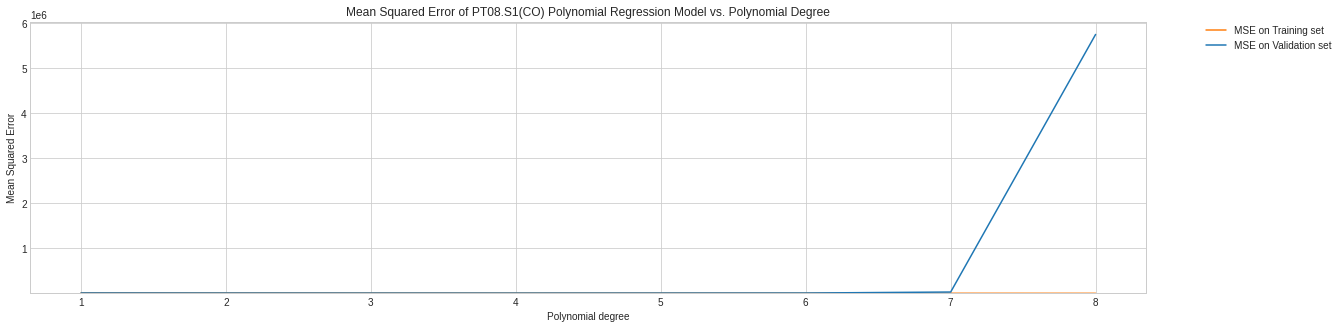

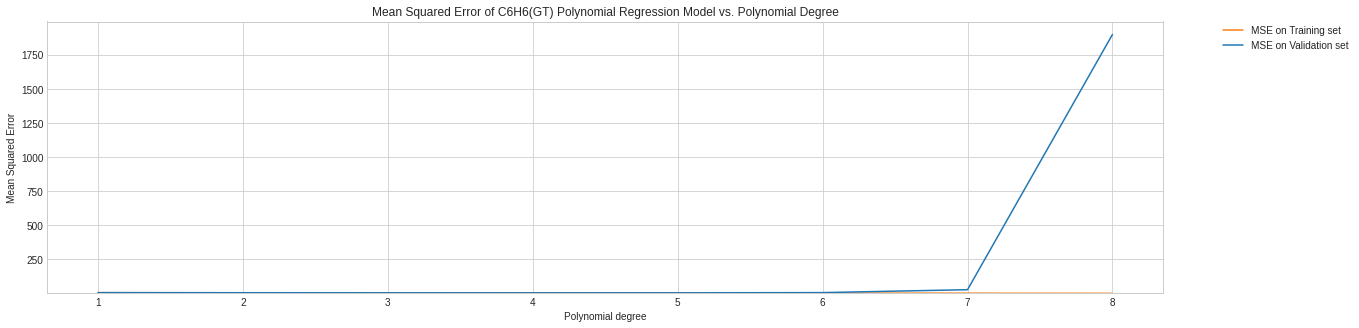

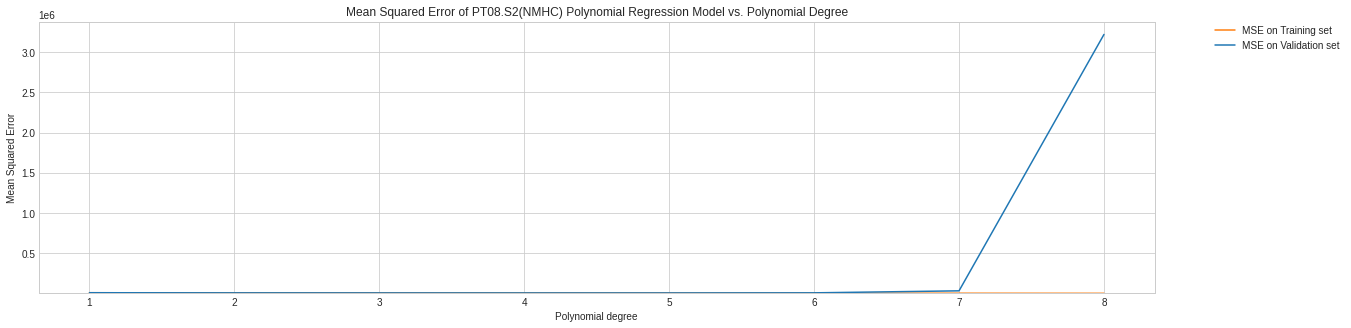

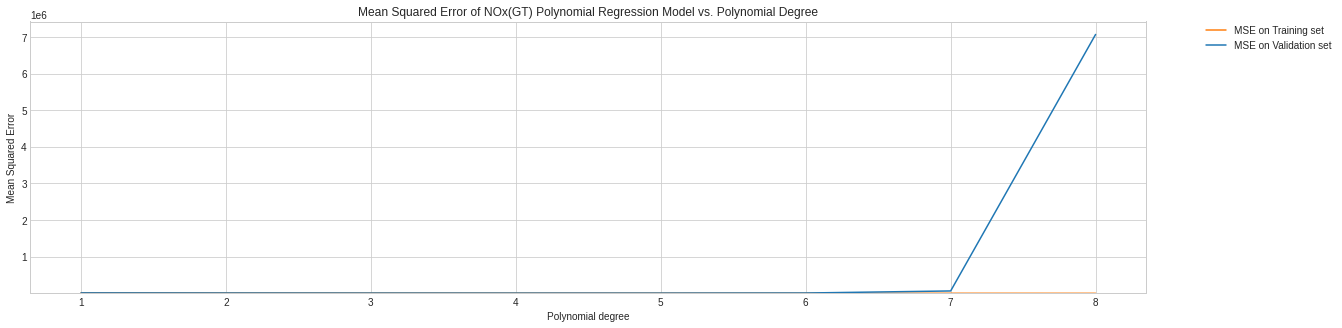

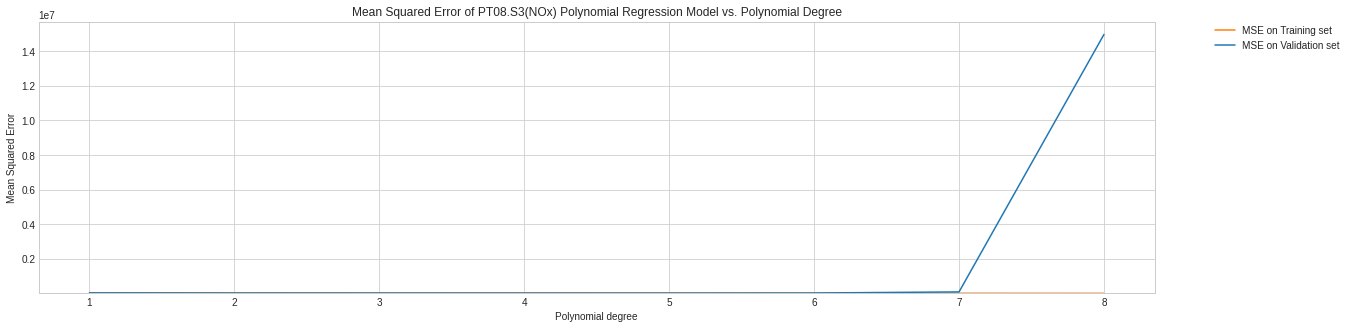

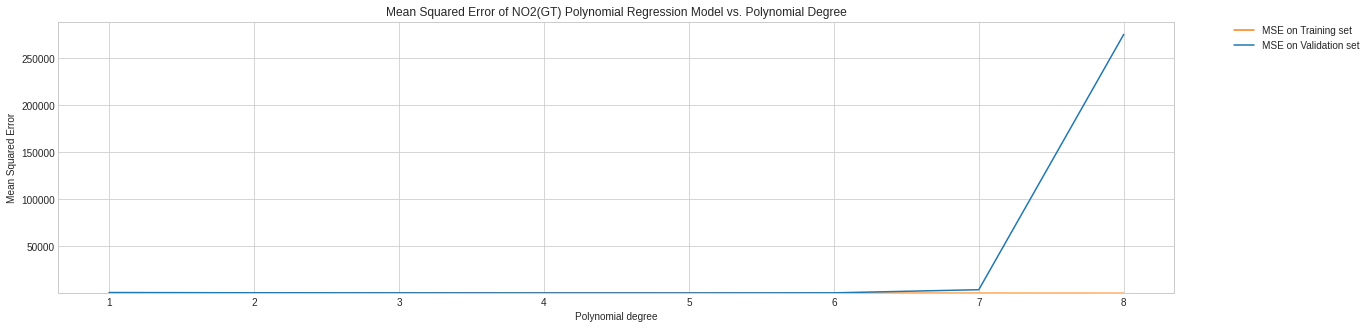

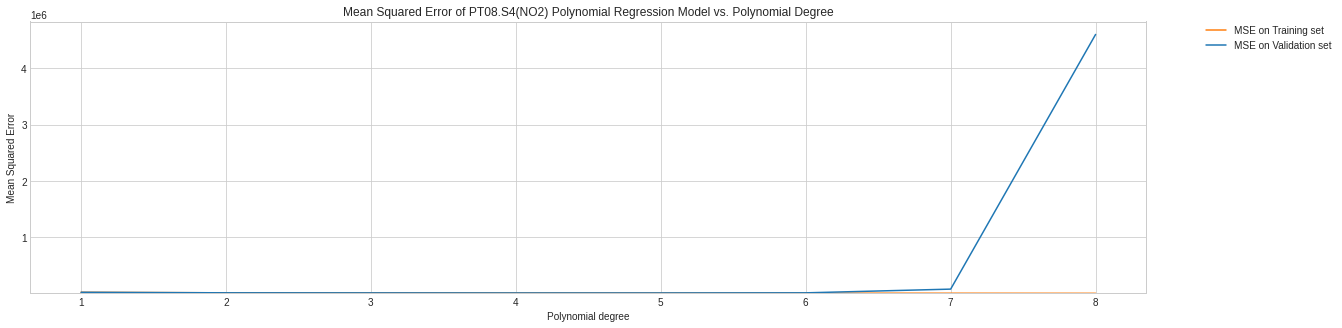

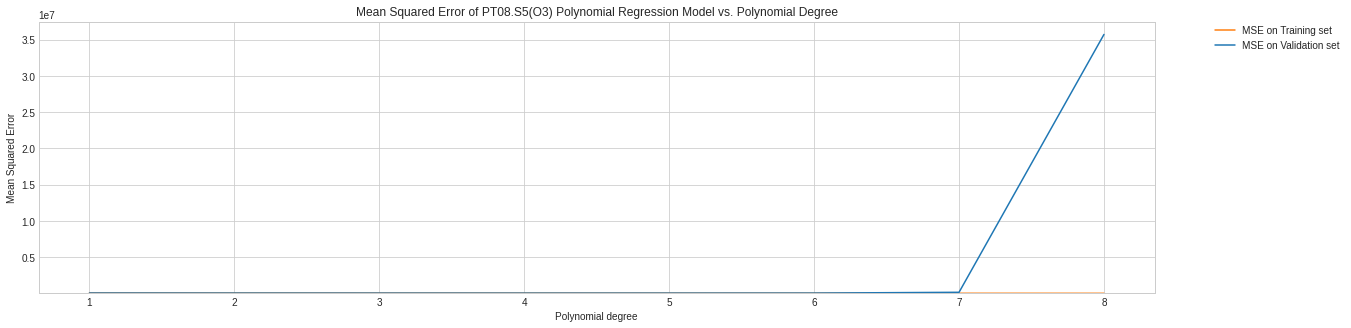

In [ ]:
from matplotlib.rcsetup import validate_dpi
import sklearn.model_selection as skms
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn import metrics

for i in range(0, len(targets_list)):
  cur_targets = targets_list[i]
  cur_features = features_list[i]

  for k in range(len(cur_targets.columns)):
    single_target = cur_targets[cur_targets.columns[k]]

    features_train, features_test, targets_train, targets_test = skms.train_test_split(cur_features,single_target,random_state = TEST_SPLIT_STATE, test_size=TEST_SIZE)

    train_error = np.zeros(MAX_DEGREE)
    validation_error = np.zeros(MAX_DEGREE)
    d_range = list(range(1, MAX_DEGREE+1))
    for i in range(1, MAX_DEGREE+1, 1):
      #for train_index, test_index in kf:
      # poly model
      poly = PolynomialFeatures(degree = i)
      poly_features_train = poly.fit_transform(features_train)
      kf = KFold(n_splits=SPLIT_NUMBER, shuffle=True, random_state=K_FOLD_STATE).split(X=features_train)

      mse_train = np.zeros(SPLIT_NUMBER)
      mse_validation = np.zeros(SPLIT_NUMBER)
      for j, indexes in enumerate(kf, start=0):
        train_index = indexes[0]
        validation_index = indexes[1]
        X_train, X_validation = poly_features_train[train_index], poly_features_train[validation_index]
        y_train, y_validation = targets_train.iloc[train_index], targets_train.iloc[validation_index]

        # linear regression
        regression = LinearRegression()
        # Fit the linear regression
        model = regression.fit(X_train, y_train)
        mse_validation[j] = metrics.mean_squared_error(y_validation, model.predict(X_validation))
        mse_train[j] = metrics.mean_squared_error(y_train, model.predict(X_train))

      train_error[i-1] = mse_train.mean()
      validation_error[i-1] = mse_validation.mean()

    fig, ax1 = plt.subplots(figsize = (20,5))

    ax1.plot(d_range, train_error, color='tab:orange', label='MSE on Training set')
    ax1.plot(d_range, validation_error, color = 'tab:blue', label='MSE on Validation set')
    plt.title('Mean Squared Error of ' + cur_targets.columns[k] + ' Polynomial Regression Model vs. Polynomial Degree')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('Polynomial degree')
    plt.ylabel('Mean Squared Error')
    ax1.set_ylim(train_error.min())
    plt.show()
    print()

As can be seen from the graphs above, for most of the target variables the accuracy of the models on the validation set of data deteriorates after polynomials of degree 7. Some of the models deteriorate in accuracy at polynomials of degree 7 and those that begin worsening at degree 8 have little improvement in accuracy on the validation set when the degree changes from 6 to 7. For this reason, and for simplicity, the degrees for the polynomial regression models used on the test set will uniformly be chosen to be degree 6. As expected, the accuracy for all models on the training set improves with increasing degree of the polynomial regression, even when the accuracy on the validation set worsens, showing that after degree 7 many of the models (and after degree 8 all of the models) are overfitted. It can be seen that for polynomials of degree more than a couple less than 6 that the mean squared error on the validation set is nearly equal to that on the training set, demonstrating that polynomial regression for degrees lower than 6 tend to be underfitted models.

### Results

In [ ]:
from matplotlib.rcsetup import validate_dpi
import sklearn.model_selection as skms
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn import metrics
BEST_DEGREE = 6

Model test results for concentration of: PT08.S1(CO)
Mean squared error of model:  6137.579588415023
R2 value for model fit for the test data:  0.8774140529961608



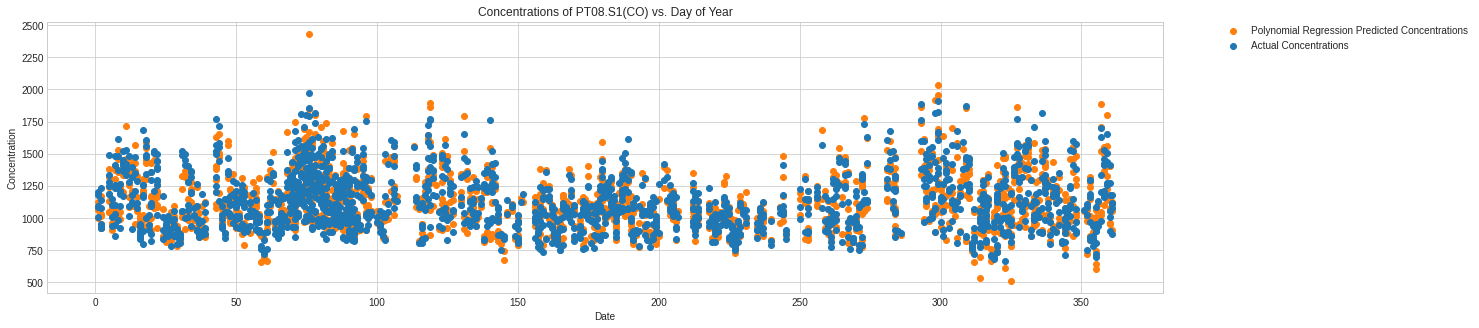


Model test results for concentration of: C6H6(GT)
Mean squared error of model:  5.425422227062494
R2 value for model fit for the test data:  0.905919445440698



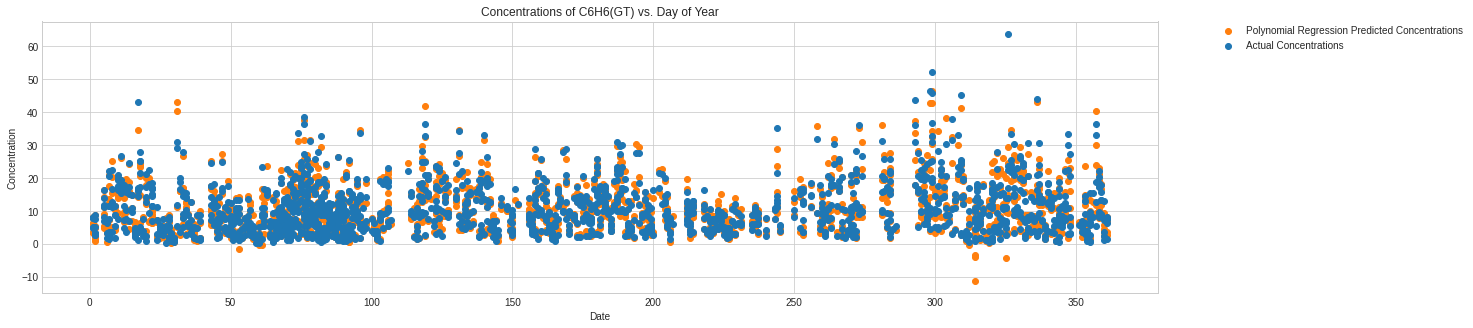


Model test results for concentration of: PT08.S2(NMHC)
Mean squared error of model:  6330.953638170537
R2 value for model fit for the test data:  0.9118821304771743



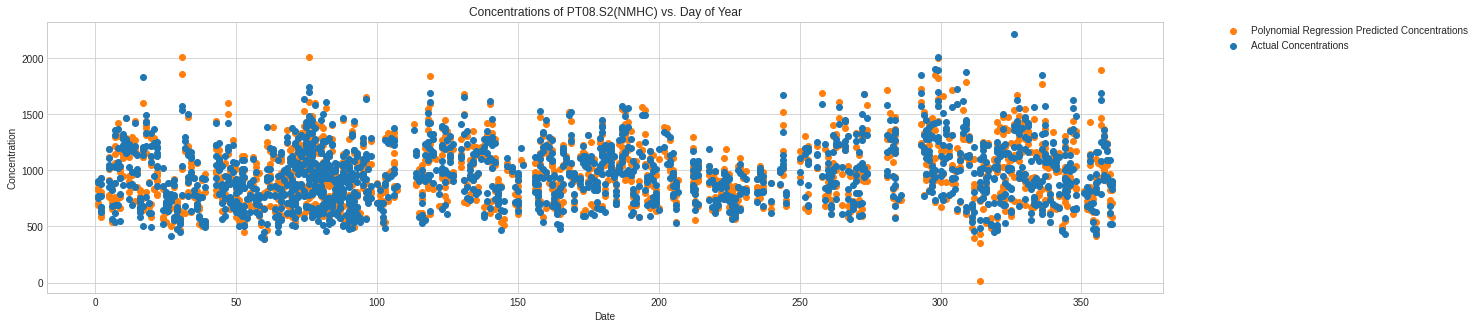


Model test results for concentration of: NOx(GT)
Mean squared error of model:  6749.4850785706885
R2 value for model fit for the test data:  0.8454707222052894



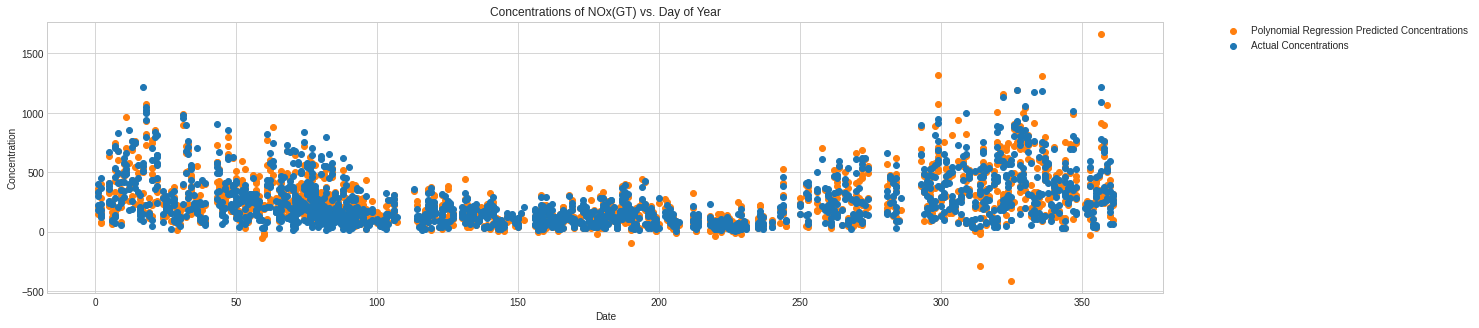


Model test results for concentration of: PT08.S3(NOx)
Mean squared error of model:  24911.63799940571
R2 value for model fit for the test data:  0.6504762009390694



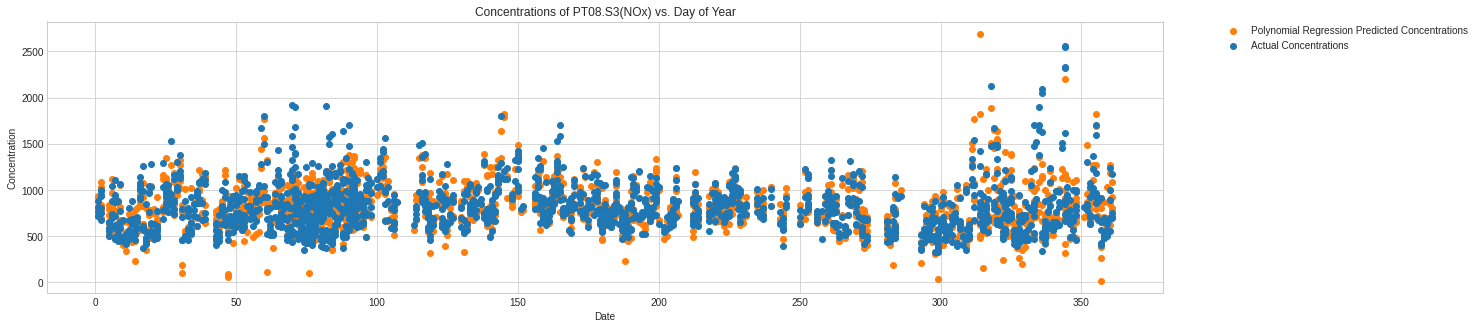


Model test results for concentration of: NO2(GT)
Mean squared error of model:  453.79501537167357
R2 value for model fit for the test data:  0.8022995044190108



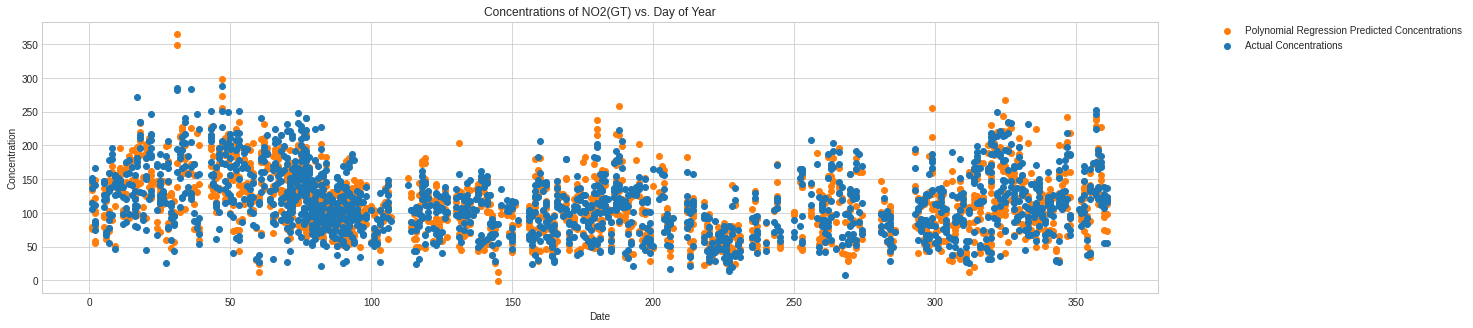


Model test results for concentration of: PT08.S4(NO2)
Mean squared error of model:  10295.404592832878
R2 value for model fit for the test data:  0.9192951860833495



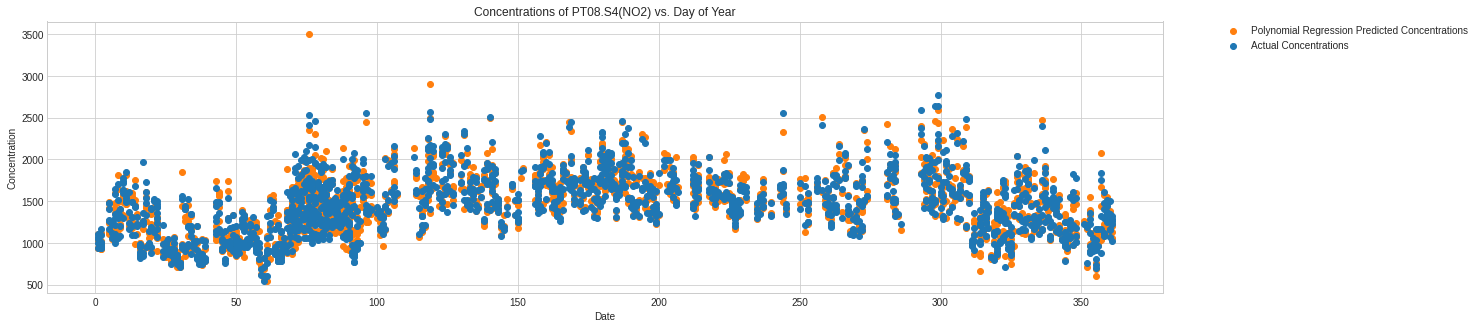


Model test results for concentration of: PT08.S5(O3)
Mean squared error of model:  31730.290510113133
R2 value for model fit for the test data:  0.8156041600645618



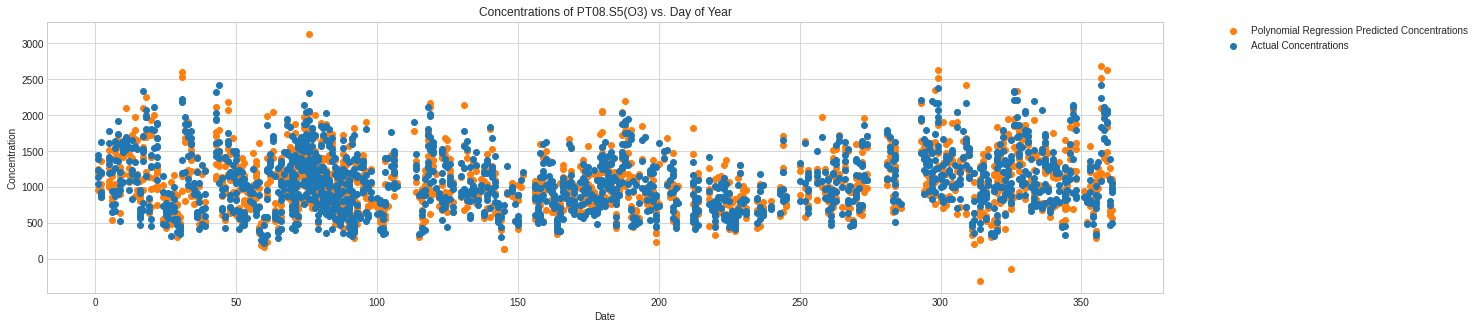


Average R2 value:  0.8410451753281644


In [ ]:
counter = -1
sumOfR2 = 0
for i in range(0, len(targets_list)):
  cur_targets = targets_list[i]
  cur_features = features_list[i]

  for k in range(len(cur_targets.columns)):
    counter = counter + 1

    single_target = cur_targets[cur_targets.columns[k]]
    

    features_train, features_test, targets_train, targets_test = skms.train_test_split(cur_features,single_target,random_state = TEST_SPLIT_STATE, test_size=TEST_SIZE)

    #for train_index, test_index in kf:
    # poly model
    poly = PolynomialFeatures(degree = BEST_DEGREE)
    poly_features_train = poly.fit_transform(features_train)
    poly_features_test = poly.fit_transform(features_test)

    # linear regression
    regression = LinearRegression()
    # Fit the linear regression
    model = regression.fit(poly_features_train, targets_train)
    print("Model test results for concentration of: " + cur_targets.columns[k])
    print("Mean squared error of model: ", metrics.mean_squared_error(targets_test, model.predict(poly_features_test)))
    
    #Calculate the R2 value for the model with the data
    from sklearn.metrics import r2_score
    r2 = r2_score(targets_test, model.predict(poly_features_test))
    sumOfR2 = sumOfR2 + r2

    print("R2 value for model fit for the test data: ", r2)
    print()

    index_graphed_against = 0

    date_points = features_test[features_test.columns[index_graphed_against]] * (data[features.columns[index_graphed_against]].max() - 
                                                                                data[features.columns[index_graphed_against]].min()) + data[features.columns[index_graphed_against]].mean()

    fig, ax1 = plt.subplots(figsize = (20,5))

    plt.scatter(x=date_points, y=model.predict(poly_features_test), color='tab:orange', label='Polynomial Regression Predicted Concentrations')
    plt.scatter(x=date_points, y=targets_test, color = 'tab:blue', label='Actual Concentrations')
    plt.title('Concentrations of ' + cur_targets.columns[k] + ' vs. Day of Year')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel(features_test.columns[index_graphed_against])
    plt.ylabel('Concentration')
    plt.show()
    print()

print("Average R2 value: ", sumOfR2/(counter+1))

As can be seen from the above graphs, which plot the model prediction and actual results to the same plot with respect to the day of the year, it appears that the bulk of the data's trends are captured by the model. The model still appears to have its failures, particularly when it comes to concentrations of the pollutants that are outliers, far greater or lesser than the mean for a given parameter. The R^2 values for the models range from approximately 0.41 to 0.69, agreeing with the previous sentiment and showing that the models typically account for about half of the variation in the data (though it varies by over 10%  variation depending on the pollutant being modelled). The difference in effectiveness of the models is to be expected, after what was seen in the correlation matrix, which showed that the correlation of some of the predictors such as temperature varied drastically depending on the pollutant being considered. When compared to the mean squared error of the various models from the validation testing, when tested against the test data the final models had mean squared errors that were comparable or lower than the lowest mean squared errors in each set of degrees used for validation tests. This shows that the choice of degree for the polynomial regression was effective, as the mean squared error for the models on the test set were some of the lower mean squared errors measured (excluding the mean squared errors for those over trained models on the training set of data).

# Model 2: Decision Tree Classifier

### Tuning Params

In [ ]:
#Constants for training and testing
# Used for consistency of validation part and testing (don't want to test on data that was trained/validated on)
MAX_DEGREE = 5
SPLIT_NUMBER = 10
TEST_SIZE = 0.25
TEST_SPLIT_STATE = 0
K_FOLD_STATE = 0

# Will not be using targets3 and features 3 for this analysis
# because of low sampling
targets_list = [targets1, targets2]
features_list = [features1, features2]

(IMPORTANT!!) Run below cell to switch to mode where CO is used as a predicting feature.

In [ ]:
dataRefined2.isnull().sum()
coPredictorData = dataRefined2.copy()
coPredictorData = coPredictorData.dropna(axis=1)

targets1 = dataRefined1[targets.columns]
coName = coPredictorData.columns[2]
coPredictorData[coName] = (coPredictorData[coName] - coPredictorData[coName].mean()) / (coPredictorData[coName].max() - coPredictorData[coName].min())

coTargetColumns = [ 3, 4, 5, 6, 7, 8, 9, 10]
coFeatureColumns = [0, 1, 2, 11, 12, 13]

targetsCO = coPredictorData[coPredictorData.columns[coTargetColumns]]
featuresCO = coPredictorData[coPredictorData.columns[coFeatureColumns]]

targets_list = [targetsCO]
features_list = [featuresCO]

print(targets_list)
print(features_list)

[      PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
0          1360.0      11.9         1046.0    166.0        1056.0    113.0   
1          1292.0       9.4          955.0    103.0        1174.0     92.0   
2          1402.0       9.0          939.0    131.0        1140.0    114.0   
3          1376.0       9.2          948.0    172.0        1092.0    122.0   
4          1272.0       6.5          836.0    131.0        1205.0    116.0   
...           ...       ...            ...      ...           ...      ...   
9352       1314.0      13.5         1101.0    472.0         539.0    190.0   
9353       1163.0      11.4         1027.0    353.0         604.0    179.0   
9354       1142.0      12.4         1063.0    293.0         603.0    175.0   
9355       1003.0       9.5          961.0    235.0         702.0    156.0   
9356       1071.0      11.9         1047.0    265.0         654.0    168.0   

      PT08.S4(NO2)  PT08.S5(O3)  
0           1692.0       126

In [ ]:
maximum_depth = 25
max_depth = np.arange(1, maximum_depth+1, 1)
BEST_MAX_DEPTH = np.zeros(0)

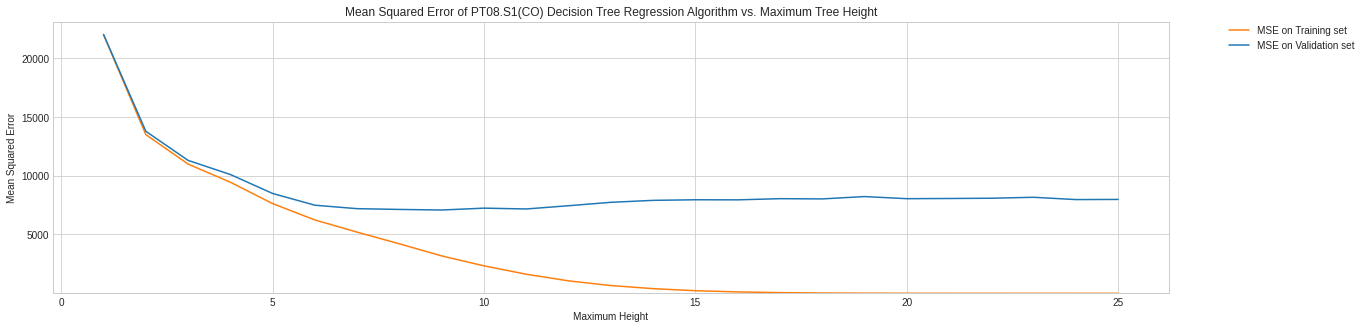

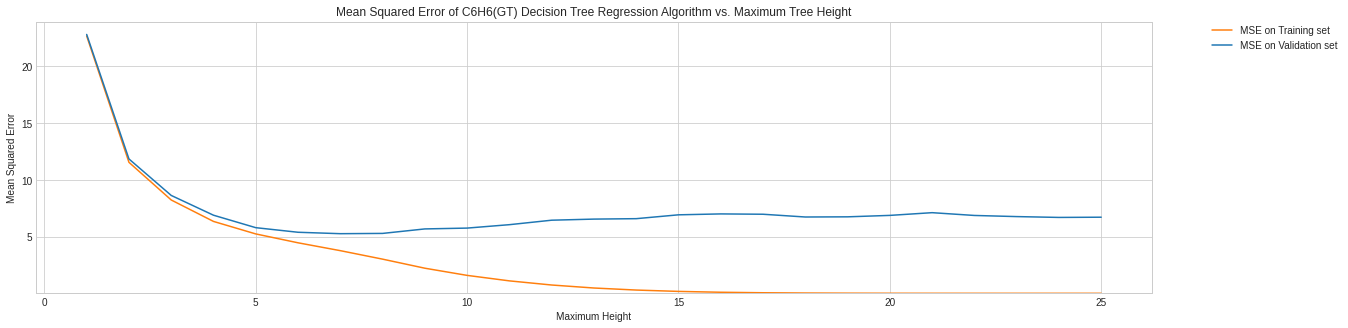

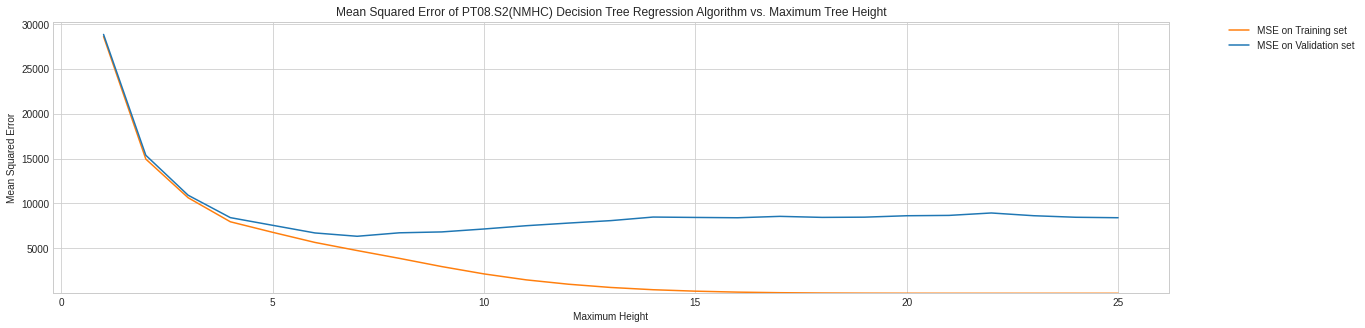

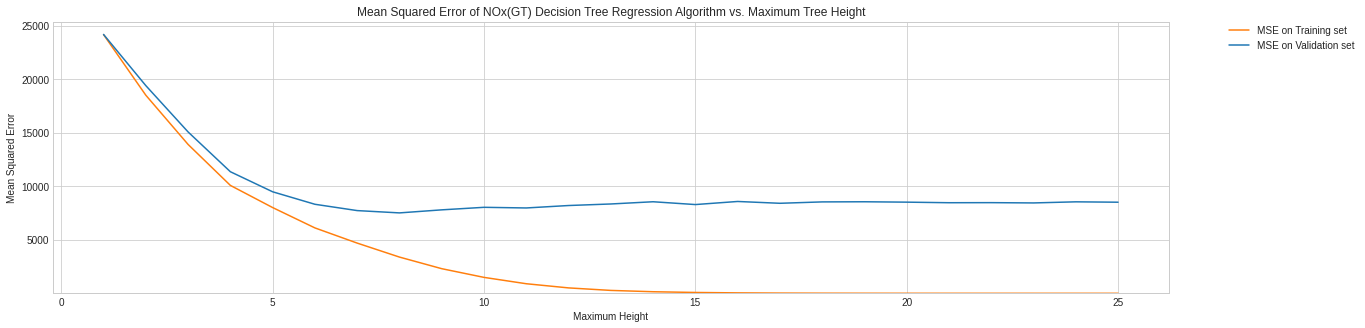

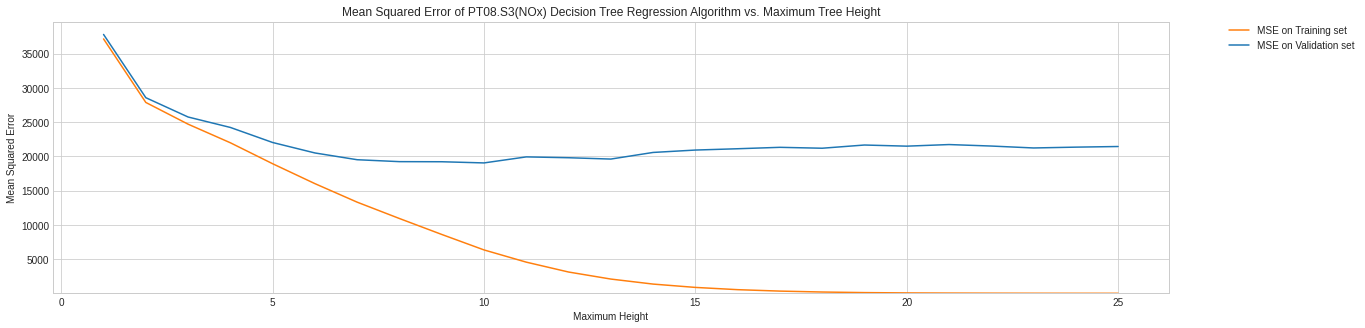

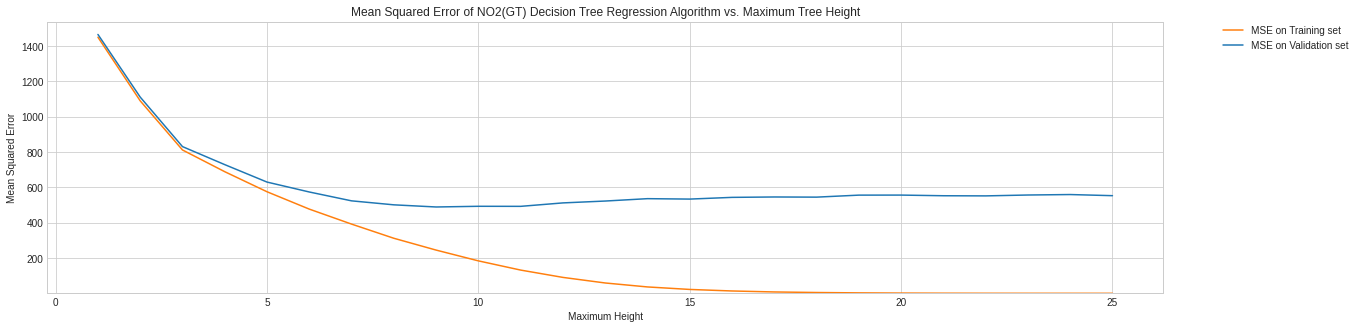

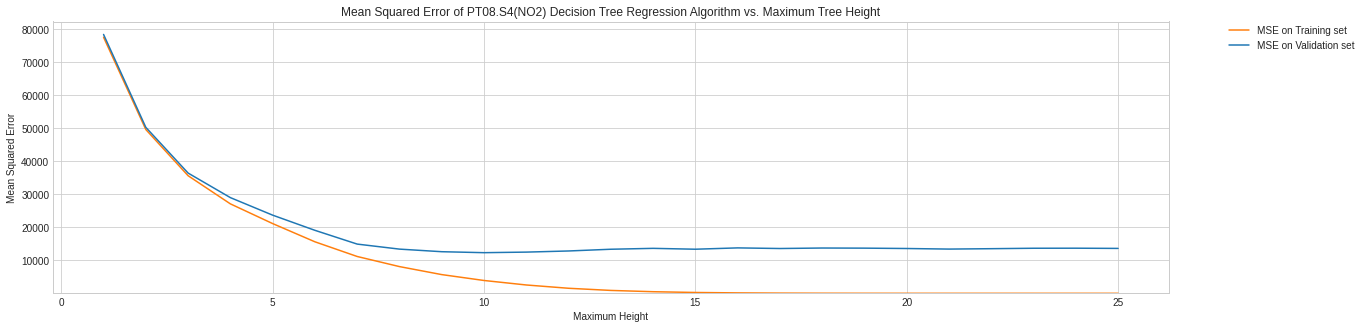

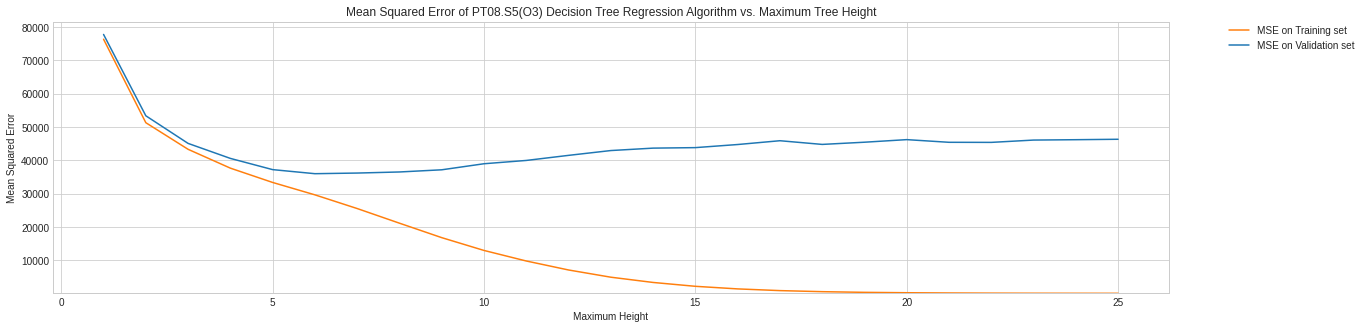

In [ ]:
from matplotlib.rcsetup import validate_dpi
import sklearn.model_selection as skms
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn import metrics

for i in range(0, len(targets_list)):
  cur_targets = targets_list[i]
  cur_features = features_list[i]

  for k in range(len(cur_targets.columns)):
    single_target = cur_targets[cur_targets.columns[k]]

    features_train, features_test, targets_train, targets_test = skms.train_test_split(cur_features,single_target,random_state = TEST_SPLIT_STATE, test_size=TEST_SIZE)

    train_error = np.zeros(len(max_depth))
    validation_error = np.zeros(len(max_depth))
    
    for m,max in enumerate(max_depth):
      kf = KFold(n_splits=SPLIT_NUMBER, shuffle=True, random_state=K_FOLD_STATE).split(X=features_train)

      mse_train = np.zeros(SPLIT_NUMBER)
      mse_validation = np.zeros(SPLIT_NUMBER)
      for j, indexes in enumerate(kf, start=0):
        train_index = indexes[0]
        validation_index = indexes[1]
        X_train, X_validation = features_train.iloc[train_index], features_train.iloc[validation_index]
        y_train, y_validation = targets_train.iloc[train_index], targets_train.iloc[validation_index]

        # Decision Tree Regression
        DecisionTreeModel = DecisionTreeRegressor(random_state=0, max_depth=max).fit(X_train, y_train)

        mse_validation[j] = metrics.mean_squared_error(y_validation, DecisionTreeModel.predict(X_validation))
        mse_train[j] = metrics.mean_squared_error(y_train, DecisionTreeModel.predict(X_train))

      train_error[m] = mse_train.mean()
      validation_error[m] = mse_validation.mean()

    fig, ax1 = plt.subplots(figsize = (20,5))

    ax1.plot(max_depth, train_error, color='tab:orange', label='MSE on Training set')
    ax1.plot(max_depth, validation_error, color = 'tab:blue', label='MSE on Validation set')
    plt.title('Mean Squared Error of ' + cur_targets.columns[k] + ' Decision Tree Regression Algorithm vs. Maximum Tree Height')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('Maximum Height')
    plt.ylabel('Mean Squared Error')
    ax1.set_ylim(train_error.min())
    plt.show()
    print()


    bestChoiceIndex = 0
    for n in range(len(max_depth)):
      if (validation_error[n] < validation_error[bestChoiceIndex]):
        bestChoiceIndex = n

    BEST_MAX_DEPTH = np.append(BEST_MAX_DEPTH, max_depth[bestChoiceIndex])

In [ ]:
maximum_leaves = 500
max_leaves = np.arange(11, maximum_leaves+1, 10)
BEST_MAX_LEAVES = np.zeros(0)

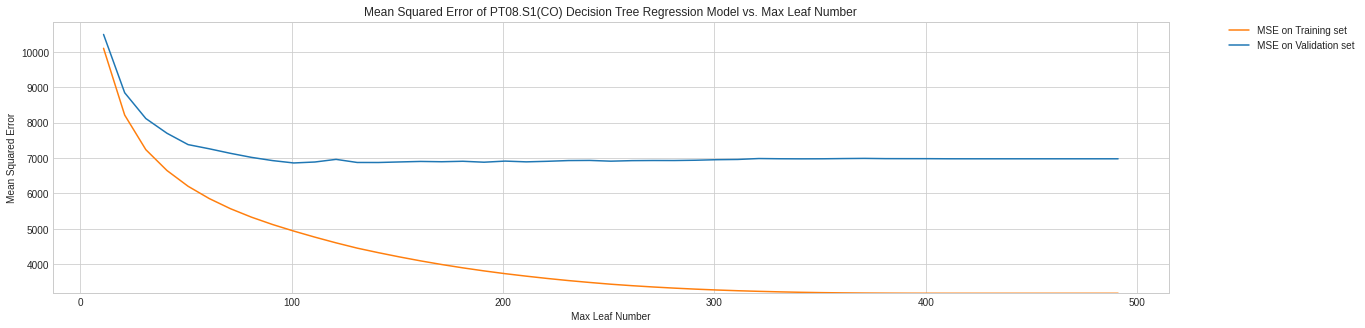

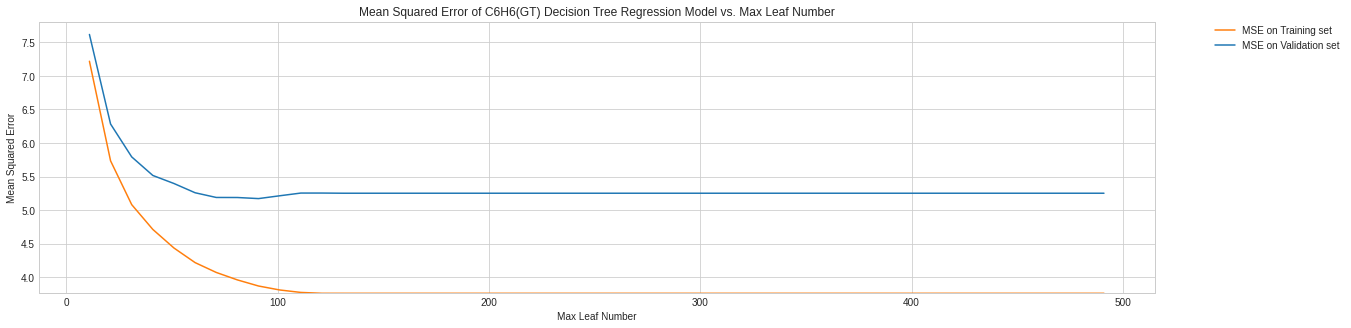

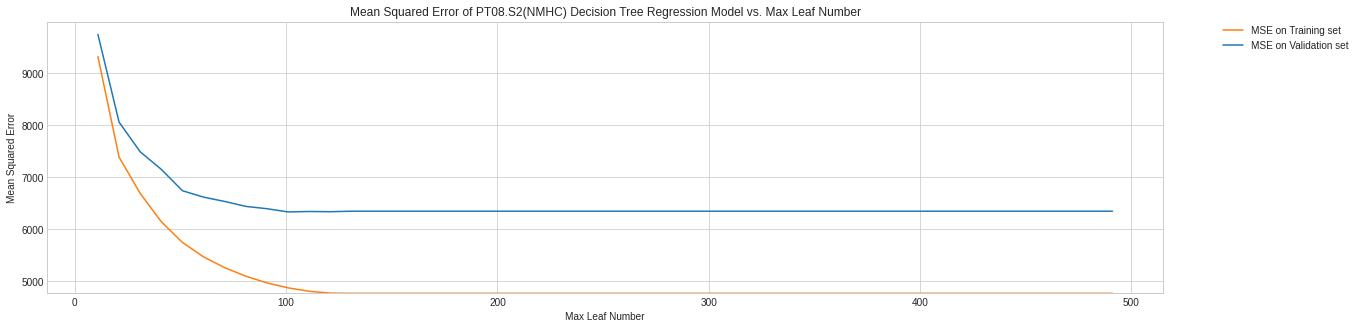

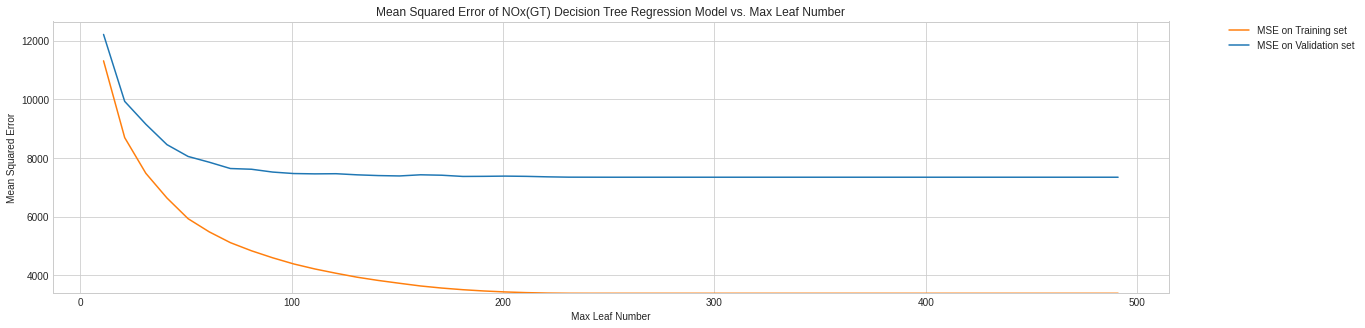

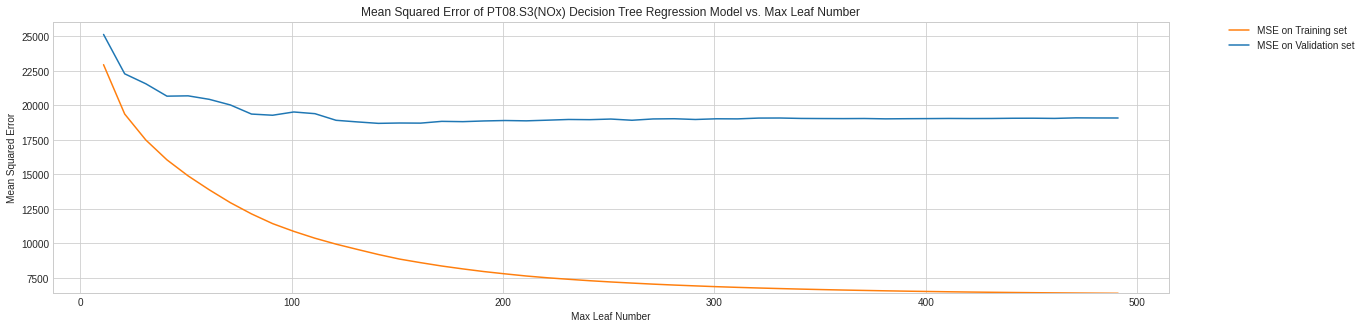

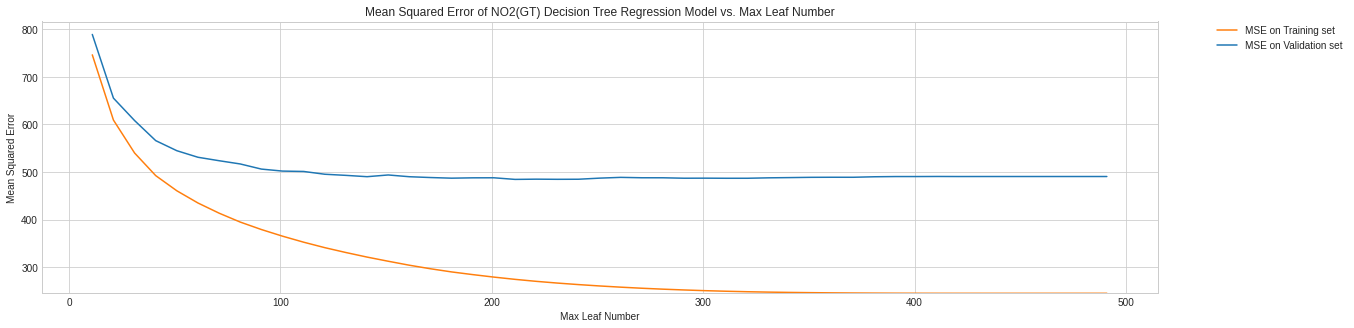

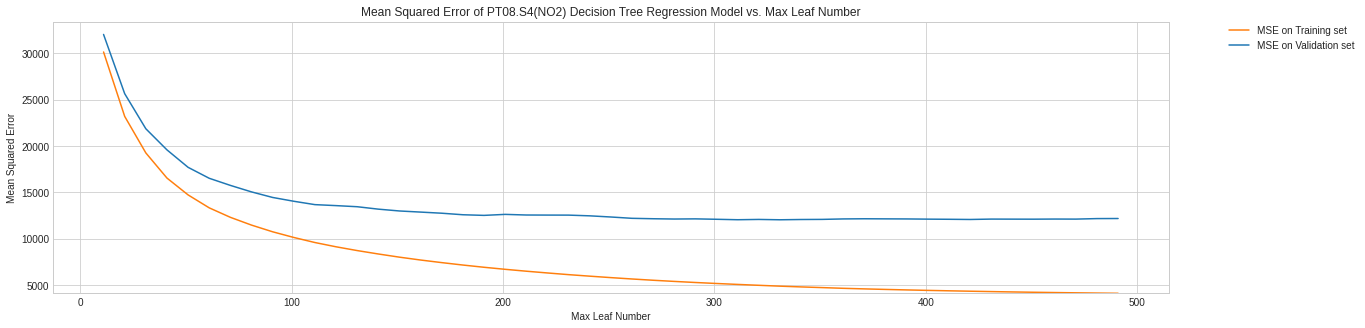

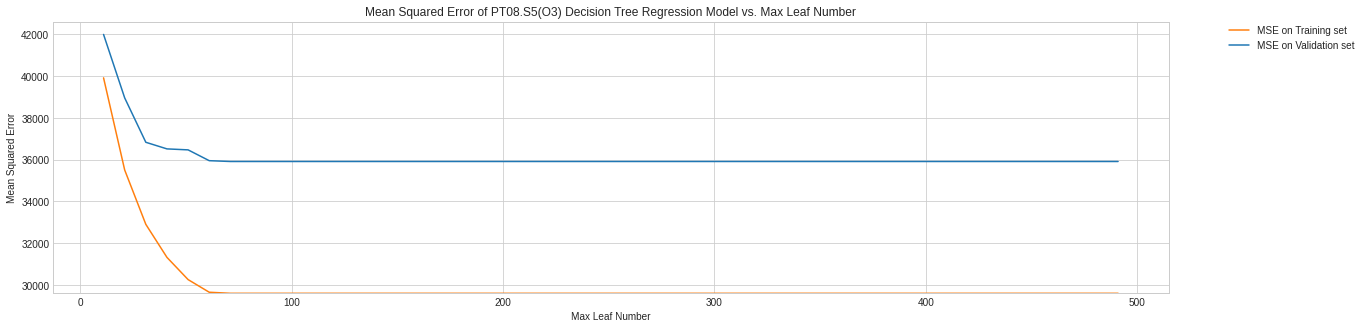

In [ ]:
from matplotlib.rcsetup import validate_dpi
import sklearn.model_selection as skms
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn import metrics

bestMaxDepthIndex = -1

for i in range(0, len(targets_list)):
  cur_targets = targets_list[i]
  cur_features = features_list[i]

  for k in range(len(cur_targets.columns)):
    bestMaxDepthIndex = bestMaxDepthIndex + 1

    single_target = cur_targets[cur_targets.columns[k]]

    features_train, features_test, targets_train, targets_test = skms.train_test_split(cur_features,single_target,random_state = TEST_SPLIT_STATE, test_size=TEST_SIZE)

    train_error = np.zeros(len(max_leaves))
    validation_error = np.zeros(len(max_leaves))
    
    for m,max in enumerate(max_leaves):
      kf = KFold(n_splits=SPLIT_NUMBER, shuffle=True, random_state=K_FOLD_STATE).split(X=features_train)

      mse_train = np.zeros(SPLIT_NUMBER)
      mse_validation = np.zeros(SPLIT_NUMBER)
      for j, indexes in enumerate(kf, start=0):
        train_index = indexes[0]
        validation_index = indexes[1]
        X_train, X_validation = features_train.iloc[train_index], features_train.iloc[validation_index]
        y_train, y_validation = targets_train.iloc[train_index], targets_train.iloc[validation_index]

        # Decision Tree Regression
        DecisionTreeModel = DecisionTreeRegressor(random_state=0, max_depth=(int)(BEST_MAX_DEPTH[bestMaxDepthIndex]), max_leaf_nodes=max).fit(X_train, y_train)

        mse_validation[j] = metrics.mean_squared_error(y_validation, DecisionTreeModel.predict(X_validation))
        mse_train[j] = metrics.mean_squared_error(y_train, DecisionTreeModel.predict(X_train))

      train_error[m] = mse_train.mean()
      validation_error[m] = mse_validation.mean()

    fig, ax1 = plt.subplots(figsize = (20,5))

    ax1.plot(max_leaves, train_error, color='tab:orange', label='MSE on Training set')
    ax1.plot(max_leaves, validation_error, color = 'tab:blue', label='MSE on Validation set')
    plt.title('Mean Squared Error of ' + cur_targets.columns[k] + ' Decision Tree Regression Model vs. Max Leaf Number')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('Max Leaf Number')
    plt.ylabel('Mean Squared Error')
    ax1.set_ylim(train_error.min())
    plt.show()
    print()


    bestChoiceIndex = 0
    for n in range(len(max_leaves)):
      if (validation_error[n] < validation_error[bestChoiceIndex]):
        bestChoiceIndex = n

    BEST_MAX_LEAVES = np.append(BEST_MAX_LEAVES, max_leaves[bestChoiceIndex])

### Results

In [ ]:
print(BEST_MAX_DEPTH)
print(BEST_MAX_LEAVES)

[ 9.  7.  7.  8. 10.  9. 10.  6.]
[101.  91. 101. 251. 141. 211. 331.  71.]


Model test results for concentration of: PT08.S1(CO)
Mean squared error of model:  6893.950154411471
R2 value for model fit for the test data:  0.8623070550692389
Max depth of tree:  9.0
Max leaf number of tree:  101.0



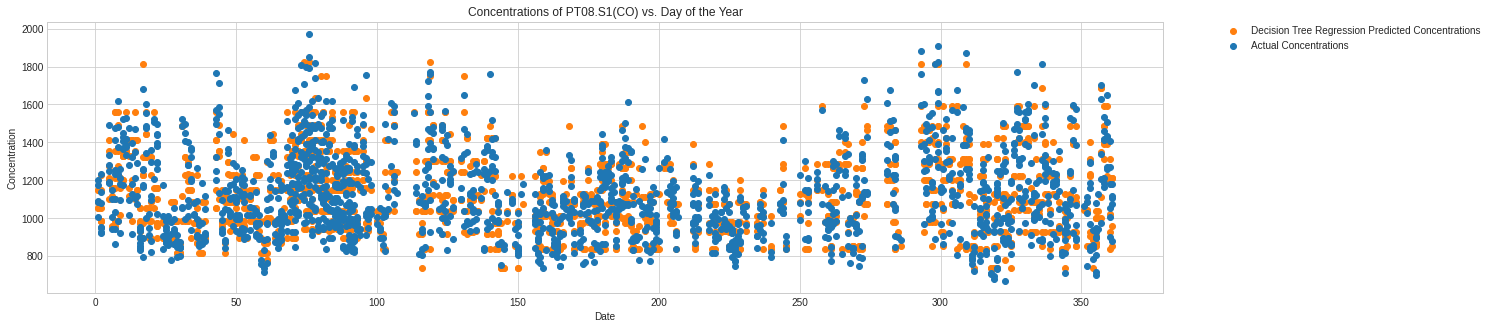

Model test results for concentration of: C6H6(GT)
Mean squared error of model:  6.946552337834672
R2 value for model fit for the test data:  0.8795420026557919
Max depth of tree:  7.0
Max leaf number of tree:  91.0



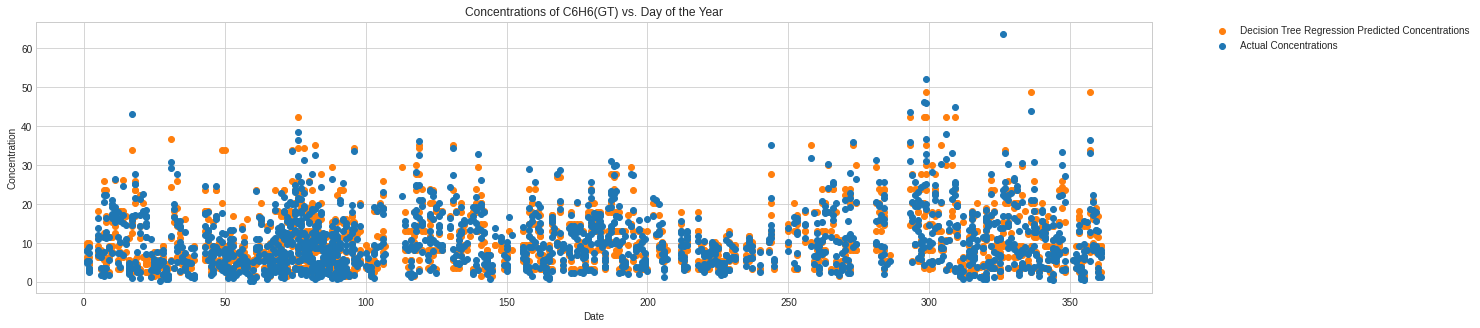

Model test results for concentration of: PT08.S2(NMHC)
Mean squared error of model:  7026.325473624897
R2 value for model fit for the test data:  0.9022035436214787
Max depth of tree:  7.0
Max leaf number of tree:  101.0



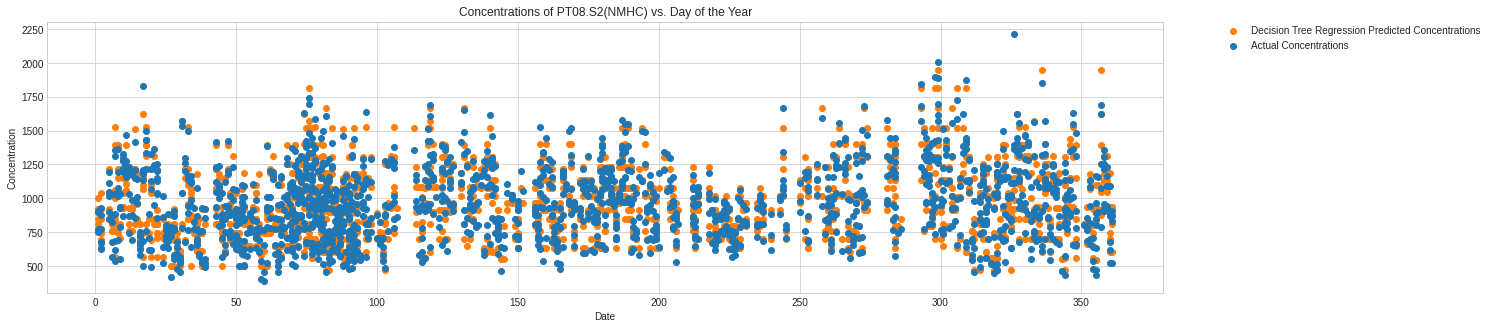

Model test results for concentration of: NOx(GT)
Mean squared error of model:  7014.947759940475
R2 value for model fit for the test data:  0.8393929613159791
Max depth of tree:  8.0
Max leaf number of tree:  251.0



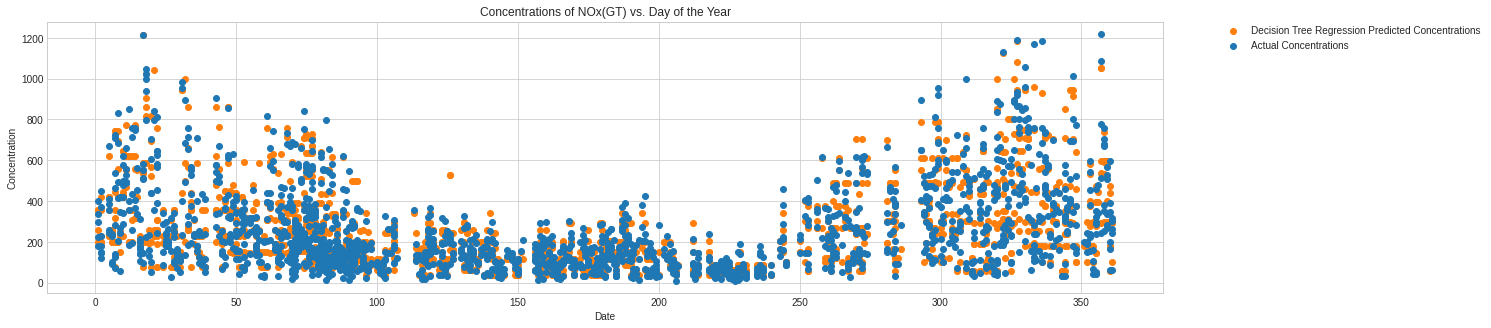

Model test results for concentration of: PT08.S3(NOx)
Mean squared error of model:  22399.47480100389
R2 value for model fit for the test data:  0.6857232138005845
Max depth of tree:  10.0
Max leaf number of tree:  141.0



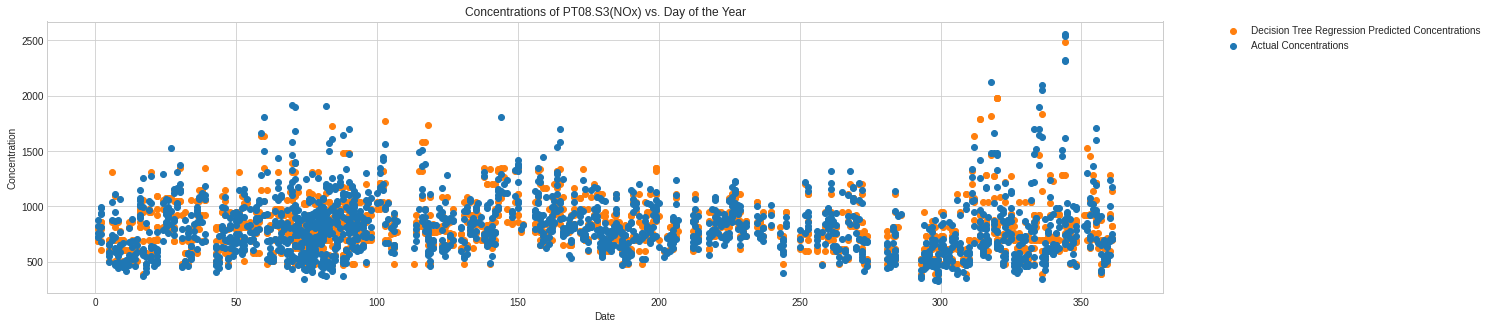

Model test results for concentration of: NO2(GT)
Mean squared error of model:  577.179539804528
R2 value for model fit for the test data:  0.7485457592232396
Max depth of tree:  9.0
Max leaf number of tree:  211.0



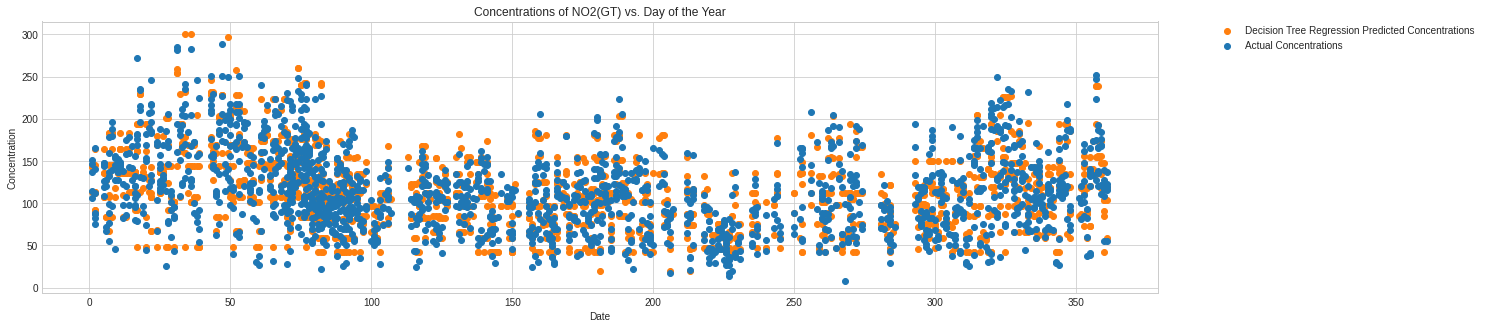

Model test results for concentration of: PT08.S4(NO2)
Mean squared error of model:  12099.419943564078
R2 value for model fit for the test data:  0.9051536609134794
Max depth of tree:  10.0
Max leaf number of tree:  331.0



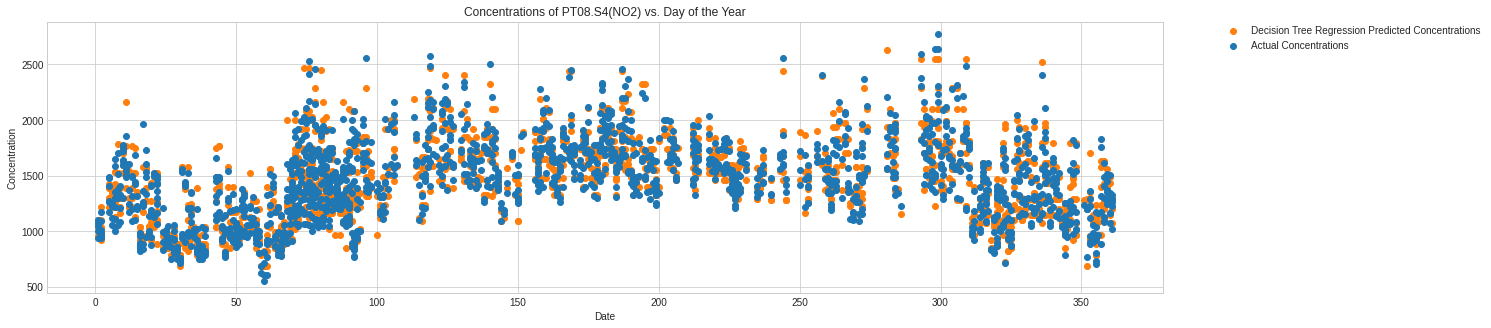

Model test results for concentration of: PT08.S5(O3)
Mean squared error of model:  36085.86728054071
R2 value for model fit for the test data:  0.790292376778799
Max depth of tree:  6.0
Max leaf number of tree:  71.0



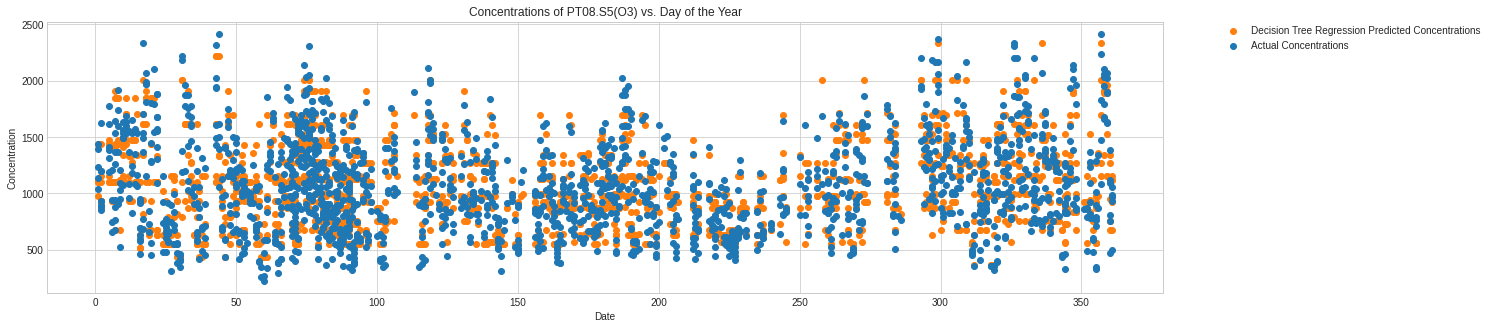

Average R2 value:  0.8266450716723239


In [ ]:
maxDepthIndex = -1
maxLeavesIndex = -1
sumOfR2 = 0

for i in range(0, len(targets_list)):
  cur_targets = targets_list[i]
  cur_features = features_list[i]

  for k in range(len(cur_targets.columns)):
    maxDepthIndex = maxDepthIndex + 1
    maxLeavesIndex = maxLeavesIndex + 1
    
    single_target = cur_targets[cur_targets.columns[k]]
    

    features_train, features_test, targets_train, targets_test = skms.train_test_split(cur_features,single_target,random_state = TEST_SPLIT_STATE, test_size=TEST_SIZE)

    #for train_index, test_index in kf:
    # Decision tree regression model
    #DecisionTreeModel = DecisionTreeRegressor(random_state=0, max_depth=(int)(BEST_MAX_DEPTH[maxDepthIndex]), max_leaf_nodes=(int)(BEST_MAX_LEAVES[maxLeavesIndex])).fit(features_train, targets_train)
    #DecisionTreeModel = DecisionTreeRegressor(random_state=0, max_depth=(int)(BEST_MAX_DEPTH[maxDepthIndex])).fit(features_train, targets_train)
    DecisionTreeModel = DecisionTreeRegressor(random_state=0, max_depth=None, max_leaf_nodes=(int)(BEST_MAX_LEAVES[maxLeavesIndex])).fit(features_train, targets_train)


    print("Model test results for concentration of: " + cur_targets.columns[k])
    print("Mean squared error of model: ", metrics.mean_squared_error(targets_test, DecisionTreeModel.predict(features_test)))
    
    #Calculate the R2 value for the model with the data
    from sklearn.metrics import r2_score
    r2 = r2_score(targets_test, DecisionTreeModel.predict(features_test))
    sumOfR2 = sumOfR2 + r2

    print("R2 value for model fit for the test data: ", r2)
    print("Max depth of tree: ", BEST_MAX_DEPTH[maxDepthIndex])
    print("Max leaf number of tree: ", BEST_MAX_LEAVES[maxLeavesIndex])
    print()

    index_graphed_against = 0

    date_points = features_test[features_test.columns[index_graphed_against]] * (data[features.columns[index_graphed_against]].max() - 
                                                                                data[features.columns[index_graphed_against]].min()) + data[features.columns[index_graphed_against]].mean()

    fig, ax1 = plt.subplots(figsize = (20,5))

    plt.scatter(x=date_points, y=DecisionTreeModel.predict(features_test), color='tab:orange', label='Decision Tree Regression Predicted Concentrations')
    plt.scatter(x=date_points, y=targets_test, color = 'tab:blue', label='Actual Concentrations')
    plt.title('Concentrations of ' + cur_targets.columns[k] + ' vs. Day of the Year')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel(features_test.columns[index_graphed_against])
    plt.ylabel('Concentration')
    plt.show()

print("Average R2 value: ", sumOfR2/(maxDepthIndex+1))

# Model 3: Neural Network

In [ ]:
#Constants for training and testing
# Used for consistency of validation part and testing (don't want to test on data that was trained/validated on)
MAX_DEGREE = 8
SPLIT_NUMBER = 10
TEST_SIZE = 0.25
TEST_SPLIT_STATE = 0
K_FOLD_STATE = 0

# Will not be using targets3 and features 3 for this analysis
# because of low sampling
targets_list = [targets1, targets2]
features_list = [features1, features2]

### Optimize Iteration Number

In [ ]:
#iteration_num = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
iteration_num = [100, 200, 300, 400, 500]

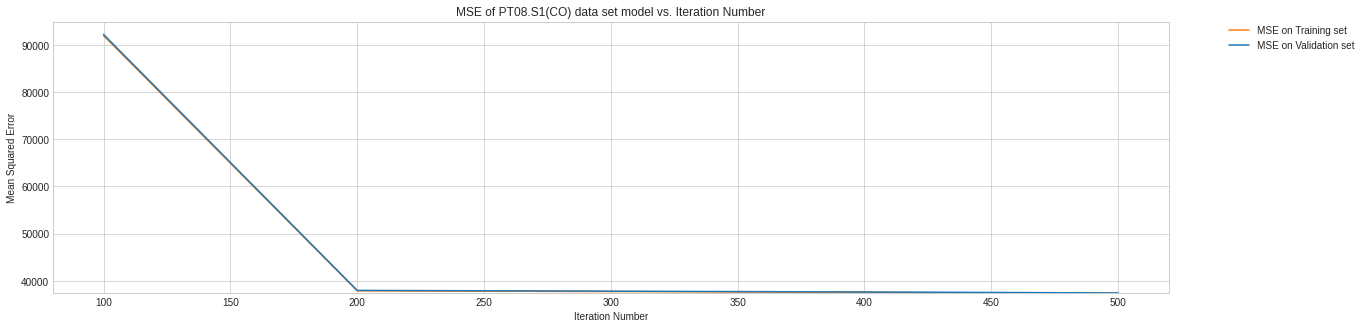

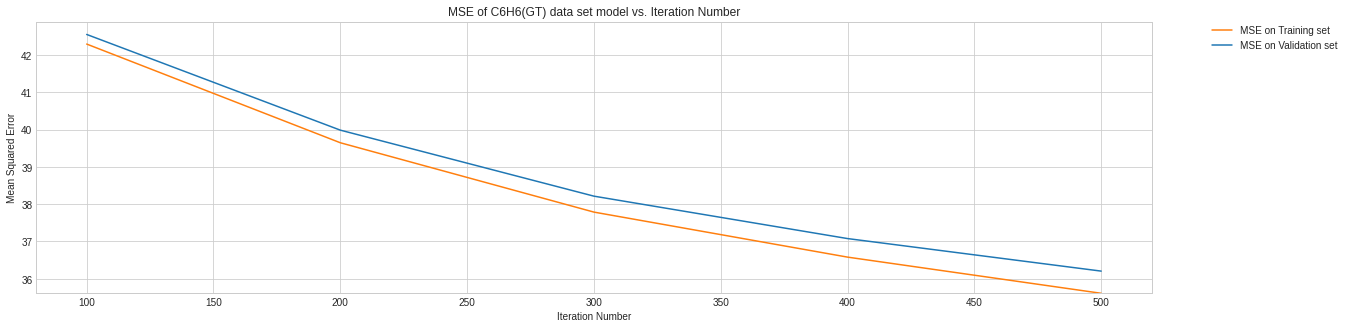

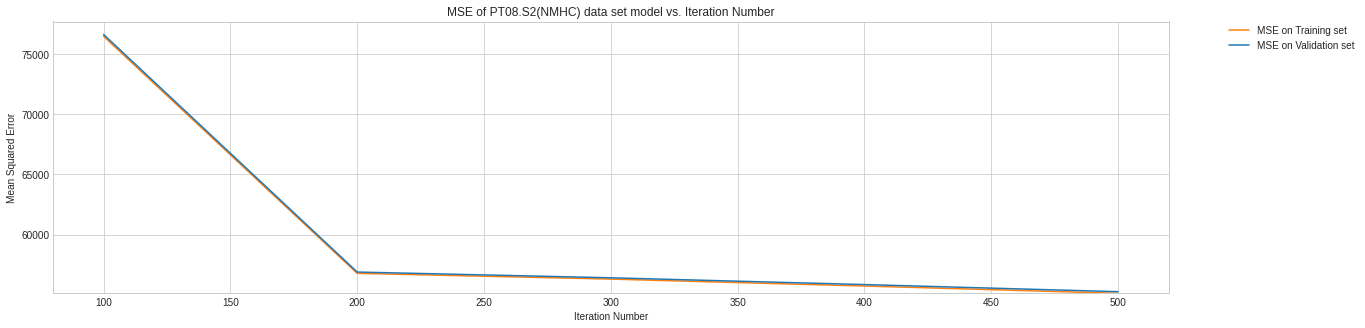

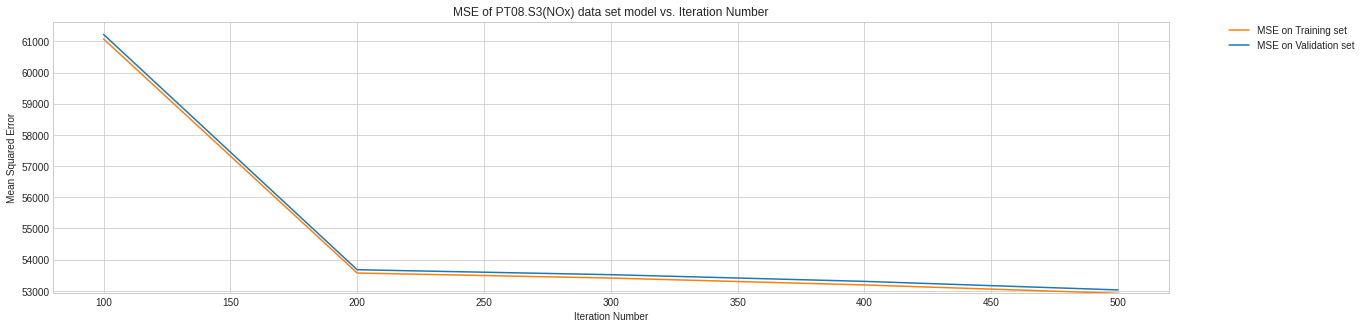

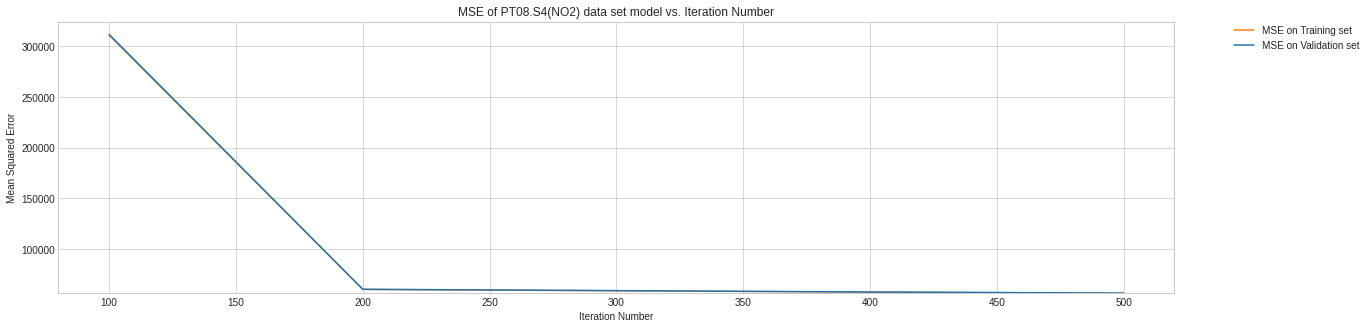

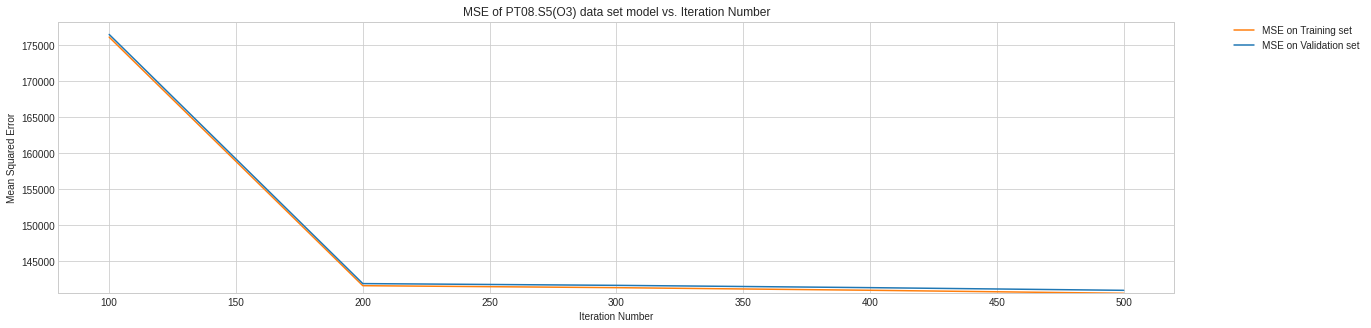

In [ ]:
from matplotlib.rcsetup import validate_dpi
import sklearn.model_selection as skms
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn import metrics

#Suppress the warnings
import warnings
warnings.filterwarnings('ignore')

for i in range(0, len(targets_list)):
  cur_targets = targets_list[i]
  cur_features = features_list[i]

  for k in range(len(cur_targets.columns)):
    single_target = cur_targets[cur_targets.columns[k]]

    features_train, features_test, targets_train, targets_test = skms.train_test_split(cur_features,single_target,random_state = TEST_SPLIT_STATE, test_size=TEST_SIZE)

    train_error = np.zeros(len(iteration_num))
    validation_error = np.zeros(len(iteration_num))
    
    for m,iterations in enumerate(iteration_num):
      kf = KFold(n_splits=SPLIT_NUMBER, shuffle=True, random_state=K_FOLD_STATE).split(X=features_train)

      mse_train = np.zeros(SPLIT_NUMBER)
      mse_validation = np.zeros(SPLIT_NUMBER)
      for j, indexes in enumerate(kf, start=0):
        train_index = indexes[0]
        validation_index = indexes[1]
        X_train, X_validation = features_train.iloc[train_index], features_train.iloc[validation_index]
        y_train, y_validation = targets_train.iloc[train_index], targets_train.iloc[validation_index]

        # Neural net regression
        NN_model = MLPRegressor(random_state=0, max_iter=iterations).fit(X_train, y_train)

        mse_validation[j] = metrics.mean_squared_error(y_validation, NN_model.predict(X_validation))
        mse_train[j] = metrics.mean_squared_error(y_train, NN_model.predict(X_train))

      train_error[m] = mse_train.mean()
      validation_error[m] = mse_validation.mean()

    fig, ax1 = plt.subplots(figsize = (20,5))

    ax1.plot(iteration_num, train_error, color='tab:orange', label='MSE on Training set')
    ax1.plot(iteration_num, validation_error, color = 'tab:blue', label='MSE on Validation set')
    plt.title('MSE of ' + cur_targets.columns[k] + ' data set model vs. Iteration Number')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('Iteration Number')
    plt.ylabel('Mean Squared Error')
    ax1.set_ylim(train_error.min())
    plt.show()
    print()

In [ ]:
BEST_ITERATIONS = 500
BEST_ITERATIONS = 200

### Optimize Neuron Number per Hidden Layer (uniform)

In [ ]:
hiddenLayers = [(10, 10, 10, 10), (20,20,20,20),(30,30,30,30),(40,40,40,40),(50,50,50,50),(60,60,60,60),(70,70,70,70),(80,80,80,80), (90, 90, 90, 90),(100,100,100,100),(110,110,110,110),(120,120,120,120)]
BEST_ITERATIONS = 100
BEST_HIDDEN_LAYERS = np.zeros(0)

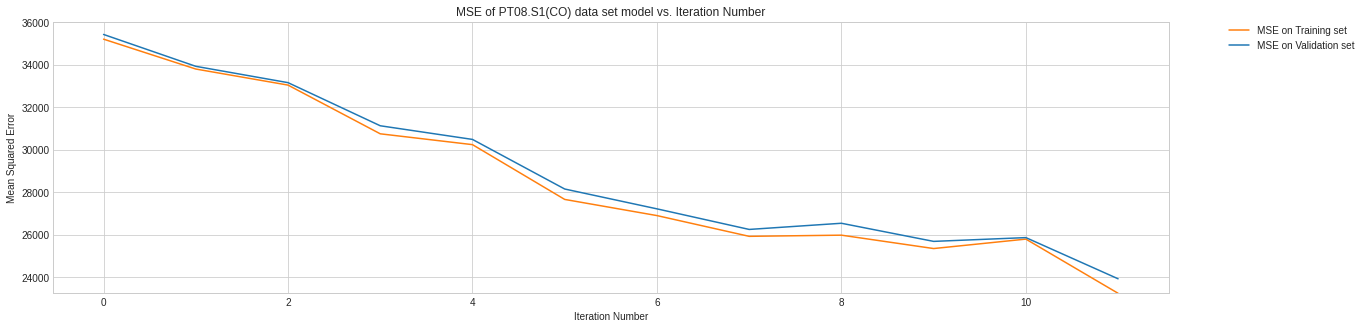

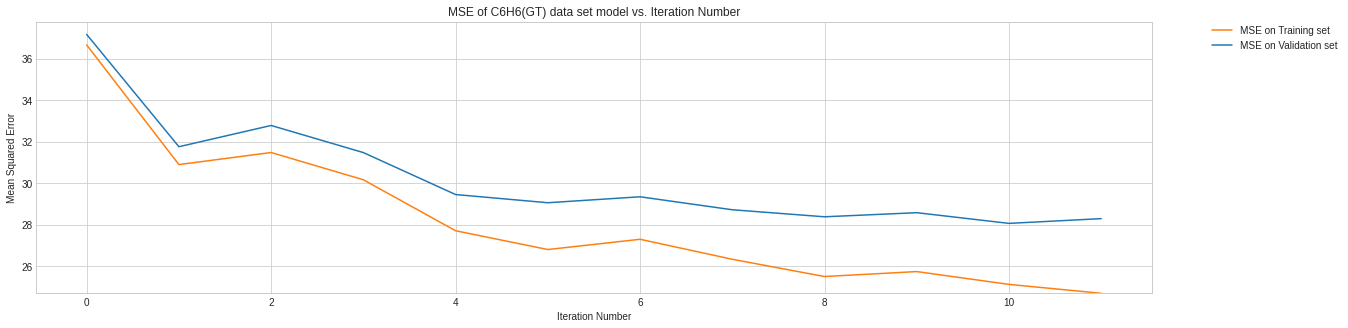

In [ ]:
from matplotlib.rcsetup import validate_dpi
import sklearn.model_selection as skms
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn import metrics

#Suppress the warnings
import warnings
warnings.filterwarnings('ignore')

for i in range(0, len(targets_list)):
  cur_targets = targets_list[i]
  cur_features = features_list[i]

  for k in range(len(cur_targets.columns)):
    single_target = cur_targets[cur_targets.columns[k]]

    features_train, features_test, targets_train, targets_test = skms.train_test_split(cur_features,single_target,random_state = TEST_SPLIT_STATE, test_size=TEST_SIZE)

    train_error = np.zeros(len(hiddenLayers))
    validation_error = np.zeros(len(hiddenLayers))
    
    for m,hiddenLayer in enumerate(hiddenLayers):
      kf = KFold(n_splits=SPLIT_NUMBER, shuffle=True, random_state=K_FOLD_STATE).split(X=features_train)

      mse_train = np.zeros(SPLIT_NUMBER)
      mse_validation = np.zeros(SPLIT_NUMBER)
      for j, indexes in enumerate(kf, start=0):
        train_index = indexes[0]
        validation_index = indexes[1]
        X_train, X_validation = features_train.iloc[train_index], features_train.iloc[validation_index]
        y_train, y_validation = targets_train.iloc[train_index], targets_train.iloc[validation_index]

        # Neural net regression
        NN_model = MLPRegressor(random_state=0, max_iter=BEST_ITERATIONS, hidden_layer_sizes=hiddenLayer).fit(X_train, y_train)

        mse_validation[j] = metrics.mean_squared_error(y_validation, NN_model.predict(X_validation))
        mse_train[j] = metrics.mean_squared_error(y_train, NN_model.predict(X_train))

      train_error[m] = mse_train.mean()
      validation_error[m] = mse_validation.mean()

    fig, ax1 = plt.subplots(figsize = (20,5))

    ax1.plot(np.arange(len(hiddenLayers)), train_error, color='tab:orange', label='MSE on Training set')
    ax1.plot(np.arange(len(hiddenLayers)), validation_error, color = 'tab:blue', label='MSE on Validation set')
    plt.title('MSE of ' + cur_targets.columns[k] + ' data set model vs. Iteration Number')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('Iteration Number')
    plt.ylabel('Mean Squared Error')
    ax1.set_ylim(train_error.min())
    plt.show()
    print()

In [ ]:
bestNeuronNum = 20

### Optimize Hidden Layer Number

In [ ]:
hiddenLayers = [(100), (100,100), (100,100,100), (100,100,100,100), (100,100,100,100,100),(100,100,100,100,100,100),(100,100,100,100,100,100,100),(100,100,100,100,100,100,100,100)]
BEST_ITERATIONS = 200
BEST_HIDDEN_LAYERS = np.zeros(0)

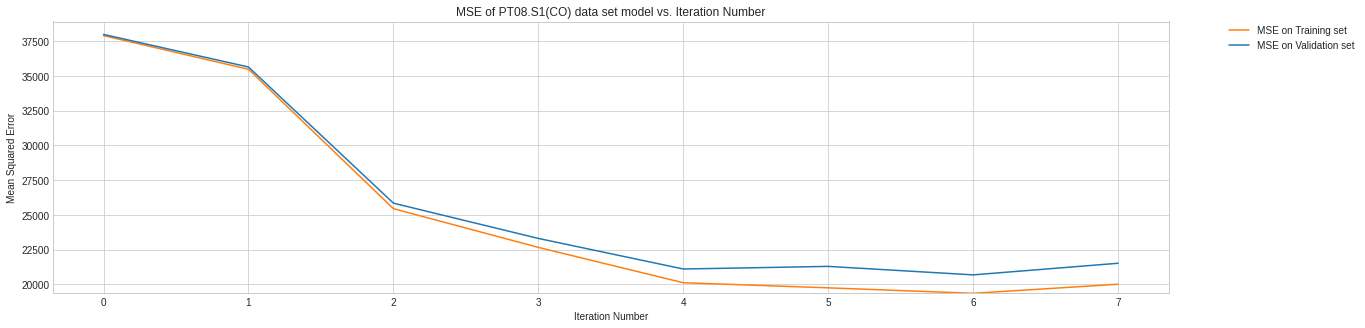

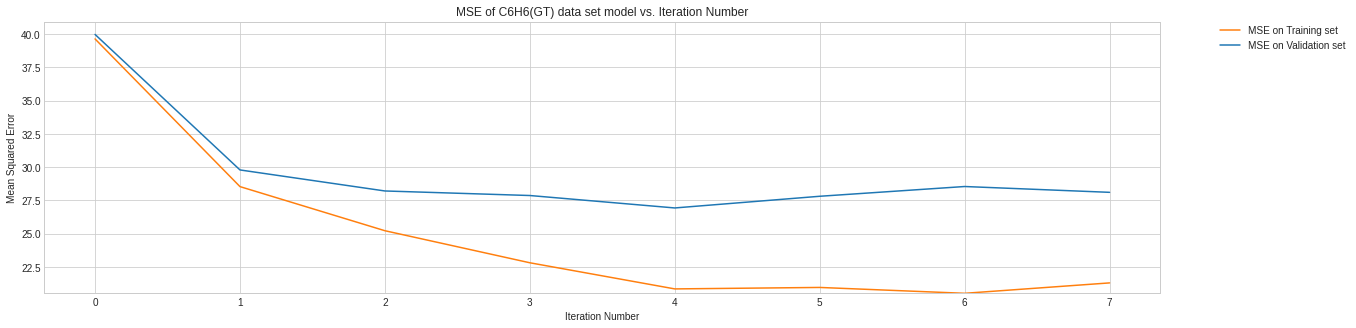

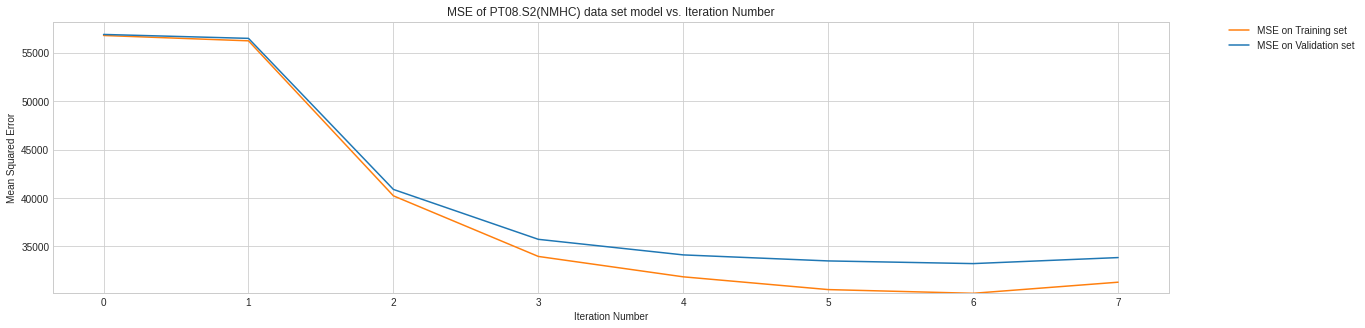

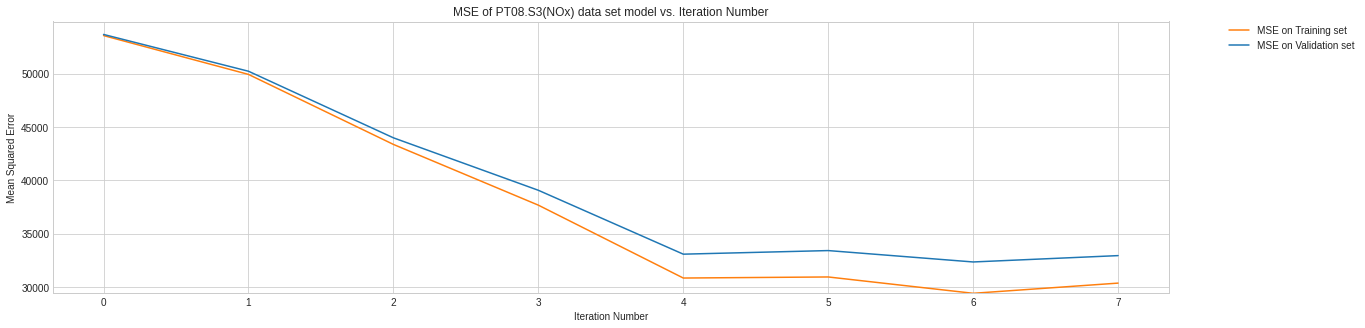

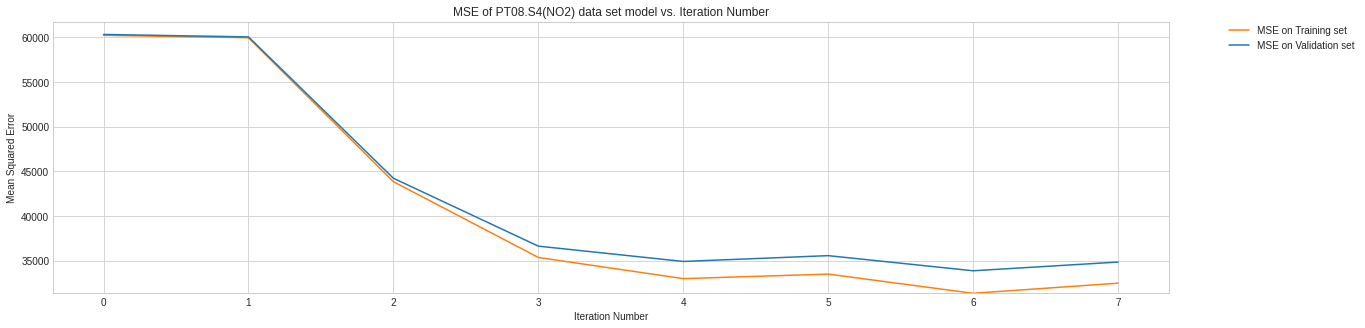

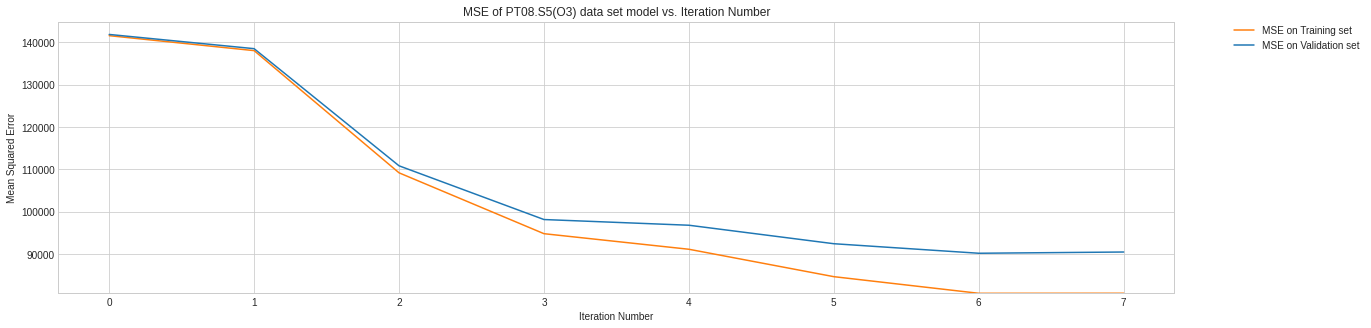

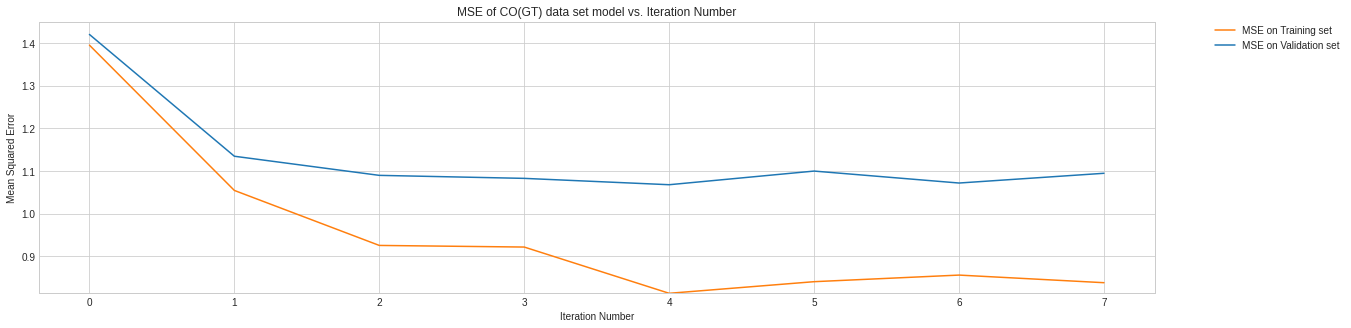

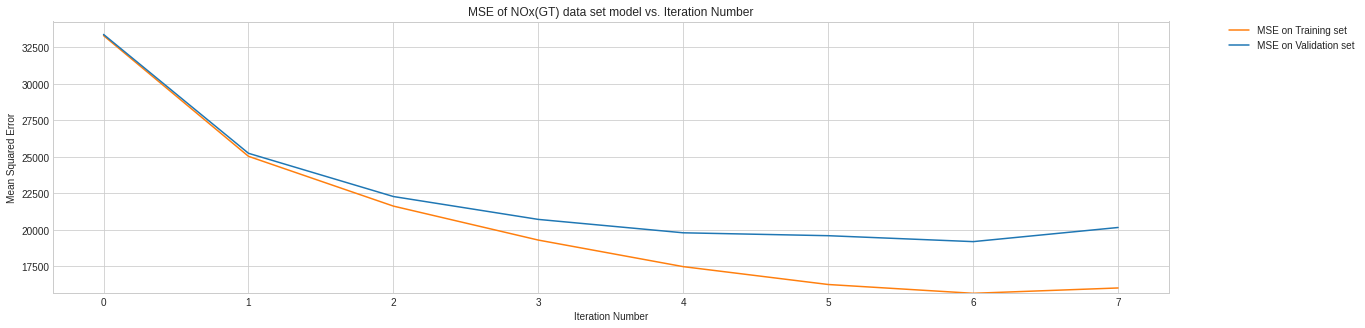

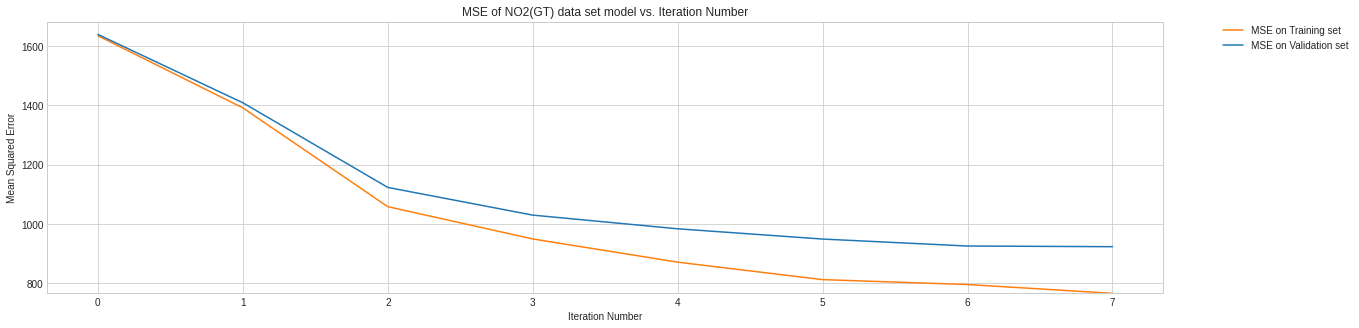

In [ ]:
from matplotlib.rcsetup import validate_dpi
import sklearn.model_selection as skms
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn import metrics

#Suppress the warnings
import warnings
warnings.filterwarnings('ignore')

for i in range(0, len(targets_list)):
  cur_targets = targets_list[i]
  cur_features = features_list[i]

  for k in range(len(cur_targets.columns)):
    single_target = cur_targets[cur_targets.columns[k]]

    features_train, features_test, targets_train, targets_test = skms.train_test_split(cur_features,single_target,random_state = TEST_SPLIT_STATE, test_size=TEST_SIZE)

    train_error = np.zeros(len(hiddenLayers))
    validation_error = np.zeros(len(hiddenLayers))
    
    for m,hiddenLayer in enumerate(hiddenLayers):
      kf = KFold(n_splits=SPLIT_NUMBER, shuffle=True, random_state=K_FOLD_STATE).split(X=features_train)

      mse_train = np.zeros(SPLIT_NUMBER)
      mse_validation = np.zeros(SPLIT_NUMBER)
      for j, indexes in enumerate(kf, start=0):
        train_index = indexes[0]
        validation_index = indexes[1]
        X_train, X_validation = features_train.iloc[train_index], features_train.iloc[validation_index]
        y_train, y_validation = targets_train.iloc[train_index], targets_train.iloc[validation_index]

        # Neural net regression
        NN_model = MLPRegressor(random_state=0, max_iter=BEST_ITERATIONS, hidden_layer_sizes=hiddenLayer).fit(X_train, y_train)

        mse_validation[j] = metrics.mean_squared_error(y_validation, NN_model.predict(X_validation))
        mse_train[j] = metrics.mean_squared_error(y_train, NN_model.predict(X_train))

      train_error[m] = mse_train.mean()
      validation_error[m] = mse_validation.mean()

    fig, ax1 = plt.subplots(figsize = (20,5))

    ax1.plot(np.arange(len(hiddenLayers)), train_error, color='tab:orange', label='MSE on Training set')
    ax1.plot(np.arange(len(hiddenLayers)), validation_error, color = 'tab:blue', label='MSE on Validation set')
    plt.title('MSE of ' + cur_targets.columns[k] + ' data set model vs. Iteration Number')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('Iteration Number')
    plt.ylabel('Mean Squared Error')
    ax1.set_ylim(train_error.min())
    plt.show()
    print()

    bestChoiceIndex = 0
    for n in range(len(hiddenLayers)):
      if (validation_error[n] < validation_error[bestChoiceIndex]):
        bestChoiceIndex = n

    BEST_HIDDEN_LAYERS = np.append(BEST_HIDDEN_LAYERS, hiddenLayers[bestChoiceIndex])

### Results

In [ ]:
print(BEST_HIDDEN_LAYERS)

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100.]


In [ ]:
BEST_ITERATIONS = 500
from sklearn.neural_network import MLPRegressor


Model test results for concentration of: PT08.S1(CO)
Mean squared error of model:  21001.727870839175
R2 value for model fit for the test data:  0.5697528807766057



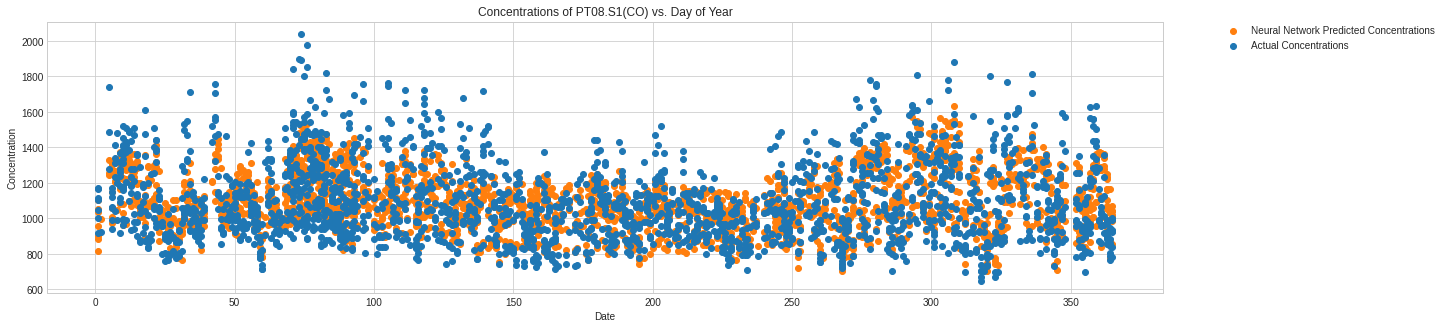

Model test results for concentration of: C6H6(GT)
Mean squared error of model:  25.071275596190763
R2 value for model fit for the test data:  0.5441521525772387



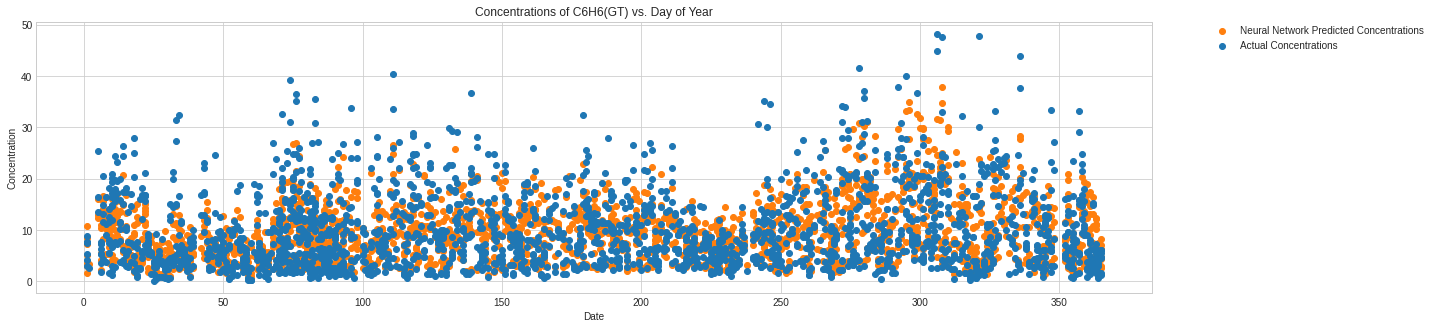

Model test results for concentration of: PT08.S2(NMHC)
Mean squared error of model:  33763.63775486207
R2 value for model fit for the test data:  0.530523287918892



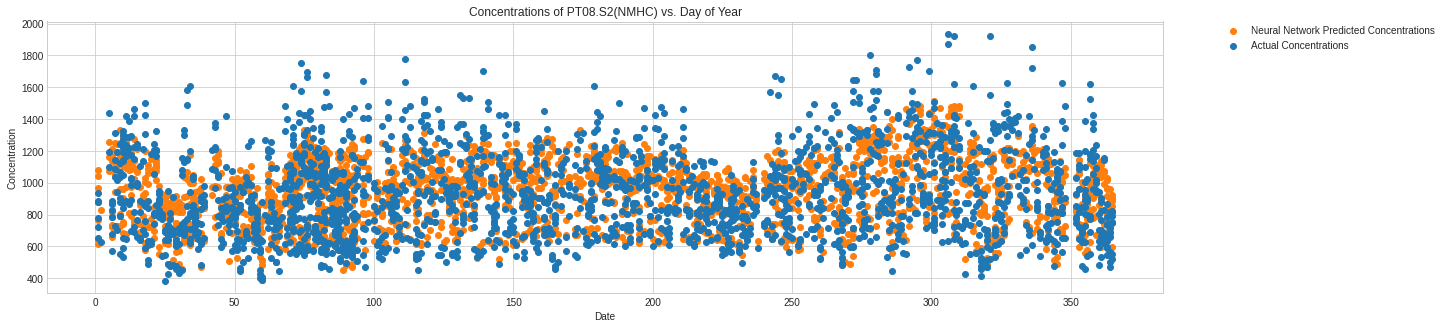

Model test results for concentration of: PT08.S3(NOx)
Mean squared error of model:  33870.77019446987
R2 value for model fit for the test data:  0.5107057235532004



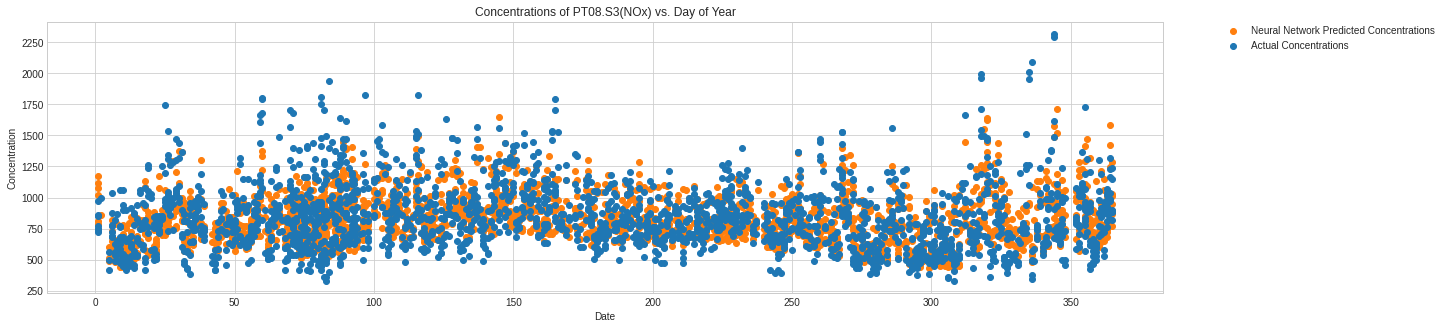

Model test results for concentration of: PT08.S4(NO2)
Mean squared error of model:  32619.29719224702
R2 value for model fit for the test data:  0.7294096621430467



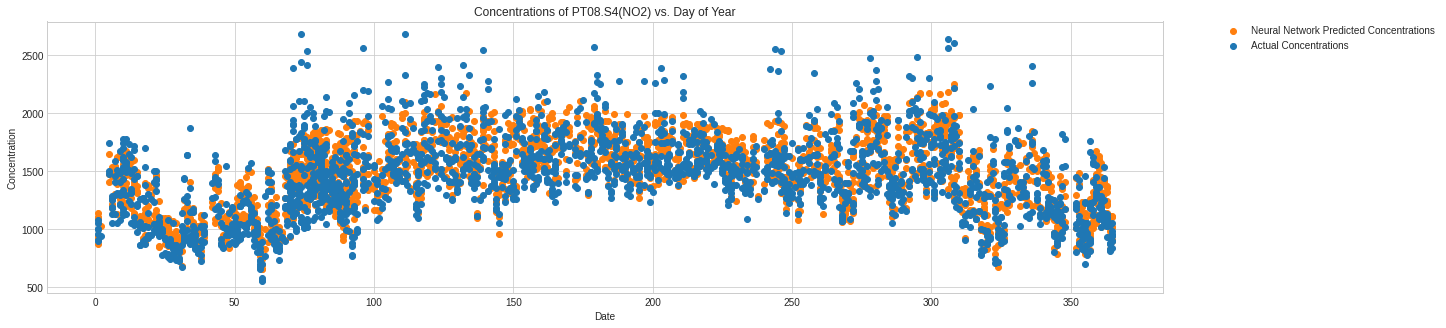

Model test results for concentration of: PT08.S5(O3)
Mean squared error of model:  89255.66590962202
R2 value for model fit for the test data:  0.44062286201876344



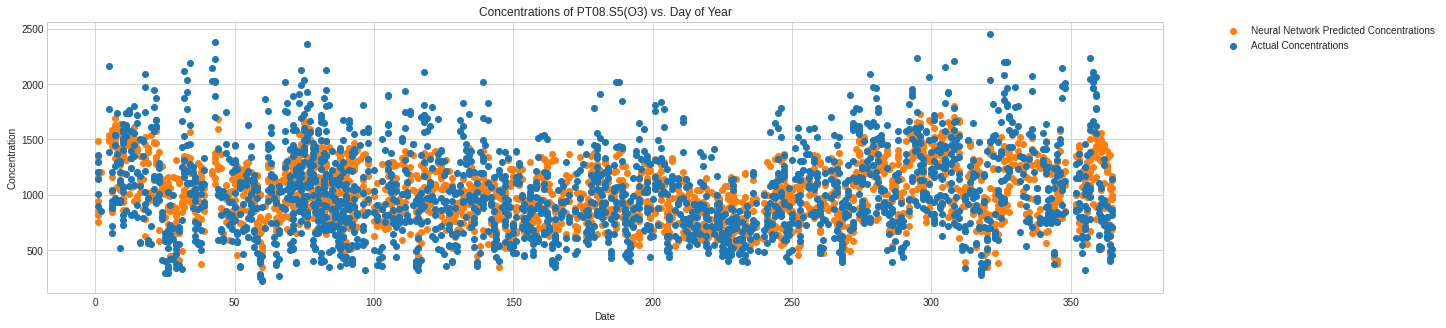

Model test results for concentration of: CO(GT)
Mean squared error of model:  1.0317345958240938
R2 value for model fit for the test data:  0.5072439605975174



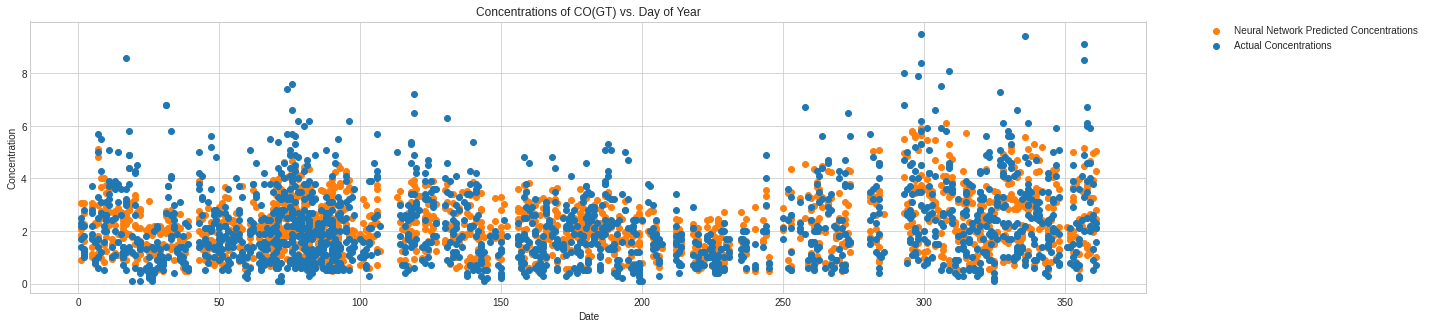

Model test results for concentration of: NOx(GT)
Mean squared error of model:  20958.587246030424
R2 value for model fit for the test data:  0.5201537135018952



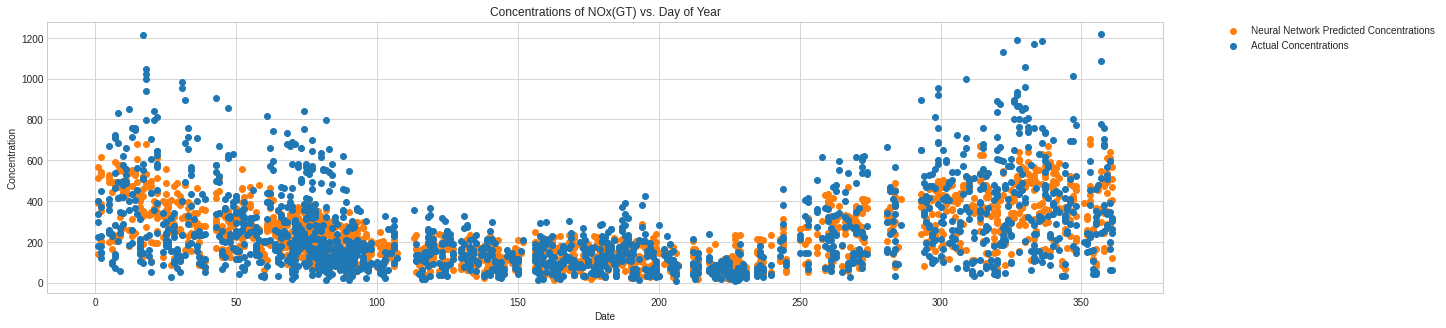

Model test results for concentration of: NO2(GT)
Mean squared error of model:  1074.68795920793
R2 value for model fit for the test data:  0.5318010667078119



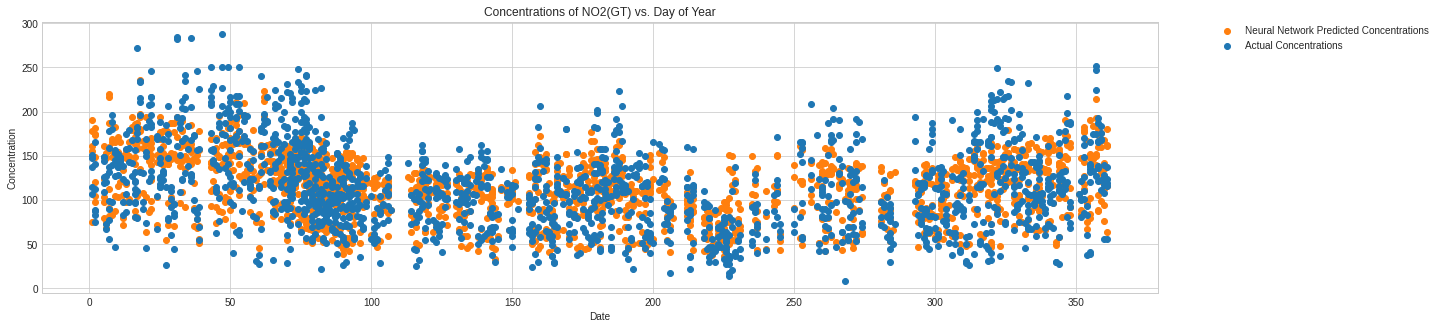

Average R2 value:  0.5427072566438856


In [ ]:
hiddenLayerIndex = -1
sumOfR2 = 0
for i in range(0, len(targets_list)):
  cur_targets = targets_list[i]
  cur_features = features_list[i]

  for k in range(len(cur_targets.columns)):
    single_target = cur_targets[cur_targets.columns[k]]
    hiddenLayerIndex = hiddenLayerIndex + 1
    

    features_train, features_test, targets_train, targets_test = skms.train_test_split(cur_features,single_target,random_state = TEST_SPLIT_STATE, test_size=TEST_SIZE)

    #for train_index, test_index in kf:
    # NN model
    #NN_model = MLPRegressor(random_state=0, max_iter=BEST_ITERATIONS, hidden_layer_sizes=BEST_HIDDEN_LAYERS[hiddenLayersIndex]).fit(features_train, targets_train)
    NN_model = MLPRegressor(random_state=0, max_iter=BEST_ITERATIONS, hidden_layer_sizes=(100,100,100,100,100)).fit(features_train, targets_train)


    print("Model test results for concentration of: " + cur_targets.columns[k])
    print("Mean squared error of model: ", metrics.mean_squared_error(targets_test, NN_model.predict(features_test)))
    
    #Calculate the R2 value for the model with the data
    from sklearn.metrics import r2_score
    r2 = r2_score(targets_test, NN_model.predict(features_test))
    sumOfR2 = sumOfR2 + r2

    print("R2 value for model fit for the test data: ", r2)
    print()

    index_graphed_against = 0

    date_points = features_test[features_test.columns[index_graphed_against]] * (data[features.columns[index_graphed_against]].max() - 
                                                                                data[features.columns[index_graphed_against]].min()) + data[features.columns[index_graphed_against]].mean()

    fig, ax1 = plt.subplots(figsize = (20,5))

    plt.scatter(x=date_points, y=NN_model.predict(features_test), color='tab:orange', label='Neural Network Predicted Concentrations')
    plt.scatter(x=date_points, y=targets_test, color = 'tab:blue', label='Actual Concentrations')
    plt.title('Concentrations of ' + cur_targets.columns[k] + ' vs. Day of Year')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel(features_test.columns[index_graphed_against])
    plt.ylabel('Concentration')
    plt.show()

print("Average R2 value: ", sumOfR2/(hiddenLayerIndex+1))

# Classification

## Preparation

In [ ]:
#Constants for training and testing
# Used for consistency of validation part and testing (don't want to test on data that was trained/validated on)
MAX_DEGREE = 5
SPLIT_NUMBER = 10
TEST_SIZE = 0.25
TEST_SPLIT_STATE = 0
K_FOLD_STATE = 0

# Will not be using targets3 and features 3 for this analysis
# because of low sampling
targets_list = [targets1, targets2]
features_list = [features1, features2]

In [ ]:
# Copy targets for classifier to modify
classifierTargest1 = targets1.copy()
classifierTargets2 = targets2.copy()
classifierTargetsList = [classifierTargest1, classifierTargets2]

In [ ]:
# Drop the non-beneze columns of first set (all the metallic pollutants)
classifierTargetsList[0].drop([classifierTargetsList[0].columns[0]], axis=1, inplace=True)
for i in range(5):
  if i != 1:
    classifierTargetsList[0].drop([classifierTargetsList[0].columns[1]], axis=1, inplace=True)
# Drop NOx, don't know how average is / concentrations
classifierTargetsList[1].drop([classifierTargetsList[1].columns[1]], axis=1, inplace=True)

In [ ]:
classifierTargetsList

[      C6H6(GT)
 0         11.9
 1          9.4
 2          9.0
 3          9.2
 4          6.5
 ...        ...
 9352      13.5
 9353      11.4
 9354      12.4
 9355       9.5
 9356      11.9
 
 [8991 rows x 1 columns],       CO(GT)  NO2(GT)
 0        2.6    113.0
 1        2.0     92.0
 2        2.2    114.0
 3        2.2    122.0
 4        1.6    116.0
 ...      ...      ...
 9352     3.1    190.0
 9353     2.4    179.0
 9354     2.4    175.0
 9355     2.1    156.0
 9356     2.2    168.0
 
 [6941 rows x 2 columns]]

In [ ]:
# Classes go in order of increasing risk (higher classes for higher concentrations)
# WHO
# no2ClassBorder = [10, 25]
coClassBorder = 4

# epa (US) (more reasonable)
no2ClassBorder = [100, 188]
# coClassBorder = [10.310, 40.096]

# CDC
benzeneClassBorder = [10, 19, 29]

def benzeneClassConverter(x):
  if x < benzeneClassBorder[0]:
    return 0
  elif x < benzeneClassBorder[1]:
    return 1
  elif x < benzeneClassBorder[2]:
    return 2
  else:
    return 3

def coClassConverter0(x):
  if x < coClassBorder:
    return 0
  else:
    return 1
def coClassConverter1(x):
  if x < coClassBorder[0]:
    return 0
  elif x < coClassBorder[1]:
    return 1
  else:
    return 2
def no2ClassConverter(x):
  if x < no2ClassBorder[0]:
    return 0
  elif x < no2ClassBorder[1]:
    return 1
  else:
    return 2

classifierTargetsList[0][classifierTargetsList[0].columns[0]] = classifierTargetsList[0][classifierTargetsList[0].columns[0]].apply(benzeneClassConverter)
if(type(coClassBorder) == int):
  classifierTargetsList[1][classifierTargetsList[1].columns[0]] = classifierTargetsList[1][classifierTargetsList[1].columns[0]].apply(coClassConverter0)
else:
  classifierTargetsList[1][classifierTargetsList[1].columns[0]] = classifierTargetsList[1][classifierTargetsList[1].columns[0]].apply(coClassConverter1)

classifierTargetsList[1][classifierTargetsList[1].columns[1]] = classifierTargetsList[1][classifierTargetsList[1].columns[1]].apply(no2ClassConverter)

## Some Statisitical Measures

In [ ]:
classifierTargetsList
columnNames = [classifierTargetsList[0].columns[0], classifierTargetsList[1].columns[0], classifierTargetsList[1].columns[1]]
print(classifierTargetsList[0].groupby(classifierTargetsList[0].columns[0]).size())
print(classifierTargetsList[1].groupby(classifierTargetsList[1].columns[0]).size())
print(classifierTargetsList[1].groupby(classifierTargetsList[1].columns[1]).size())

print("C6H6 Null error rate: ", classifierTargetsList[0].groupby(columnNames[0]).size().max() / classifierTargetsList[0][columnNames[0]].count())
print("CO Null error rate: ", classifierTargetsList[1].groupby(columnNames[1]).size().max() / classifierTargetsList[1][columnNames[1]].count())
print("N02 Null error rate: ", classifierTargetsList[1].groupby(columnNames[2]).size().max() / classifierTargetsList[1][columnNames[2]].count())

C6H6(GT)
0    5331
1    2544
2     903
3     213
dtype: int64
CO(GT)
0    6127
1     814
dtype: int64
NO2(GT)
0    2860
1    3551
2     530
dtype: int64
C6H6 Null error rate:  0.5929262595929262
CO Null error rate:  0.8827258320126783
N02 Null error rate:  0.5115977524852326


## KNN Classifier

### Validation

In [ ]:
#Constants for training and testing
# Used for consistency of validation part and testing (don't want to test on data that was trained/validated on)
SPLIT_NUMBER = 10
TEST_SIZE = 0.25
TEST_SPLIT_STATE = 0
K_FOLD_STATE = 0

MAX_K = 15

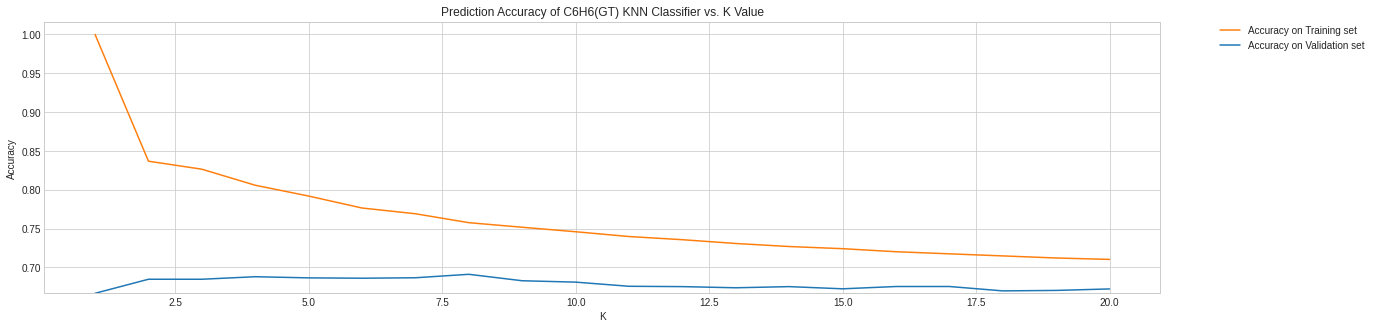


7 : Validation Accuracy for optimal k:  0.6910825365424771
[0.66661523 0.68470887 0.68471041 0.68797077 0.6864906  0.68603978
 0.68663282 0.69108254 0.68277767 0.68099769 0.67565886 0.67521552
 0.67373162 0.67521354 0.67239587 0.67535993 0.67536103 0.6697248
 0.67032069 0.67224618]


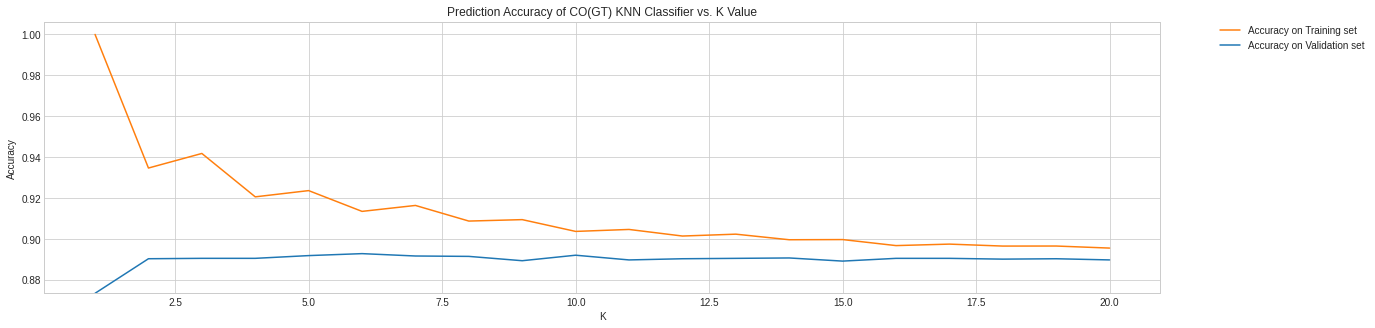


5 : Validation Accuracy for optimal k:  0.8927915989960133
[0.87339067 0.89029714 0.89048944 0.89049055 0.89182932 0.8927916
 0.89163517 0.89144508 0.88932748 0.89201905 0.88971172 0.89029123
 0.89048095 0.89067511 0.88913849 0.89048428 0.89048354 0.89010077
 0.89029197 0.88971726]


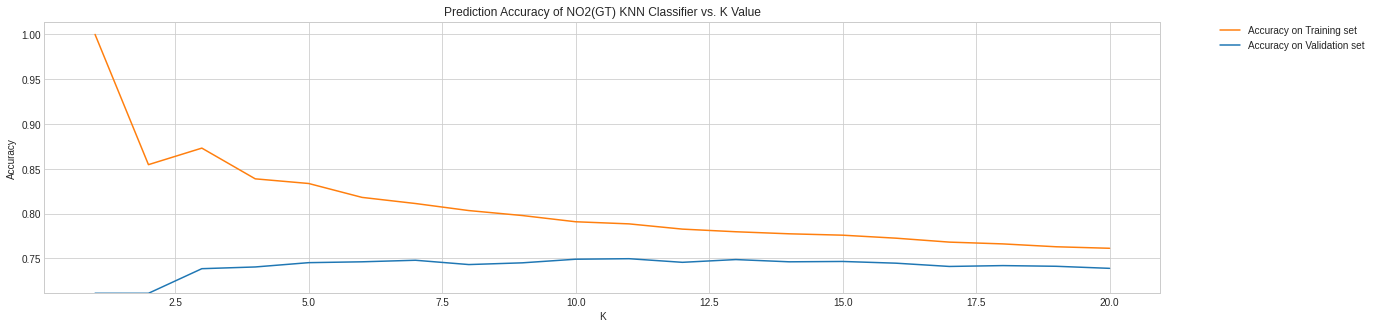


10 : Validation Accuracy for optimal k:  0.7496641074856045
[0.71104976 0.71104127 0.73851875 0.74043924 0.74524325 0.74619962
 0.74792965 0.74312159 0.74504688 0.74908165 0.74966411 0.74562159
 0.74869888 0.74619556 0.74658276 0.74465968 0.74101026 0.74196995
 0.74120331 0.7388934 ]


In [ ]:
from matplotlib.rcsetup import validate_dpi
import sklearn.model_selection as skms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import metrics

BEST_Ks = np.zeros(0)

for i in range(0, len(classifierTargetsList)):
  cur_targets = classifierTargetsList[i]
  cur_features = features_list[i]

  for k in range(len(cur_targets.columns)):
    single_target = cur_targets[cur_targets.columns[k]]

    features_train, features_test, targets_train, targets_test = skms.train_test_split(cur_features,single_target,random_state = TEST_SPLIT_STATE, test_size=TEST_SIZE)

    train_accuracy = np.zeros(MAX_K)
    validation_accuracy = np.zeros(MAX_K)
    
    for m,clusterNum in enumerate(range(1, MAX_K+1)):
      kf = KFold(n_splits=SPLIT_NUMBER, shuffle=True, random_state=K_FOLD_STATE).split(X=features_train)

      train_split_accuracy = np.zeros(SPLIT_NUMBER)
      validation_split_accuracy = np.zeros(SPLIT_NUMBER)
      for j, indexes in enumerate(kf, start=0):
        train_index = indexes[0]
        validation_index = indexes[1]
        X_train, X_validation = features_train.iloc[train_index], features_train.iloc[validation_index]
        y_train, y_validation = targets_train.iloc[train_index], targets_train.iloc[validation_index]

        # KNN Classifier
        KNNClassifier = KNeighborsClassifier(n_neighbors=clusterNum, p=1).fit(X_train, y_train)

        validation_split_accuracy[j] = metrics.accuracy_score(y_validation, KNNClassifier.predict(X_validation))
        train_split_accuracy[j] = metrics.accuracy_score(y_train, KNNClassifier.predict(X_train))

      train_accuracy[m] = train_split_accuracy.mean()
      validation_accuracy[m] = validation_split_accuracy.mean()

    fig, ax1 = plt.subplots(figsize = (20,5))


    k_range = list(range(1, MAX_K+1))
    ax1.plot(k_range, train_accuracy, color='tab:orange', label='Accuracy on Training set')
    ax1.plot(k_range, validation_accuracy, color = 'tab:blue', label='Accuracy on Validation set')
    plt.title('Prediction Accuracy of ' + cur_targets.columns[k] + ' KNN Classifier vs. K Value')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    ax1.set_ylim(validation_accuracy.min())
    plt.show()
    print()


    bestChoiceIndex = 0
    for n in range(MAX_K):
      if (validation_accuracy[n] > validation_accuracy[bestChoiceIndex]):
        bestChoiceIndex = n

    BEST_Ks = np.append(BEST_Ks, bestChoiceIndex+1)
    print(bestChoiceIndex, ": Validation Accuracy for optimal k: ", validation_accuracy[bestChoiceIndex])
    print(validation_accuracy)

In [ ]:
BEST_Ks

array([ 8.,  6., 11.])

### Testing

Model test results for concentration of: C6H6(GT)
Predication Accuracy of model:  0.6912811387900356
K:  8



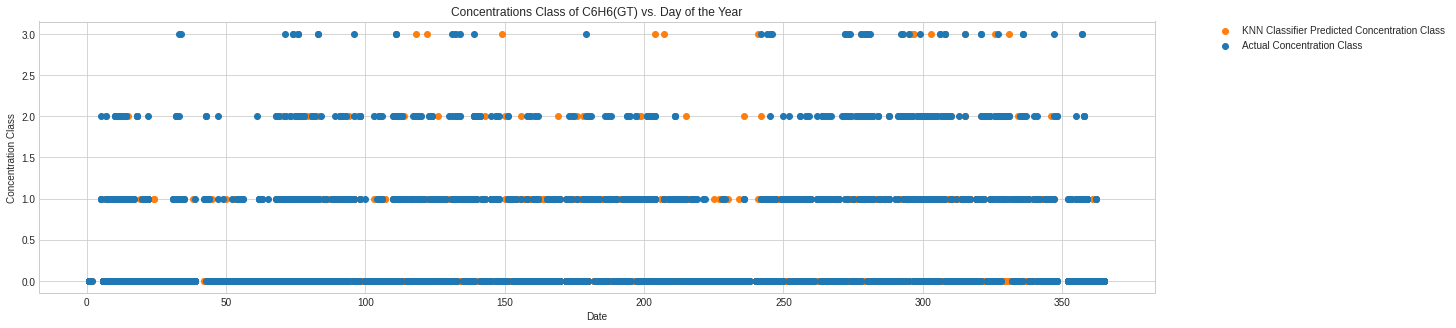

Model test results for concentration of: CO(GT)
Predication Accuracy of model:  0.8917050691244239
K:  6



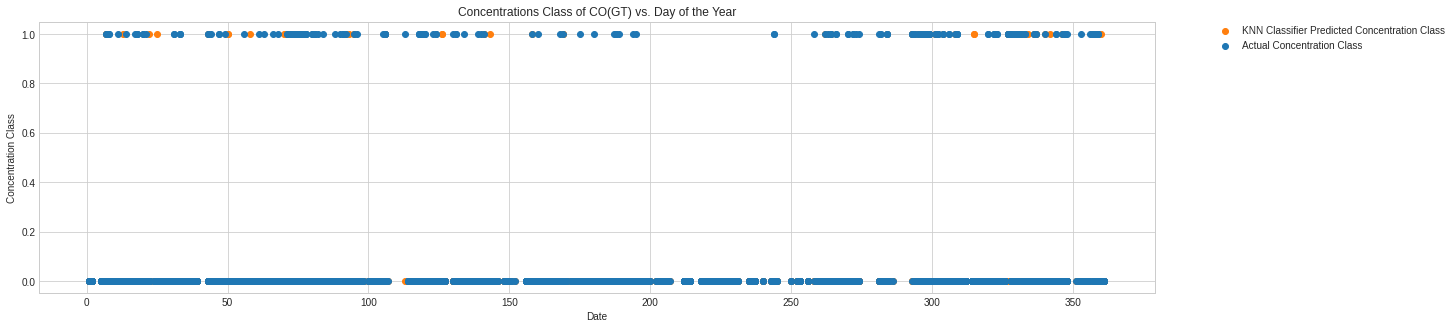

Model test results for concentration of: NO2(GT)
Predication Accuracy of model:  0.7275345622119815
K:  11



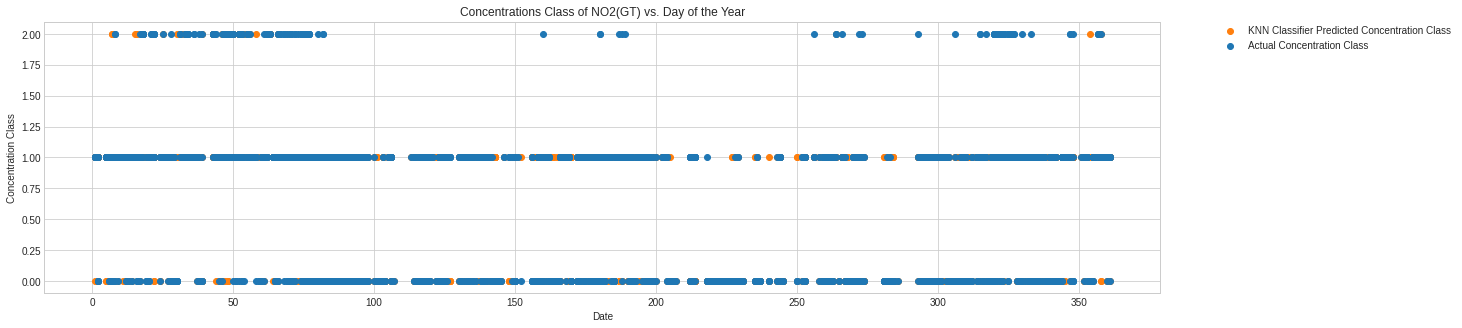

Average Prediction Accuracy:  0.770173590042147


In [ ]:
maxKIndex = -1
sumOfAccuracy = 0

for i in range(0, len(classifierTargetsList)):
  cur_targets = classifierTargetsList[i]
  cur_features = features_list[i]

  for k in range(len(cur_targets.columns)):
    maxKIndex = maxKIndex + 1
    
    single_target = cur_targets[cur_targets.columns[k]]
    

    features_train, features_test, targets_train, targets_test = skms.train_test_split(cur_features,single_target,random_state = TEST_SPLIT_STATE, test_size=TEST_SIZE)

    KNNClassifier = KNeighborsClassifier(n_neighbors=(int)(BEST_Ks[maxKIndex]), p = 1).fit(features_train, targets_train)


    print("Model test results for concentration of: " + cur_targets.columns[k])
    print("Predication Accuracy of model: ", metrics.accuracy_score(targets_test, KNNClassifier.predict(features_test)))
    
    sumOfAccuracy = sumOfAccuracy + metrics.accuracy_score(targets_test, KNNClassifier.predict(features_test))

    print("K: ", (int)(BEST_Ks[maxKIndex]))
    print()

    index_graphed_against = 0

    date_points = features_test[features_test.columns[index_graphed_against]] * (data[features.columns[index_graphed_against]].max() - 
                                                                                data[features.columns[index_graphed_against]].min()) + data[features.columns[index_graphed_against]].mean()

    fig, ax1 = plt.subplots(figsize = (20,5))

    plt.scatter(x=date_points, y=KNNClassifier.predict(features_test), color='tab:orange', label='KNN Classifier Predicted Concentration Class')
    plt.scatter(x=date_points, y=targets_test, color = 'tab:blue', label='Actual Concentration Class')
    plt.title('Concentrations Class of ' + cur_targets.columns[k] + ' vs. Day of the Year')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel(features_test.columns[index_graphed_against])
    plt.ylabel('Concentration Class')
    plt.show()

print("Average Prediction Accuracy: ", sumOfAccuracy/(maxKIndex+1))

## Random Forest Classifier

### Validation

In [ ]:
#Constants for training and testing
# Used for consistency of validation part and testing (don't want to test on data that was trained/validated on)
SPLIT_NUMBER = 10
TEST_SIZE = 0.25
TEST_SPLIT_STATE = 0
K_FOLD_STATE = 0

MAX_DEPTH = [2, 4, 8, 16, 32, 64]


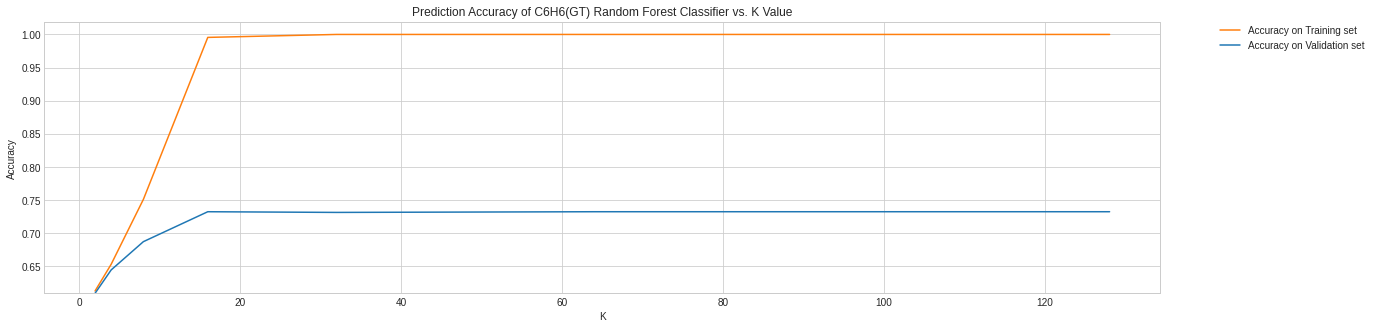


[16.] : Validation Accuracy for optimal k:  0.7321622156280909
[0.60891922 0.64421783 0.68693021 0.73216222 0.73112364 0.73216156
 0.73216156]


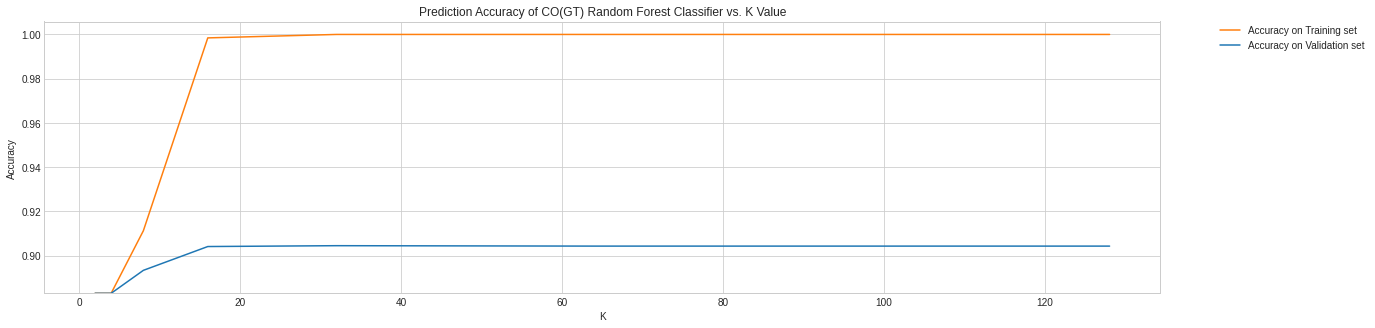


[16. 32.] : Validation Accuracy for optimal k:  0.9045124021851467
[0.88299387 0.88299387 0.89336926 0.90412816 0.9045124  0.90432009
 0.90432009]


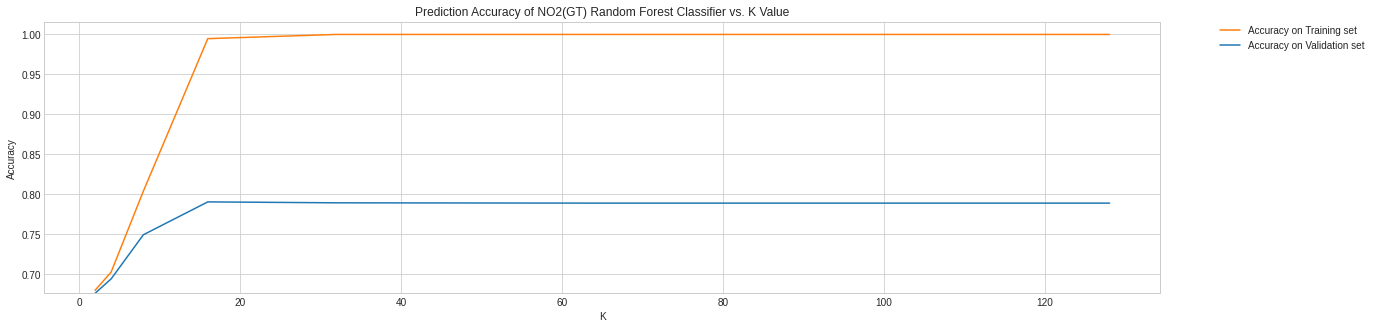


[16. 32. 16.] : Validation Accuracy for optimal k:  0.7905824597667208
[0.6762679  0.69432637 0.74946774 0.79058246 0.78943046 0.78904621
 0.78904621]


In [ ]:
from matplotlib.rcsetup import validate_dpi
import sklearn.model_selection as skms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

BEST_DEPTH_NUM = np.zeros(0)

for i in range(0, len(classifierTargetsList)):
  cur_targets = classifierTargetsList[i]
  cur_features = features_list[i]

  for k in range(len(cur_targets.columns)):
    single_target = cur_targets[cur_targets.columns[k]]

    features_train, features_test, targets_train, targets_test = skms.train_test_split(cur_features,single_target,random_state = TEST_SPLIT_STATE, test_size=TEST_SIZE)

    train_accuracy = np.zeros(len(MAX_DEPTH))
    validation_accuracy = np.zeros(len(MAX_DEPTH))
    
    for m,treeNum in enumerate(MAX_DEPTH):
      kf = KFold(n_splits=SPLIT_NUMBER, shuffle=True, random_state=K_FOLD_STATE).split(X=features_train)

      train_split_accuracy = np.zeros(SPLIT_NUMBER)
      validation_split_accuracy = np.zeros(SPLIT_NUMBER)
      for j, indexes in enumerate(kf, start=0):
        train_index = indexes[0]
        validation_index = indexes[1]
        X_train, X_validation = features_train.iloc[train_index], features_train.iloc[validation_index]
        y_train, y_validation = targets_train.iloc[train_index], targets_train.iloc[validation_index]

        # Random Forest
        clf = RandomForestClassifier(max_depth=treeNum, random_state=0).fit(X_train, y_train)

        validation_split_accuracy[j] = metrics.accuracy_score(y_validation, clf.predict(X_validation))
        train_split_accuracy[j] = metrics.accuracy_score(y_train, clf.predict(X_train))

      train_accuracy[m] = train_split_accuracy.mean()
      validation_accuracy[m] = validation_split_accuracy.mean()

    fig, ax1 = plt.subplots(figsize = (20,5))


    ax1.plot(TREE_NUM, train_accuracy, color='tab:orange', label='Accuracy on Training set')
    ax1.plot(TREE_NUM, validation_accuracy, color = 'tab:blue', label='Accuracy on Validation set')
    plt.title('Prediction Accuracy of ' + cur_targets.columns[k] + ' Random Forest Classifier vs. K Value')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    ax1.set_ylim(validation_accuracy.min())
    plt.show()
    print()


    bestChoiceIndex = 0
    for n, trees in enumerate(MAX_DEPTH):
      if (validation_accuracy[n] > validation_accuracy[bestChoiceIndex]):
        bestChoiceIndex = n

    BEST_DEPTH_NUM = np.append(BEST_DEPTH_NUM, MAX_DEPTH[bestChoiceIndex])
    print(BEST_DEPTH_NUM, ": Validation Accuracy for optimal k: ", validation_accuracy[bestChoiceIndex])
    print(validation_accuracy)

### Testing

Model test results for concentration of: C6H6(GT)
Predication Accuracy of model:  0.7397686832740213
Max Depth of trees:  16



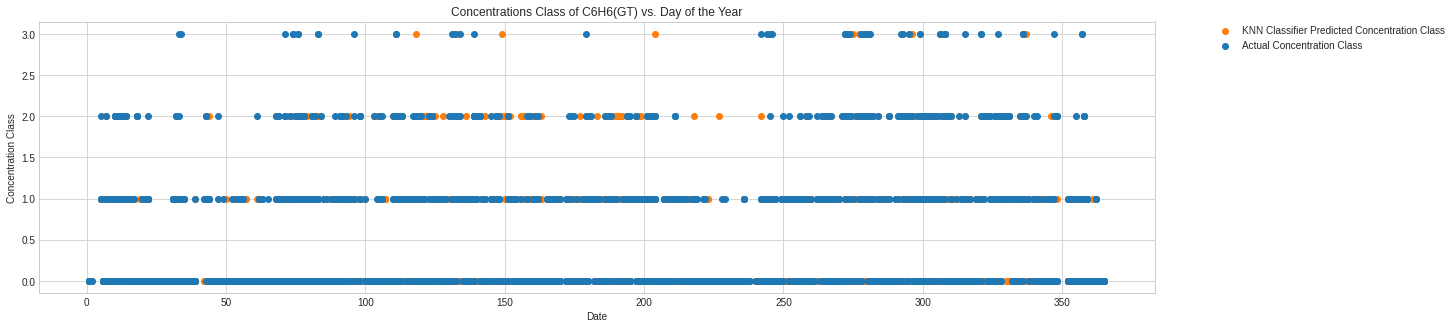

Model test results for concentration of: CO(GT)
Predication Accuracy of model:  0.9107142857142857
Max Depth of trees:  32



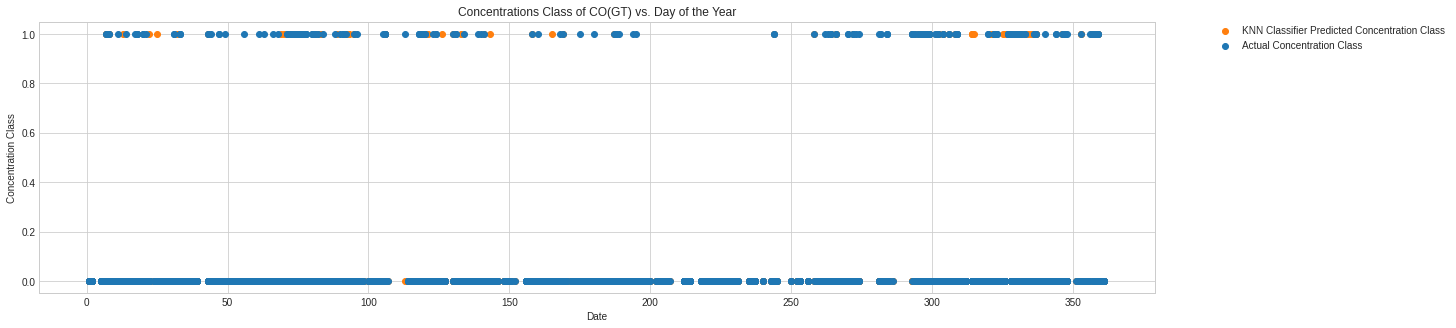

Model test results for concentration of: NO2(GT)
Predication Accuracy of model:  0.7903225806451613
Max Depth of trees:  16



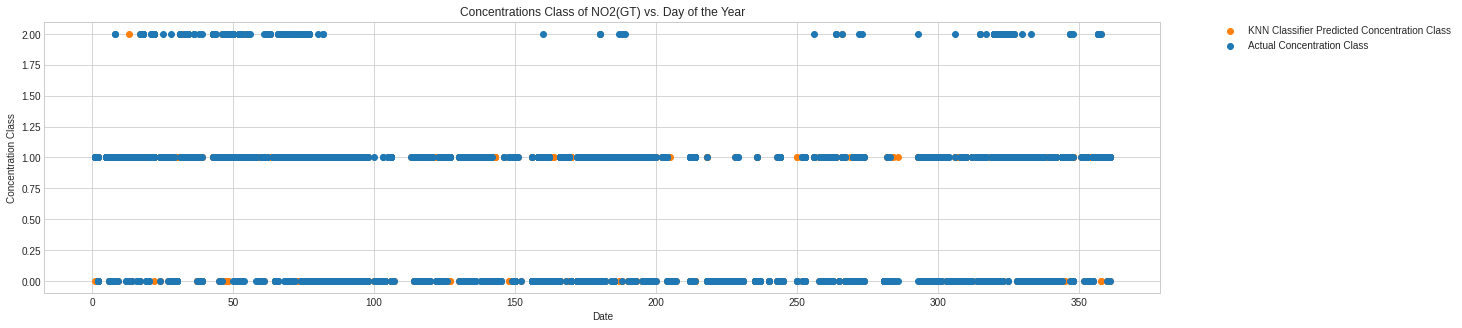

Average Prediction Accuracy:  0.8136018498778229


In [ ]:
maxDepthIndex = -1
sumOfAccuracy = 0

for i in range(0, len(classifierTargetsList)):
  cur_targets = classifierTargetsList[i]
  cur_features = features_list[i]

  for k in range(len(cur_targets.columns)):
    maxDepthIndex = maxDepthIndex + 1
    
    single_target = cur_targets[cur_targets.columns[k]]
    

    features_train, features_test, targets_train, targets_test = skms.train_test_split(cur_features,single_target,random_state = TEST_SPLIT_STATE, test_size=TEST_SIZE)

    clf = RandomForestClassifier(max_depth=(int)(BEST_DEPTH_NUM[maxDepthIndex]), random_state=0).fit(features_train, targets_train)


    print("Model test results for concentration of: " + cur_targets.columns[k])
    print("Predication Accuracy of model: ", metrics.accuracy_score(targets_test, clf.predict(features_test)))
    
    sumOfAccuracy = sumOfAccuracy + metrics.accuracy_score(targets_test, clf.predict(features_test))

    print("Max Depth of trees: ", (int)(BEST_DEPTH_NUM[maxDepthIndex]))
    print()

    index_graphed_against = 0

    date_points = features_test[features_test.columns[index_graphed_against]] * (data[features.columns[index_graphed_against]].max() - 
                                                                                data[features.columns[index_graphed_against]].min()) + data[features.columns[index_graphed_against]].mean()

    fig, ax1 = plt.subplots(figsize = (20,5))

    plt.scatter(x=date_points, y=clf.predict(features_test), color='tab:orange', label='KNN Classifier Predicted Concentration Class')
    plt.scatter(x=date_points, y=targets_test, color = 'tab:blue', label='Actual Concentration Class')
    plt.title('Concentrations Class of ' + cur_targets.columns[k] + ' vs. Day of the Year')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel(features_test.columns[index_graphed_against])
    plt.ylabel('Concentration Class')
    plt.show()

print("Average Prediction Accuracy: ", sumOfAccuracy/(maxDepthIndex+1))

# Prediction with CO

# Conclusion

By avoiding overfitting the models our end results seemed fairly effective at predicting the concentrations of the various pollutants given the date, time of day, temperature, relative humidity, and absolute humidity. There is obviously still room for improvement, which may be aided by more longitudinal data that might make the date feature more meaningful in the prediction models. Some of the models might also be improved by using a degree 7 polynomial regression for those models that specifically have their validation error decrease from degree 6 to degree 7, however, since the decrease in error was so small from this degree jump I doubt that it would provide significant benefits over simply fitting all models as degree 6 polynomial regressions. 

To expand upon this study, one could use other regression algorithms to see if they could create better regression models for the data, such as a decision tree regression, and to check if there are certain chemicals that are better predicted with different algorithms. If there was longer term data, one might also be able to determine better seasonal trends (if they are existent) in the data through averaging over multiple years. Lastly, another interesting extension could be done by determining the concentration at which each of the chemicals is considered dangerous/warrants mask wearing and limiting outdoor exposure, and then using this as a class to train a classification model on the features that might cause a dangerous concentration of the chemicals.